In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. GRADIENT DESCENT  

### without saddle point

In [2]:
def gradient_fun(current_pos):
    return 2*current_pos-4
def gradient_des(learning_rate,current_pos,max_iter,tol=0.01):
    steps=[current_pos]
    x=current_pos
    citer=1
    for _ in range(max_iter):
        gradient_funz=gradient_fun(x)
        scaled_rate=gradient_funz*learning_rate
        if np.abs(scaled_rate)<tol:
            break
        x=x-scaled_rate
        steps.append(x)
        citer+=1    
    return steps,x,citer
def visualize(rate,initial,iter):
    grad=gradient_des(rate,initial,iter)
    minima=grad[1]
    iterates=grad[2]
    print(f" MINIMA OF THE FUNCTION : {minima:.4f}")
    print(f" NO. OF ITERATIONS : {iterates}")

In [3]:
visualize(0.9,9,100)

 MINIMA OF THE FUNCTION : 2.0055
 NO. OF ITERATIONS : 33


# 2. GRADIENT DESCENT  

### with saddle point

In [4]:
def gradient_fun2(current_pos):
    return ((4*(current_pos**3)))-(6*(current_pos**2))
def gradient_des2(learning_rate,current_pos,max_iter,tol=0.01):
    steps=[current_pos]
    x=current_pos
    citer=1
    for _ in range(max_iter):
        gradient_funz2=gradient_fun2(x)
        scaled_rate=gradient_funz2*learning_rate
        if np.abs(scaled_rate)<tol:
            break
        x=x-scaled_rate
        steps.append(x)
        citer+=1    
    return steps,x,citer
def visualize2(rate,initial,iter):
    grad2=gradient_des2(rate,initial,iter)
    minima=grad2[1]
    iterates=grad2[2]
    print(f" MINIMA OF THE FUNCTION : {minima:.4f}")
    print(f" NO. OF ITERATIONS : {iterates}")

In [5]:
visualize2(0.1,-0.5,100)

 MINIMA OF THE FUNCTION : -0.1239
 NO. OF ITERATIONS : 8


# 3. UNIVARIATE LINEAR REGRESSION 

In [6]:
df_train=pd.read_csv("data/train.csv")
df_test=pd.read_csv("data/test.csv")
df_train.dropna(subset=["y"],inplace=True)
X_train=df_train["x"]
y_train=df_train["y"]
X_test=df_test["x"]
y_test=df_test["y"]
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
np.shape(X_train)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

### using NORMAL EQUATION 

In [7]:
X_transpose=np.transpose(X_train)
dot_prod=X_transpose.dot(X_train)
variable_1=np.linalg.inv(dot_prod)
variable_2=X_transpose.dot(y_train)
theta=variable_1.dot(variable_2)

y_pred=np.dot(X_test,theta)

In [8]:
from sklearn.metrics import r2_score
print(f"r2_score : {r2_score(y_test,y_pred)}")

r2_score : 0.9887765831656253


### using sklearn.LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
best_intercept=model.intercept_
best_slope=model.coef_
print(f"Best slope: {best_slope}")
print(f"Best intercept: {best_intercept}")
print(f"r2_score : {r2_score(y_test,y_pred)}")

Best slope: [1.00065638]
Best intercept: -0.10726546430097272
r2_score : 0.9888014444327563


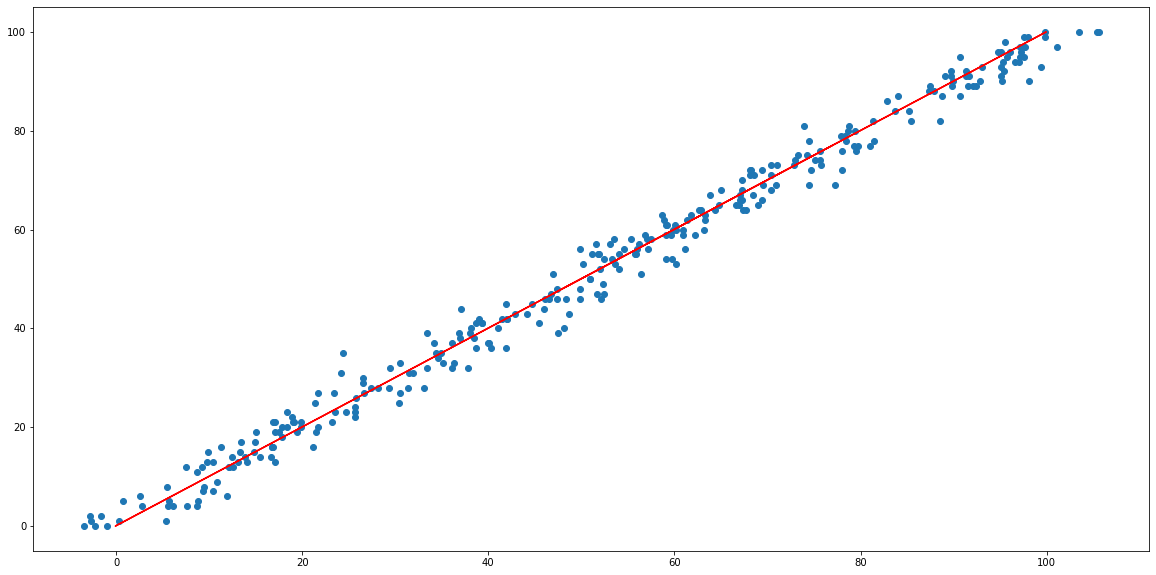

In [10]:
plt.figure(figsize=(20,10))
plt.plot(y_pred,X_test,color='red')
plt.scatter(y_test,X_test)

# 4. MULTIVARIATE LINEAR REGRSSION

https://towardsdatascience.com/multiple-linear-regression-beginners-guide-5b602d716aa3

In [11]:
data=pd.read_csv("data/USA_Housing.csv")
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [12]:
data=data.drop("Address",axis=1)

In [13]:
data_array=np.array(data)
data_array

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04, 1.05903356e+06],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04, 1.50589091e+06],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04, 1.05898799e+06],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04, 1.29895048e+06]])

In [14]:
np.random.seed(2)
np.random.shuffle(data_array)
n=0.8*len(data_array)
train,test=data_array[:3750,:],data_array[3750:,:]

In [15]:
np.shape(train), np.shape(test)

((3750, 6), (1250, 6))

In [16]:
X_train=train[:,:-1]
X_test=test[:,:-1]
y_train=train[:,-1]
y_test=test[:,-1]

In [17]:
#adding x0 to equation ---> DESIGN MATRIX
X_bias=np.ones((3750,1))
X_train=np.append(X_bias,X_train,axis=1)
X_bias=np.ones((1250,1))
X_test=np.append(X_bias,X_test,axis=1)
X_train

array([[1.00000000e+00, 6.19581431e+04, 6.06864238e+00, 8.10639460e+00,
        4.14000000e+00, 3.99531680e+04],
       [1.00000000e+00, 7.90556522e+04, 6.94701582e+00, 7.50967935e+00,
        5.39000000e+00, 4.17249093e+04],
       [1.00000000e+00, 6.49897840e+04, 5.16264535e+00, 7.46208008e+00,
        6.06000000e+00, 3.48194283e+04],
       ...,
       [1.00000000e+00, 6.90994035e+04, 5.60010165e+00, 5.40860478e+00,
        3.49000000e+00, 3.75403100e+04],
       [1.00000000e+00, 7.33315511e+04, 6.66921560e+00, 7.08547679e+00,
        3.15000000e+00, 4.26564393e+04],
       [1.00000000e+00, 6.11625803e+04, 5.89631585e+00, 7.88052142e+00,
        6.04000000e+00, 3.60337014e+04]])

### using NORMAL EQUATION

In [18]:
X_transpose=np.transpose(X_train)
dot_prod=X_transpose.dot(X_train)
variable_1=np.linalg.inv(dot_prod)
variable_2=X_transpose.dot(y_train)
theta=variable_1.dot(variable_2)
theta

array([-2.63877265e+06,  2.16401770e+01,  1.65330660e+05,  1.21416237e+05,
        1.20204500e+03,  1.51097334e+01])

In [19]:
y_preds=np.dot(X_test,theta)
y_preds

array([1295144.24657605, 1309284.36252564,  997245.30771144, ...,
       1557187.04047123, 1339115.15871631, 1510082.78503452])

In [20]:
from sklearn.metrics import r2_score
print(f"r2_score : {r2_score(y_test,y_preds)}")

r2_score : 0.9200037859190336


### using sklearn.LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
best_intercept=model.intercept_
best_slope=model.coef_
print(f"best slope : {best_slope}")
print(f"best intercept : {best_intercept}")
print(f"r2_score : {r2_score(y_test,y_preds)}")

best slope : [0.00000000e+00 2.16401770e+01 1.65330660e+05 1.21416237e+05
 1.20204500e+03 1.51097334e+01]
best intercept : -2638772.6465971465
r2_score : 0.920003785919038


In [22]:
np.random.seed(2)
X=data.drop("Price",axis=1)
y=data["Price"]
from sklearn.model_selection import cross_val_score
model_cv_score=cross_val_score(model,X,y,cv=5,scoring="r2")
model_cv_score.mean()

0.917559209760698

# 5. Ridge Regression

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/#h2_15

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
model_ridge=Ridge(alpha=0.05)
model_ridge.fit(X_train,y_train)
y_preds_ridge=model_ridge.predict(X_test)
print(f"r2_score : {r2_score(y_test,y_preds_ridge)}")

r2_score : 0.9200038227782016


In [24]:
np.random.seed(2)
from sklearn.model_selection import cross_val_score
model_ridge_cv_score=cross_val_score(model_ridge,X,y,cv=5,scoring="r2")
model_ridge_cv_score.mean()

0.9175592101962902

In [25]:
grid={"alpha":[0.1,0.5,0.05,0.09,0.8,0.9,1,1.5,1.8,2,5]}
from sklearn.model_selection import GridSearchCV
gs_ridge=GridSearchCV(estimator=model_ridge,param_grid=grid,cv=5,verbose=2)
gs_ridge.fit(X_train,y_train)
y_preds_gs_ridge=gs_ridge.predict(X_test)
print(f"r2_score : {r2_score(y_test,y_preds_gs_ridge)}")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END .........................................alpha=0.05; total time=   0.0s
[CV] END .......................................

In [26]:
gs_ridge.best_params_


{'alpha': 0.8}

# 6. LASSO REGRESSION

In [27]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import r2_score
model_lasso=Lasso(alpha=0.05)
model_lasso.fit(X_train,y_train)
y_preds_lasso=model_lasso.predict(X_test)
print(f"r2_score : {r2_score(y_test,y_preds_lasso)}")

r2_score : 0.920003785968058


In [28]:
grid={"alpha":[0.1,0.5,0.05,0.09,0.8,0.9,1,1.5,1.8,2,5]}
from sklearn.model_selection import GridSearchCV
gs_lasso=GridSearchCV(estimator=model_lasso,param_grid=grid,cv=5,verbose=2)
gs_lasso.fit(X_train,y_train)
y_preds_gs_lasso=gs_lasso.predict(X_test)
print(f"r2_score : {r2_score(y_test,y_preds_gs_lasso)}")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END .........................................alpha=0.05; total time=   0.0s
[CV] END .......................................

In [29]:
gs_lasso.best_params_

{'alpha': 5}

# 7. ELASTIC NET REGRESSION

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
model_en=ElasticNet(alpha=0.05,l1_ratio=0.5)
model_en.fit(X_train,y_train)
y_preds_en=model_en.predict(X_test)
print(f"r2 score : {r2_score(y_test,y_preds_en)}")

r2 score : 0.9198402063901704


In [31]:
from sklearn.model_selection import GridSearchCV
grid={"alpha":[0.1,0.5,0.05,0.09,0.8,0.9,1,1.5,1.8,2,5],
      "l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gs_en=GridSearchCV(estimator=model_en,param_grid=grid,cv=5,verbose=2)
gs_en.fit(X_train,y_train)
y_preds_gs_en=gs_en.predict(X_test)
print(f"r2 score: {r2_score(y_test,y_preds_gs_en)}")

Fitting 5 folds for each of 121 candidates, totalling 605 fits
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.582e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ............................alpha=0.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END .............................alpha=0.05, l1_ratio=0; total time=   0.0s
[CV] END .............................alpha=0.05, l1_ratio=0; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.055e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ...........................alpha=0.09, l1_ratio=0.6; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.8; total time=   0.0s
[CV] END ...........................alpha=0.09, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.208e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ..............................alpha=0.8, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.3; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.380e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ............................alpha=0.9, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.9, l1_ratio=0.4; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.535e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.584e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ................................alpha=1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.3; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.126e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.189e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.3; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.381e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.450e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ..............................alpha=1.8, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=1.8, l1_ratio=0.3; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.523e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ..............................alpha=2, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.538e+13, tolerance: 3.707e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.635e+13, tolerance: 3.689e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.3; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.4; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

# 8. BAYESIAN RIDGE

In [32]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
model_baye=BayesianRidge()
model_baye.fit(X_train,y_train)
y_preds_baye=model_baye.predict(X_test)
print(f"r2 score : {r2_score(y_test,y_preds_baye)}")

r2 score : 0.588466106746244


# 9. LOGISTIC REGRESSION

In [33]:
data=pd.read_csv('data/heart-disease.csv')
data.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [34]:
X=data.drop("target",axis=1)
y=data["target"]
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model_log=LogisticRegression(n_jobs=1, max_iter=10000)
model_log.fit(X_train,y_train)
y_preds=model_log.predict(X_test)
print(f"{classification_report(y_test,y_preds)}")


              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.94      0.89      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [35]:
from sklearn.model_selection import cross_val_score
model_log_cv=cross_val_score(model_log,X,y,cv=5,scoring=None)
model_log_cv.mean()

0.8282513661202187

In [36]:
grid={"penalty":['elasticnet'],
      "C":[0.5,0.7,0.9,1],
      "solver": ['saga'],
       "l1_ratio":[0.1,0.6,0.5,0.4,0.2,0.9],
       "max_iter":[10000]}
from sklearn.model_selection import GridSearchCV
model_log_gs=GridSearchCV(estimator=model_log,param_grid=grid,cv=5,verbose=2)
model_log_gs.fit(X_train,y_train)
y_preds_gs=model_log_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_gs)}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END C=0.5, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=0.5, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.6, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.6, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.6, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=0.5, l1_ratio=0.6, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.5, l1_ratio=0.6, max_iter=10000, penalty=el

[CV] END C=0.9, l1_ratio=0.2, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.9, l1_ratio=0.2, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.9, l1_ratio=0.9, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.9, l1_ratio=0.9, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.9, l1_ratio=0.9, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=0.9, l1_ratio=0.9, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.9, l1_ratio=0.9, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=1, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1, l1_ratio=0.1, max_iter=10000, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=1, l1_ratio=0.1

In [37]:
model_log_gs.best_params_

{'C': 0.7,
 'l1_ratio': 0.1,
 'max_iter': 10000,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [38]:
from sklearn.linear_model import LogisticRegressionCV
model_logcv=LogisticRegressionCV(cv=5,max_iter=10000)
model_logcv.fit(X_train,y_train)
y_preds_logcv=model_logcv.predict(X_test)
print(f"{classification_report(y_test,y_preds_logcv)}")

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.94      0.89      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# 10. SUPPORT VECTOR CLASSIFICATION (SVM)

In [39]:
data=pd.read_csv("data/heart-disease.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [40]:
X=data.drop('target',axis=1)
y=data["target"]
np.random.seed(4)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model_svm=svm.LinearSVC(max_iter=1000000)
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9180327868852459

In [41]:
y_preds_svm=model_svm.predict(X_test)
print(f"{classification_report(y_test,y_preds_svm)}")

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [42]:
from sklearn.model_selection import cross_val_score
model_svm_cv=cross_val_score(model_svm,X,y,cv=5)
model_svm_cv.mean()

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8183060109289617

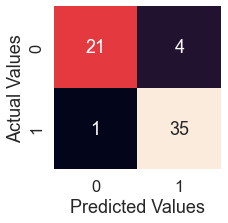

In [43]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds_svm)
def plot_con_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True,
                   cbar=False)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom, top)
plot_con_mat(conf_mat)

# 11. SUPPORT VECTOR REGRESSION (SVM)

In [44]:
data=pd.read_csv("data/USA_Housing.csv")
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [45]:
data=data.drop("Address",axis=1)
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05

In [46]:
X=data.drop("Price",axis=1)
y=data["Price"]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model_svr=svm.LinearSVR(max_iter=200000)
model_svr.fit(X_train,y_train)
y_preds_svr=model_svr.predict(X_test)
print(f"r2_score : {r2_score(y_test,y_preds_svr)}")

r2_score : 0.48796147066009854


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
model_svr_cv=cross_val_score(model_svr,X,y,cv=5)
model_svr_cv.mean()

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.49546083145268127

# 12. K- NEAREST NEIGHBOUR

In [49]:
data=pd.read_csv("data/heart-disease.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [50]:
X=data.drop("target",axis=1)
y=data["target"]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model_knn=KNeighborsClassifier(n_jobs=1)
model_knn.fit(X_train,y_train)
y_preds_knn=model_knn.predict(X_test)
print(f"{classification_report(y_test,y_preds_knn)}")

              precision    recall  f1-score   support

           0       0.46      0.59      0.52        22
           1       0.73      0.62      0.67        39

    accuracy                           0.61        61
   macro avg       0.60      0.60      0.59        61
weighted avg       0.63      0.61      0.61        61



In [52]:
grid={"n_neighbors":[3,5,7,9,10,12,14,15,17,19,20]}
from sklearn.model_selection import GridSearchCV
gs_knn=GridSearchCV(estimator=model_knn,param_grid=grid,cv=5,verbose=2)
gs_knn.fit(X_train,y_train)
y_preds_gs_knn=gs_knn.predict(X_test)
print(f"{classification_report(y_test,y_preds_gs_knn)}")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n

In [53]:
gs_knn.best_params_

{'n_neighbors': 12}

# 13. NAIVE BAYES (GAUSSIAN)

In [54]:
np.random.seed(43)
data=pd.read_csv("data/heart-disease.csv")
X=data.drop("target",axis=1)
y=data["target"]
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)
y_preds_gnb=model_gnb.predict(X_test)
print(f"{classification_report(y_test,y_preds_gnb)}")
print(f"No . of misslabeled points : {(y_test!=y_preds_gnb).sum()}")

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.85      1.00      0.92        33

    accuracy                           0.90        61
   macro avg       0.92      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61

No . of misslabeled points : 6


In [55]:
np.random.seed(43)
from sklearn.model_selection import cross_val_score
model_gnb_cv=cross_val_score(model_gnb,X,y,cv=5)
model_gnb_cv.mean()

0.8050819672131148

# 14. NAIVE BAYES (MULTINOMIAL)

In [56]:
np.random.seed(43)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model_mnb=MultinomialNB()
model_mnb.fit(X_train,y_train)
y_preds_mnb=model_mnb.predict(X_test)
print(f"{classification_report(y_test,y_preds_mnb)}")
print(f"No . of misslabeled points : {(y_test!=y_preds_mnb).sum()}")

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

No . of misslabeled points : 10


In [57]:
np.random.seed(43)
from sklearn.model_selection import cross_val_score
model_mnb_cv=cross_val_score(model_mnb,X,y,cv=5)
model_mnb_cv.mean()

0.7491256830601094

# 15. NAIVE BAYES (BERNOULLI)

In [58]:
np.random.seed(43)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model_bnb=BernoulliNB()
model_bnb.fit(X_train,y_train)
y_preds_bnb=model_bnb.predict(X_test)
print(f"{classification_report(y_test,y_preds_bnb)}")
print(f"No . of misslabeled points : {(y_test!=y_preds_bnb).sum()}")

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        28
           1       0.79      1.00      0.88        33

    accuracy                           0.85        61
   macro avg       0.89      0.84      0.84        61
weighted avg       0.88      0.85      0.85        61

No . of misslabeled points : 9


In [59]:
np.random.seed(43)
from sklearn.model_selection import cross_val_score
model_bnb_cv=cross_val_score(model_bnb,X,y,cv=5)
model_bnb_cv.mean()

0.8019672131147543

# 16. DECISION TREE 

In [60]:
np.random.seed(43)
from sklearn import tree
model_dt=tree.DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_preds_dt=model_dt.predict(X_test)
print(f"{classification_report(y_test,y_preds_dt)}")

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



[Text(169.5796875, 205.35999999999999, 'X[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(78.46875, 181.2, 'X[11] <= 0.5\ngini = 0.401\nsamples = 119\nvalue = [86, 33]'),
 Text(45.337500000000006, 157.04, 'X[12] <= 2.5\ngini = 0.499\nsamples = 56\nvalue = [27, 29]'),
 Text(20.925, 132.88, 'X[7] <= 119.5\ngini = 0.35\nsamples = 31\nvalue = [7, 24]'),
 Text(13.950000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(27.900000000000002, 108.72, 'X[8] <= 0.5\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(13.950000000000001, 84.56, 'X[4] <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(6.9750000000000005, 60.400000000000006, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(20.925, 60.400000000000006, 'X[0] <= 61.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(13.950000000000001, 36.24000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(27.900000000000002, 36.24000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'

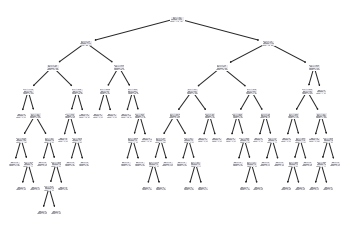

In [61]:
tree.plot_tree(model_dt)

In [62]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

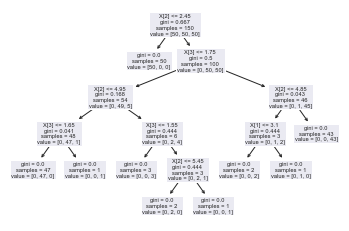

In [63]:
tree.plot_tree(clf)

In [64]:
data=pd.read_csv("data/heart-disease.csv")
data.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [65]:
X=data.drop("target",axis=1)
y=data["target"]

# 17. ENSEMBLE METHODS (Max voting)

In [66]:
from sklearn import tree
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
dt_model=tree.DecisionTreeClassifier()
knn_model=neighbors.KNeighborsClassifier()
logr_model=LogisticRegression(max_iter=100000)
np.random.seed(4)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import VotingClassifier
model_final=VotingClassifier(estimators=[('dt',dt_model),('knn',knn_model),('logr',logr_model)],voting='hard')
model_final.fit(X_train,y_train)
model_preds=model_final.predict(X_test)
model_final.score(X_test,y_test)

0.8688524590163934

# 18. ENSEMBLE METHODS (Averaging)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
np.random.seed(4)
dt_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)
logr_model.fit(X_train,y_train)

dt_score=dt_model.score(X_test,y_test)
knn_score=knn_model.score(X_test,y_test)
logr_score=logr_model.score(X_test,y_test)
model_final_score=(dt_score+knn_score+logr_score)/3
model_final_score

0.7103825136612022

# 19. ENSEMBLE METHODS (Weighted Averaging)

In [68]:
model_weighted_score=(dt_score*0.3+knn_score*0.3+logr_score*0.4)
model_weighted_score

0.7245901639344262

# 20. ENSEMBLE METHODS (Bagging MetaEstimator)

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
np.random.seed(4)
model_bag=BaggingClassifier(n_jobs=1,random_state=1)
model_bag.fit(X_train,y_train)
model_bag.score(X_test,y_test)

0.7704918032786885

In [70]:
np.random.seed(4)
from sklearn.metrics import classification_report
grid={ "base_estimator":[tree.DecisionTreeClassifier(),svm.LinearSVC(),neighbors.KNeighborsClassifier()],
       "n_estimators":[10,30,50,70,90],    
       "max_features":[0.1,0.5,0.7,1.0],
       "max_samples":[0.3,0.5,0.8,1.0],
      }
from sklearn.model_selection import GridSearchCV
model_final_gs=GridSearchCV(estimator=model_bag,param_grid=grid,cv=5,verbose=2)
model_final_gs.fit(X_train,y_train)
y_preds_final=model_final_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_final)}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.3, n_es

[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=Decision

[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.0s
[CV] END base_estimator=Decision

[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=Decision

[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=Decision

[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=Decision

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=50; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=50; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=50; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=70; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=70; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=90; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.3, n_estimators=90; total time=   0.2s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=70; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.5, n_estimators=90; total time=   0.2s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=50; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=50; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.3s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.1, max_samples=1.0, n_estimators=90; total time=   0.3s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=90; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.3, n_estimators=90; total time=   0.3s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.4s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=30; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=0.8, n_estimators=90; total time=   0.4s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.5, max_samples=1.0, n_estimators=90; total time=   0.5s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.3, n_estimators=90; total time=   0.3s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.5, n_estimators=90; total time=   0.4s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=0.8, n_estimators=90; total time=   0.5s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=0.7, max_samples=1.0, n_estimators=90; total time=   0.5s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=30; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=50; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=70; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=90; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.3, n_estimators=90; total time=   0.3s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=70; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.4s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=70; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=70; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=70; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=90; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=0.8, n_estimators=90; total time=   0.5s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=30; total time=   0.1s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=30; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=50; total time=   0.2s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=50; total time=   0.3s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=70; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=70; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=70; total time=   0.4s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=70; total time=   0.5s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=90; total time=   0.6s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\l

[CV] END base_estimator=LinearSVC(), max_features=1.0, max_samples=1.0, n_estimators=90; total time=   0.6s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.3, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_feature

[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.8, n_estimators=70; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=0.8, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.1, max_samples=1.0, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), 

[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=70; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.5, max_samples=0.5, n_estimators=90; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), 

[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=0.3, n_estimators=70; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), 

[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), max_features=0.7, max_samples=1.0, n_estimators=50; total time=   0.1s
[CV] END base_estimator=KNeighborsClassifier(), 

[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.5, n_estimators=90; total time=   0.2s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=10; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), max_features=1.0, max_samples=0.8, n_estimators=30; total time=   0.0s
[CV] END base_estimator=KNeighborsClassifier(), 

In [71]:
model_final_gs.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 90}

   # 21. ENSEMBLE METHODS (Random Forests)

In [72]:
np.random.seed(698)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model_randc=RandomForestClassifier(n_jobs=-1)
model_randc.fit(X_train,y_train)
y_preds_randc=model_randc.predict(X_test)

from sklearn.metrics import classification_report
print(f"{classification_report(y_test,y_preds_randc)}")

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.87      0.94      0.90        35

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [73]:
grid={"n_estimators":[10,30,50,70,90,100],
      "min_samples_split":[2,4,6,8,10],
      "max_features":["auto","sqrt","log2"],
      "min_samples_leaf":[1,2,4]
      }
from sklearn.model_selection import GridSearchCV
model_randc_gs=GridSearchCV(estimator=model_randc,param_grid=grid,cv=5,verbose=2)
model_randc_gs.fit(X_train,y_train)
y_preds_randc_gs=model_randc_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_randc_gs)}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.7s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time

[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, min_s

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_sam

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_

[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=4, min_sam

[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=4, min_sam

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, mi

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_sam

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=2, min_sam

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, 

[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=4, min_sam

[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=4

[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_

[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=1

[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_

[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=2

[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=4, min_sam

[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89  

   # 22. ENSEMBLE METHODS (AdaBoost)

In [74]:
np.random.seed(698)
from sklearn.ensemble import AdaBoostClassifier
model_adb=AdaBoostClassifier()
model_adb.fit(X_train,y_train)
y_preds_adb=model_adb.predict(X_test)
print(f"{classification_report(y_test,y_preds_adb)}")

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [75]:
np.random.seed(698)
grid={"n_estimators":[50,70,90,110,130,150],
      "learning_rate":[0.01,0.05,0.08,0.1,0.3,0.5,0.7,0.9,1.0]}
from sklearn.model_selection import GridSearchCV
model_adb_gs=GridSearchCV(estimator=model_adb,param_grid=grid,cv=5,verbose=2)
model_adb_gs.fit(X_train,y_train)
y_preds_adb_gs=model_adb_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_adb_gs)}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=90; total time=   0.1s
[CV] END ................learning_rate=0.01, n_

[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=130; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=130; total time=   0.1s
[CV] END ................lea

[CV] END ................learning_rate=0.7, n_estimators=130; total time=   0.3s
[CV] END ................learning_rate=0.7, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.2s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.4s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.4s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.3s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.4s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.1s
[CV] END .................le

In [76]:
model_adb_gs.best_params_

{'learning_rate': 0.05, 'n_estimators': 150}

   # 23. ENSEMBLE METHODS (GBM)

In [77]:
np.random.seed(698)
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)
y_preds_gbc=model_gbc.predict(X_test)
print(f"{classification_report(y_test,y_preds_gbc)}")

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [78]:
np.random.seed(698)
grid={"n_estimators":[50,70,90,110,130,150],
      "learning_rate":[0.01,0.05,0.08,0.1,0.3,0.5,0.7,0.9,1.0]}
from sklearn.model_selection import GridSearchCV
model_gbc_gs=GridSearchCV(estimator=model_gbc,param_grid=grid,cv=5,verbose=2)
model_gbc_gs.fit(X_train,y_train)
y_preds_gbc_gs=model_gbc_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_gbc_gs)}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=70; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=90; total time=   0.0s
[CV] END ................learning_rate=0.01, n_

[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=90; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=130; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=130; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=130; total time=   0.0s
[CV] END ................lea

[CV] END ................learning_rate=0.7, n_estimators=130; total time=   0.1s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.1s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.1s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.0s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.1s
[CV] END ................learning_rate=0.7, n_estimators=150; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.9, n_estimators=70; total time=   0.0s
[CV] END .................le

In [79]:
model_gbc_gs.best_params_

{'learning_rate': 0.05, 'n_estimators': 130}

   # 24. ENSEMBLE METHODS (XGBM)

In [80]:
np.random.seed(698)
import xgboost as xgb
model_xgb=xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_preds_xgb=model_xgb.predict(X_test)
print(f"{classification_report(y_test,y_preds_xgb)}")

[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.88      0.83      0.85        35

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [81]:
np.random.seed(698)
grid={"eta":[0.01,0.05,0.08,0.1,0.3,0.5,0.7,0.9,1.0]}
from sklearn.model_selection import GridSearchCV
model_xgb_gs=GridSearchCV(estimator=model_xgb,param_grid=grid,cv=5,verbose=2)
model_xgb_gs.fit(X_train,y_train)
y_preds_xgb_gs=model_xgb_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_xgb_gs)}")

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.01; total time=   0.0s
[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.01; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.01; total time=   0.0s
[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ...........................................eta=0.01; total time=   0.0s

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.01; total time=   0.0s
[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.05; total time=   0.0s
[21:53:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ...........................................eta=0.05; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.05; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.05; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.05; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ...........................................eta=0.08; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.08; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[CV] END ...........................................eta=0.08; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ...........................................eta=0.08; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...........................................eta=0.08; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.1; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.1; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[CV] END ............................................eta=0.1; total time=   0.0s
[21:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.1; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ............................................eta=0.1; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ............................................eta=0.3; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.3; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ............................................eta=0.3; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.3; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.3; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.5; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.5; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ............................................eta=0.5; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.5; total time=   0.0s
[21:53:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.5; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.7; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.7; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.7; total time=   0.0s
[

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[CV] END ............................................eta=0.7; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.9; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.9; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[CV] END ............................................eta=0.9; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.9; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=0.9; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=1.0; total time=   0.0s
[21:53:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=1.0; total time=   0.0s


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=1.0; total time=   0.0s
[21:53:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............................................eta=1.0; total time=   0.0s
[21:53:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[CV] END ............................................eta=1.0; total time=   0.0s
[21:53:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.88      0.83      0.85        35

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [82]:
model_xgb_gs.best_params_

{'eta': 0.01}

   # 25. ENSEMBLE METHODS (Light GBM)

In [84]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
data=pd.read_csv("data/heart-disease.csv")
X=data.drop("target",axis=1)
y=data["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [5]:
np.random.seed(698)
from sklearn.metrics import classification_report
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(X_train,y_train)
y_preds_lgb=model_lgb.predict(X_test)
print(f"{classification_report(y_test,y_preds_lgb)}")

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.72      0.77      0.74        30

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [6]:
np.random.seed(698)
grid={"learning_rate":[0.01,0.05,0.08,0.1,0.3,0.5,0.7,0.9,1.0]}
from sklearn.model_selection import GridSearchCV
model_lgb_gs=GridSearchCV(estimator=model_lgb,param_grid=grid,cv=5,verbose=2)
model_lgb_gs.fit(X_train,y_train)
y_preds_lgb_gs=model_lgb_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_lgb_gs)}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................learning_rate=0.01; total time=   0.0s
[CV] END .................................learning_rate=0.01; total time=   0.0s
[CV] END .................................learning_rate=0.01; total time=   0.0s
[CV] END .................................learning_rate=0.01; total time=   0.0s
[CV] END .................................learning_rate=0.01; total time=   0.0s
[CV] END .................................learning_rate=0.05; total time=   0.0s
[CV] END .................................learning_rate=0.05; total time=   0.0s
[CV] END .................................learning_rate=0.05; total time=   0.0s
[CV] END .................................learning_rate=0.05; total time=   0.0s
[CV] END .................................learning_rate=0.05; total time=   0.0s
[CV] END .................................learning_rate=0.08; total time=   0.0s
[CV] END .................................learnin

In [7]:
model_lgb_gs.best_params_

{'learning_rate': 0.01}

   # 26. ENSEMBLE METHODS (CATBoost)

In [8]:
import sys
!conda install --yes --prefix {sys.prefix} catboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\91700\Desktop\sample_project_1\env

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catboost-0.26.1            |   py39haa95532_0        28.8 MB
    ------------------------------------------------------------
                                           Total:        28.8 MB

The following NEW packages will be INSTALLED:

  catboost           pkgs/main/win-64::catboost-0.26.1-py39haa95532_0




catboost-0.26.1      | 28.8 MB   |            |   0% 
catboost-0.26.1      | 28.8 MB   |            |   0% 
catboost-0.26.1      | 28.8 MB   |            |   0% 
catboost-0.26.1      | 28.8 MB   | 1          |   2% 
catboost-0.26.1      | 28.8 MB   | 2          |   3% 
catboost-0.26.1      | 28.8 MB   | 4          |   5% 
catboost-0.26.1      | 28.8 MB   | 5       

In [9]:
from catboost import CatBoostClassifier
model_cb=CatBoostClassifier()
model_cb.fit(X_train,y_train)
y_preds_cb=model_cb.predict(X_test)
print(f"{classification_report(y_test,y_preds_cb)}")

Learning rate set to 0.005621
0:	learn: 0.6877628	total: 161ms	remaining: 2m 41s
1:	learn: 0.6825883	total: 164ms	remaining: 1m 21s
2:	learn: 0.6776356	total: 165ms	remaining: 54.9s
3:	learn: 0.6725990	total: 168ms	remaining: 41.8s
4:	learn: 0.6675064	total: 171ms	remaining: 34s
5:	learn: 0.6633510	total: 174ms	remaining: 28.8s
6:	learn: 0.6591835	total: 177ms	remaining: 25s
7:	learn: 0.6549257	total: 180ms	remaining: 22.3s
8:	learn: 0.6505135	total: 182ms	remaining: 20.1s
9:	learn: 0.6461509	total: 185ms	remaining: 18.3s
10:	learn: 0.6409694	total: 187ms	remaining: 16.8s
11:	learn: 0.6367659	total: 189ms	remaining: 15.5s
12:	learn: 0.6338529	total: 190ms	remaining: 14.5s
13:	learn: 0.6294744	total: 192ms	remaining: 13.5s
14:	learn: 0.6250870	total: 194ms	remaining: 12.7s
15:	learn: 0.6202529	total: 195ms	remaining: 12s
16:	learn: 0.6163900	total: 197ms	remaining: 11.4s
17:	learn: 0.6118408	total: 199ms	remaining: 10.8s
18:	learn: 0.6072068	total: 201ms	remaining: 10.4s
19:	learn: 0.60

167:	learn: 0.3173300	total: 478ms	remaining: 2.37s
168:	learn: 0.3163644	total: 480ms	remaining: 2.36s
169:	learn: 0.3153253	total: 481ms	remaining: 2.35s
170:	learn: 0.3142988	total: 483ms	remaining: 2.34s
171:	learn: 0.3132534	total: 485ms	remaining: 2.33s
172:	learn: 0.3119804	total: 487ms	remaining: 2.33s
173:	learn: 0.3107375	total: 488ms	remaining: 2.32s
174:	learn: 0.3104556	total: 489ms	remaining: 2.31s
175:	learn: 0.3094579	total: 491ms	remaining: 2.3s
176:	learn: 0.3083476	total: 492ms	remaining: 2.29s
177:	learn: 0.3072361	total: 494ms	remaining: 2.28s
178:	learn: 0.3063504	total: 497ms	remaining: 2.28s
179:	learn: 0.3056206	total: 499ms	remaining: 2.27s
180:	learn: 0.3047515	total: 501ms	remaining: 2.27s
181:	learn: 0.3036235	total: 503ms	remaining: 2.26s
182:	learn: 0.3033696	total: 504ms	remaining: 2.25s
183:	learn: 0.3025731	total: 506ms	remaining: 2.24s
184:	learn: 0.3019500	total: 509ms	remaining: 2.24s
185:	learn: 0.3015970	total: 511ms	remaining: 2.24s
186:	learn: 0

394:	learn: 0.1916181	total: 960ms	remaining: 1.47s
395:	learn: 0.1911754	total: 963ms	remaining: 1.47s
396:	learn: 0.1907969	total: 965ms	remaining: 1.47s
397:	learn: 0.1904298	total: 969ms	remaining: 1.47s
398:	learn: 0.1901295	total: 970ms	remaining: 1.46s
399:	learn: 0.1898062	total: 972ms	remaining: 1.46s
400:	learn: 0.1896515	total: 974ms	remaining: 1.46s
401:	learn: 0.1892494	total: 977ms	remaining: 1.45s
402:	learn: 0.1888520	total: 979ms	remaining: 1.45s
403:	learn: 0.1886783	total: 981ms	remaining: 1.45s
404:	learn: 0.1882686	total: 984ms	remaining: 1.45s
405:	learn: 0.1880352	total: 989ms	remaining: 1.45s
406:	learn: 0.1876376	total: 993ms	remaining: 1.45s
407:	learn: 0.1875418	total: 995ms	remaining: 1.44s
408:	learn: 0.1870258	total: 1.01s	remaining: 1.46s
409:	learn: 0.1867426	total: 1.01s	remaining: 1.46s
410:	learn: 0.1864917	total: 1.02s	remaining: 1.46s
411:	learn: 0.1861808	total: 1.02s	remaining: 1.45s
412:	learn: 0.1859001	total: 1.02s	remaining: 1.45s
413:	learn: 

579:	learn: 0.1459817	total: 1.46s	remaining: 1.05s
580:	learn: 0.1456701	total: 1.46s	remaining: 1.05s
581:	learn: 0.1453648	total: 1.46s	remaining: 1.05s
582:	learn: 0.1452829	total: 1.47s	remaining: 1.05s
583:	learn: 0.1449796	total: 1.47s	remaining: 1.05s
584:	learn: 0.1448447	total: 1.47s	remaining: 1.04s
585:	learn: 0.1446741	total: 1.47s	remaining: 1.04s
586:	learn: 0.1444485	total: 1.47s	remaining: 1.04s
587:	learn: 0.1443162	total: 1.48s	remaining: 1.03s
588:	learn: 0.1441637	total: 1.48s	remaining: 1.03s
589:	learn: 0.1440289	total: 1.48s	remaining: 1.03s
590:	learn: 0.1439004	total: 1.48s	remaining: 1.02s
591:	learn: 0.1436828	total: 1.48s	remaining: 1.02s
592:	learn: 0.1434843	total: 1.49s	remaining: 1.02s
593:	learn: 0.1433494	total: 1.49s	remaining: 1.02s
594:	learn: 0.1430692	total: 1.49s	remaining: 1.01s
595:	learn: 0.1428167	total: 1.49s	remaining: 1.01s
596:	learn: 0.1425992	total: 1.5s	remaining: 1.01s
597:	learn: 0.1423956	total: 1.5s	remaining: 1.01s
598:	learn: 0.

803:	learn: 0.1095115	total: 1.94s	remaining: 473ms
804:	learn: 0.1093779	total: 1.94s	remaining: 470ms
805:	learn: 0.1092104	total: 1.94s	remaining: 468ms
806:	learn: 0.1091381	total: 1.95s	remaining: 466ms
807:	learn: 0.1090062	total: 1.95s	remaining: 464ms
808:	learn: 0.1088285	total: 1.95s	remaining: 461ms
809:	learn: 0.1086006	total: 1.95s	remaining: 458ms
810:	learn: 0.1084978	total: 1.96s	remaining: 456ms
811:	learn: 0.1082894	total: 1.96s	remaining: 453ms
812:	learn: 0.1081757	total: 1.96s	remaining: 451ms
813:	learn: 0.1080521	total: 1.96s	remaining: 449ms
814:	learn: 0.1079128	total: 1.97s	remaining: 446ms
815:	learn: 0.1076993	total: 1.97s	remaining: 444ms
816:	learn: 0.1075472	total: 1.97s	remaining: 441ms
817:	learn: 0.1074262	total: 1.97s	remaining: 439ms
818:	learn: 0.1073040	total: 1.98s	remaining: 436ms
819:	learn: 0.1071483	total: 1.98s	remaining: 434ms
820:	learn: 0.1070061	total: 1.98s	remaining: 432ms
821:	learn: 0.1069739	total: 1.98s	remaining: 430ms
822:	learn: 

In [10]:
np.random.seed(698)
grid={"learning_rate":[0.01,0.05,0.08,0.1,0.3,0.5,0.7,0.9,1.0]}
from sklearn.model_selection import GridSearchCV
model_cb_gs=GridSearchCV(estimator=model_cb,param_grid=grid,cv=5,verbose=2)
model_cb_gs.fit(X_train,y_train)
y_preds_cb_gs=model_cb_gs.predict(X_test)
print(f"{classification_report(y_test,y_preds_cb_gs)}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.6854758	total: 1.57ms	remaining: 1.57s
1:	learn: 0.6778039	total: 3.33ms	remaining: 1.66s
2:	learn: 0.6706422	total: 5.03ms	remaining: 1.67s
3:	learn: 0.6623558	total: 6.8ms	remaining: 1.69s
4:	learn: 0.6545020	total: 8.56ms	remaining: 1.7s
5:	learn: 0.6474915	total: 10.2ms	remaining: 1.7s
6:	learn: 0.6411267	total: 11.7ms	remaining: 1.65s
7:	learn: 0.6327618	total: 13.4ms	remaining: 1.66s
8:	learn: 0.6249925	total: 15.5ms	remaining: 1.7s
9:	learn: 0.6179383	total: 16.8ms	remaining: 1.67s
10:	learn: 0.6112180	total: 28.1ms	remaining: 2.52s
11:	learn: 0.6038234	total: 31.2ms	remaining: 2.57s
12:	learn: 0.5969519	total: 37.2ms	remaining: 2.82s
13:	learn: 0.5892646	total: 39.6ms	remaining: 2.79s
14:	learn: 0.5832521	total: 41.3ms	remaining: 2.71s
15:	learn: 0.5759171	total: 43.1ms	remaining: 2.65s
16:	learn: 0.5685184	total: 44.5ms	remaining: 2.58s
17:	learn: 0.5640999	total: 45.9ms	remaining: 2.5s
18:	learn: 0.558511

162:	learn: 0.2266059	total: 293ms	remaining: 1.5s
163:	learn: 0.2256967	total: 294ms	remaining: 1.5s
164:	learn: 0.2249413	total: 296ms	remaining: 1.5s
165:	learn: 0.2239810	total: 297ms	remaining: 1.49s
166:	learn: 0.2232858	total: 299ms	remaining: 1.49s
167:	learn: 0.2224988	total: 301ms	remaining: 1.49s
168:	learn: 0.2216351	total: 302ms	remaining: 1.48s
169:	learn: 0.2207725	total: 304ms	remaining: 1.48s
170:	learn: 0.2200601	total: 306ms	remaining: 1.48s
171:	learn: 0.2190513	total: 307ms	remaining: 1.48s
172:	learn: 0.2179884	total: 309ms	remaining: 1.48s
173:	learn: 0.2171528	total: 311ms	remaining: 1.48s
174:	learn: 0.2162446	total: 313ms	remaining: 1.47s
175:	learn: 0.2156403	total: 315ms	remaining: 1.47s
176:	learn: 0.2146687	total: 317ms	remaining: 1.47s
177:	learn: 0.2145166	total: 318ms	remaining: 1.47s
178:	learn: 0.2139573	total: 320ms	remaining: 1.47s
179:	learn: 0.2129118	total: 322ms	remaining: 1.47s
180:	learn: 0.2120729	total: 324ms	remaining: 1.47s
181:	learn: 0.2

361:	learn: 0.1244095	total: 609ms	remaining: 1.07s
362:	learn: 0.1239663	total: 611ms	remaining: 1.07s
363:	learn: 0.1235340	total: 613ms	remaining: 1.07s
364:	learn: 0.1232673	total: 615ms	remaining: 1.07s
365:	learn: 0.1229926	total: 617ms	remaining: 1.07s
366:	learn: 0.1228383	total: 619ms	remaining: 1.07s
367:	learn: 0.1225054	total: 621ms	remaining: 1.07s
368:	learn: 0.1223391	total: 623ms	remaining: 1.06s
369:	learn: 0.1221262	total: 625ms	remaining: 1.06s
370:	learn: 0.1220597	total: 626ms	remaining: 1.06s
371:	learn: 0.1216087	total: 628ms	remaining: 1.06s
372:	learn: 0.1211870	total: 631ms	remaining: 1.06s
373:	learn: 0.1208758	total: 632ms	remaining: 1.06s
374:	learn: 0.1204600	total: 635ms	remaining: 1.06s
375:	learn: 0.1201516	total: 637ms	remaining: 1.06s
376:	learn: 0.1198707	total: 639ms	remaining: 1.05s
377:	learn: 0.1195828	total: 641ms	remaining: 1.05s
378:	learn: 0.1194585	total: 642ms	remaining: 1.05s
379:	learn: 0.1190884	total: 644ms	remaining: 1.05s
380:	learn: 

587:	learn: 0.0735535	total: 1.08s	remaining: 760ms
588:	learn: 0.0733479	total: 1.09s	remaining: 759ms
589:	learn: 0.0732990	total: 1.09s	remaining: 758ms
590:	learn: 0.0731030	total: 1.09s	remaining: 756ms
591:	learn: 0.0730366	total: 1.09s	remaining: 754ms
592:	learn: 0.0728297	total: 1.1s	remaining: 752ms
593:	learn: 0.0725593	total: 1.1s	remaining: 751ms
594:	learn: 0.0723548	total: 1.1s	remaining: 749ms
595:	learn: 0.0721986	total: 1.1s	remaining: 746ms
596:	learn: 0.0719903	total: 1.1s	remaining: 745ms
597:	learn: 0.0718615	total: 1.1s	remaining: 743ms
598:	learn: 0.0717984	total: 1.11s	remaining: 741ms
599:	learn: 0.0715382	total: 1.11s	remaining: 740ms
600:	learn: 0.0713219	total: 1.13s	remaining: 748ms
601:	learn: 0.0711631	total: 1.13s	remaining: 746ms
602:	learn: 0.0709060	total: 1.13s	remaining: 745ms
603:	learn: 0.0706862	total: 1.13s	remaining: 743ms
604:	learn: 0.0704783	total: 1.14s	remaining: 742ms
605:	learn: 0.0702728	total: 1.14s	remaining: 740ms
606:	learn: 0.0700

751:	learn: 0.0541106	total: 1.4s	remaining: 463ms
752:	learn: 0.0540580	total: 1.41s	remaining: 461ms
753:	learn: 0.0539363	total: 1.41s	remaining: 459ms
754:	learn: 0.0537997	total: 1.41s	remaining: 458ms
755:	learn: 0.0537623	total: 1.41s	remaining: 456ms
756:	learn: 0.0536811	total: 1.41s	remaining: 454ms
757:	learn: 0.0535927	total: 1.42s	remaining: 452ms
758:	learn: 0.0534890	total: 1.42s	remaining: 450ms
759:	learn: 0.0533752	total: 1.42s	remaining: 449ms
760:	learn: 0.0532621	total: 1.42s	remaining: 447ms
761:	learn: 0.0531326	total: 1.43s	remaining: 445ms
762:	learn: 0.0530067	total: 1.43s	remaining: 443ms
763:	learn: 0.0528817	total: 1.43s	remaining: 442ms
764:	learn: 0.0528682	total: 1.43s	remaining: 440ms
765:	learn: 0.0528617	total: 1.43s	remaining: 438ms
766:	learn: 0.0528431	total: 1.44s	remaining: 437ms
767:	learn: 0.0527297	total: 1.44s	remaining: 436ms
768:	learn: 0.0527157	total: 1.45s	remaining: 434ms
769:	learn: 0.0526321	total: 1.45s	remaining: 432ms
770:	learn: 0

911:	learn: 0.0421848	total: 1.72s	remaining: 166ms
912:	learn: 0.0420888	total: 1.72s	remaining: 164ms
913:	learn: 0.0420241	total: 1.72s	remaining: 162ms
914:	learn: 0.0419799	total: 1.72s	remaining: 160ms
915:	learn: 0.0419761	total: 1.73s	remaining: 158ms
916:	learn: 0.0419007	total: 1.73s	remaining: 156ms
917:	learn: 0.0418923	total: 1.73s	remaining: 154ms
918:	learn: 0.0418480	total: 1.73s	remaining: 153ms
919:	learn: 0.0417332	total: 1.73s	remaining: 151ms
920:	learn: 0.0416485	total: 1.74s	remaining: 149ms
921:	learn: 0.0416445	total: 1.75s	remaining: 148ms
922:	learn: 0.0415649	total: 1.75s	remaining: 146ms
923:	learn: 0.0414820	total: 1.75s	remaining: 144ms
924:	learn: 0.0414337	total: 1.75s	remaining: 142ms
925:	learn: 0.0414140	total: 1.76s	remaining: 140ms
926:	learn: 0.0414070	total: 1.76s	remaining: 138ms
927:	learn: 0.0413366	total: 1.76s	remaining: 137ms
928:	learn: 0.0412570	total: 1.76s	remaining: 135ms
929:	learn: 0.0411535	total: 1.76s	remaining: 133ms
930:	learn: 

121:	learn: 0.2906949	total: 295ms	remaining: 2.12s
122:	learn: 0.2896611	total: 298ms	remaining: 2.13s
123:	learn: 0.2880180	total: 301ms	remaining: 2.12s
124:	learn: 0.2866226	total: 303ms	remaining: 2.12s
125:	learn: 0.2851313	total: 305ms	remaining: 2.12s
126:	learn: 0.2837604	total: 307ms	remaining: 2.11s
127:	learn: 0.2825262	total: 309ms	remaining: 2.1s
128:	learn: 0.2816767	total: 310ms	remaining: 2.1s
129:	learn: 0.2805170	total: 313ms	remaining: 2.09s
130:	learn: 0.2793907	total: 314ms	remaining: 2.08s
131:	learn: 0.2786912	total: 316ms	remaining: 2.08s
132:	learn: 0.2775935	total: 318ms	remaining: 2.08s
133:	learn: 0.2767601	total: 320ms	remaining: 2.07s
134:	learn: 0.2758988	total: 322ms	remaining: 2.06s
135:	learn: 0.2739914	total: 323ms	remaining: 2.05s
136:	learn: 0.2723768	total: 325ms	remaining: 2.04s
137:	learn: 0.2710452	total: 326ms	remaining: 2.04s
138:	learn: 0.2699531	total: 328ms	remaining: 2.03s
139:	learn: 0.2687311	total: 330ms	remaining: 2.03s
140:	learn: 0.

283:	learn: 0.1672635	total: 604ms	remaining: 1.52s
284:	learn: 0.1667641	total: 606ms	remaining: 1.52s
285:	learn: 0.1662167	total: 608ms	remaining: 1.52s
286:	learn: 0.1655997	total: 610ms	remaining: 1.52s
287:	learn: 0.1651880	total: 612ms	remaining: 1.51s
288:	learn: 0.1645252	total: 613ms	remaining: 1.51s
289:	learn: 0.1641626	total: 615ms	remaining: 1.5s
290:	learn: 0.1635556	total: 617ms	remaining: 1.5s
291:	learn: 0.1631412	total: 618ms	remaining: 1.5s
292:	learn: 0.1626631	total: 620ms	remaining: 1.5s
293:	learn: 0.1622568	total: 621ms	remaining: 1.49s
294:	learn: 0.1616772	total: 624ms	remaining: 1.49s
295:	learn: 0.1615423	total: 626ms	remaining: 1.49s
296:	learn: 0.1609293	total: 628ms	remaining: 1.49s
297:	learn: 0.1604150	total: 630ms	remaining: 1.48s
298:	learn: 0.1600958	total: 632ms	remaining: 1.48s
299:	learn: 0.1596843	total: 634ms	remaining: 1.48s
300:	learn: 0.1592547	total: 636ms	remaining: 1.48s
301:	learn: 0.1586750	total: 637ms	remaining: 1.47s
302:	learn: 0.15

450:	learn: 0.1089479	total: 925ms	remaining: 1.13s
451:	learn: 0.1088008	total: 927ms	remaining: 1.12s
452:	learn: 0.1086651	total: 928ms	remaining: 1.12s
453:	learn: 0.1083491	total: 930ms	remaining: 1.12s
454:	learn: 0.1080851	total: 932ms	remaining: 1.11s
455:	learn: 0.1077047	total: 933ms	remaining: 1.11s
456:	learn: 0.1073232	total: 935ms	remaining: 1.11s
457:	learn: 0.1070637	total: 937ms	remaining: 1.11s
458:	learn: 0.1069015	total: 939ms	remaining: 1.11s
459:	learn: 0.1066190	total: 940ms	remaining: 1.1s
460:	learn: 0.1061624	total: 942ms	remaining: 1.1s
461:	learn: 0.1060957	total: 943ms	remaining: 1.1s
462:	learn: 0.1059542	total: 945ms	remaining: 1.09s
463:	learn: 0.1056544	total: 946ms	remaining: 1.09s
464:	learn: 0.1053037	total: 948ms	remaining: 1.09s
465:	learn: 0.1049877	total: 950ms	remaining: 1.09s
466:	learn: 0.1048087	total: 952ms	remaining: 1.09s
467:	learn: 0.1046653	total: 954ms	remaining: 1.08s
468:	learn: 0.1043628	total: 955ms	remaining: 1.08s
469:	learn: 0.1

653:	learn: 0.0702517	total: 1.24s	remaining: 658ms
654:	learn: 0.0701277	total: 1.25s	remaining: 656ms
655:	learn: 0.0699925	total: 1.25s	remaining: 654ms
656:	learn: 0.0699538	total: 1.25s	remaining: 652ms
657:	learn: 0.0697917	total: 1.25s	remaining: 650ms
658:	learn: 0.0696182	total: 1.25s	remaining: 649ms
659:	learn: 0.0695087	total: 1.25s	remaining: 647ms
660:	learn: 0.0693608	total: 1.26s	remaining: 646ms
661:	learn: 0.0691262	total: 1.26s	remaining: 643ms
662:	learn: 0.0690734	total: 1.26s	remaining: 642ms
663:	learn: 0.0689635	total: 1.26s	remaining: 640ms
664:	learn: 0.0687770	total: 1.26s	remaining: 638ms
665:	learn: 0.0686324	total: 1.27s	remaining: 636ms
666:	learn: 0.0684908	total: 1.27s	remaining: 634ms
667:	learn: 0.0683655	total: 1.27s	remaining: 632ms
668:	learn: 0.0683604	total: 1.27s	remaining: 630ms
669:	learn: 0.0682455	total: 1.27s	remaining: 628ms
670:	learn: 0.0682351	total: 1.27s	remaining: 626ms
671:	learn: 0.0680705	total: 1.28s	remaining: 624ms
672:	learn: 

856:	learn: 0.0488084	total: 1.56s	remaining: 261ms
857:	learn: 0.0488025	total: 1.57s	remaining: 259ms
858:	learn: 0.0487419	total: 1.57s	remaining: 257ms
859:	learn: 0.0486590	total: 1.57s	remaining: 255ms
860:	learn: 0.0485619	total: 1.57s	remaining: 254ms
861:	learn: 0.0484732	total: 1.57s	remaining: 252ms
862:	learn: 0.0484685	total: 1.57s	remaining: 250ms
863:	learn: 0.0484037	total: 1.57s	remaining: 248ms
864:	learn: 0.0482980	total: 1.58s	remaining: 246ms
865:	learn: 0.0482063	total: 1.58s	remaining: 244ms
866:	learn: 0.0482013	total: 1.58s	remaining: 242ms
867:	learn: 0.0481159	total: 1.58s	remaining: 241ms
868:	learn: 0.0480433	total: 1.58s	remaining: 239ms
869:	learn: 0.0479622	total: 1.59s	remaining: 237ms
870:	learn: 0.0478949	total: 1.59s	remaining: 235ms
871:	learn: 0.0478285	total: 1.59s	remaining: 234ms
872:	learn: 0.0477315	total: 1.59s	remaining: 232ms
873:	learn: 0.0476170	total: 1.6s	remaining: 230ms
874:	learn: 0.0476112	total: 1.6s	remaining: 228ms
875:	learn: 0.

89:	learn: 0.3338645	total: 158ms	remaining: 1.6s
90:	learn: 0.3319251	total: 160ms	remaining: 1.59s
91:	learn: 0.3299979	total: 161ms	remaining: 1.59s
92:	learn: 0.3287538	total: 163ms	remaining: 1.59s
93:	learn: 0.3270657	total: 165ms	remaining: 1.59s
94:	learn: 0.3254354	total: 167ms	remaining: 1.59s
95:	learn: 0.3235214	total: 168ms	remaining: 1.58s
96:	learn: 0.3213502	total: 170ms	remaining: 1.58s
97:	learn: 0.3195034	total: 171ms	remaining: 1.57s
98:	learn: 0.3178326	total: 173ms	remaining: 1.58s
99:	learn: 0.3166739	total: 176ms	remaining: 1.58s
100:	learn: 0.3150342	total: 178ms	remaining: 1.58s
101:	learn: 0.3126407	total: 179ms	remaining: 1.58s
102:	learn: 0.3113166	total: 181ms	remaining: 1.58s
103:	learn: 0.3096684	total: 183ms	remaining: 1.58s
104:	learn: 0.3080368	total: 185ms	remaining: 1.57s
105:	learn: 0.3068898	total: 187ms	remaining: 1.57s
106:	learn: 0.3052103	total: 189ms	remaining: 1.57s
107:	learn: 0.3041620	total: 190ms	remaining: 1.57s
108:	learn: 0.3032698	to

255:	learn: 0.1783767	total: 477ms	remaining: 1.39s
256:	learn: 0.1779916	total: 479ms	remaining: 1.39s
257:	learn: 0.1775773	total: 482ms	remaining: 1.39s
258:	learn: 0.1771038	total: 484ms	remaining: 1.38s
259:	learn: 0.1763817	total: 486ms	remaining: 1.38s
260:	learn: 0.1757490	total: 488ms	remaining: 1.38s
261:	learn: 0.1751654	total: 492ms	remaining: 1.38s
262:	learn: 0.1746500	total: 494ms	remaining: 1.38s
263:	learn: 0.1741109	total: 497ms	remaining: 1.39s
264:	learn: 0.1737605	total: 500ms	remaining: 1.39s
265:	learn: 0.1733327	total: 503ms	remaining: 1.39s
266:	learn: 0.1731134	total: 506ms	remaining: 1.39s
267:	learn: 0.1724653	total: 509ms	remaining: 1.39s
268:	learn: 0.1718982	total: 511ms	remaining: 1.39s
269:	learn: 0.1713562	total: 513ms	remaining: 1.39s
270:	learn: 0.1708139	total: 515ms	remaining: 1.39s
271:	learn: 0.1704962	total: 518ms	remaining: 1.39s
272:	learn: 0.1701751	total: 520ms	remaining: 1.38s
273:	learn: 0.1696502	total: 523ms	remaining: 1.39s
274:	learn: 

487:	learn: 0.0999355	total: 962ms	remaining: 1.01s
488:	learn: 0.0997196	total: 964ms	remaining: 1.01s
489:	learn: 0.0996394	total: 966ms	remaining: 1s
490:	learn: 0.0993571	total: 969ms	remaining: 1s
491:	learn: 0.0990738	total: 971ms	remaining: 1s
492:	learn: 0.0988338	total: 972ms	remaining: 1000ms
493:	learn: 0.0985411	total: 974ms	remaining: 998ms
494:	learn: 0.0983936	total: 976ms	remaining: 996ms
495:	learn: 0.0981379	total: 978ms	remaining: 994ms
496:	learn: 0.0979526	total: 980ms	remaining: 991ms
497:	learn: 0.0978897	total: 981ms	remaining: 989ms
498:	learn: 0.0977511	total: 982ms	remaining: 986ms
499:	learn: 0.0975466	total: 984ms	remaining: 984ms
500:	learn: 0.0973125	total: 985ms	remaining: 981ms
501:	learn: 0.0971508	total: 987ms	remaining: 979ms
502:	learn: 0.0968762	total: 990ms	remaining: 978ms
503:	learn: 0.0966307	total: 992ms	remaining: 976ms
504:	learn: 0.0963545	total: 994ms	remaining: 974ms
505:	learn: 0.0960905	total: 995ms	remaining: 972ms
506:	learn: 0.095789

655:	learn: 0.0681970	total: 1.28s	remaining: 670ms
656:	learn: 0.0680001	total: 1.28s	remaining: 669ms
657:	learn: 0.0678088	total: 1.28s	remaining: 666ms
658:	learn: 0.0676888	total: 1.28s	remaining: 665ms
659:	learn: 0.0675137	total: 1.29s	remaining: 663ms
660:	learn: 0.0673178	total: 1.29s	remaining: 661ms
661:	learn: 0.0672313	total: 1.29s	remaining: 659ms
662:	learn: 0.0671426	total: 1.29s	remaining: 657ms
663:	learn: 0.0669475	total: 1.29s	remaining: 656ms
664:	learn: 0.0667578	total: 1.3s	remaining: 654ms
665:	learn: 0.0666279	total: 1.3s	remaining: 652ms
666:	learn: 0.0664305	total: 1.3s	remaining: 650ms
667:	learn: 0.0664157	total: 1.3s	remaining: 648ms
668:	learn: 0.0663677	total: 1.3s	remaining: 646ms
669:	learn: 0.0662030	total: 1.31s	remaining: 644ms
670:	learn: 0.0660724	total: 1.31s	remaining: 642ms
671:	learn: 0.0660554	total: 1.31s	remaining: 640ms
672:	learn: 0.0658761	total: 1.31s	remaining: 638ms
673:	learn: 0.0658110	total: 1.31s	remaining: 636ms
674:	learn: 0.065

892:	learn: 0.0445281	total: 1.76s	remaining: 211ms
893:	learn: 0.0444576	total: 1.76s	remaining: 209ms
894:	learn: 0.0444495	total: 1.76s	remaining: 207ms
895:	learn: 0.0443851	total: 1.77s	remaining: 205ms
896:	learn: 0.0442902	total: 1.77s	remaining: 203ms
897:	learn: 0.0442682	total: 1.77s	remaining: 201ms
898:	learn: 0.0442058	total: 1.77s	remaining: 199ms
899:	learn: 0.0441035	total: 1.77s	remaining: 197ms
900:	learn: 0.0440212	total: 1.78s	remaining: 195ms
901:	learn: 0.0440114	total: 1.78s	remaining: 193ms
902:	learn: 0.0439429	total: 1.78s	remaining: 191ms
903:	learn: 0.0438476	total: 1.78s	remaining: 189ms
904:	learn: 0.0438399	total: 1.78s	remaining: 187ms
905:	learn: 0.0437582	total: 1.79s	remaining: 185ms
906:	learn: 0.0437506	total: 1.79s	remaining: 183ms
907:	learn: 0.0436739	total: 1.79s	remaining: 181ms
908:	learn: 0.0436175	total: 1.79s	remaining: 179ms
909:	learn: 0.0435371	total: 1.79s	remaining: 177ms
910:	learn: 0.0434623	total: 1.8s	remaining: 176ms
911:	learn: 0

110:	learn: 0.2727452	total: 221ms	remaining: 1.77s
111:	learn: 0.2712762	total: 223ms	remaining: 1.77s
112:	learn: 0.2701332	total: 225ms	remaining: 1.76s
113:	learn: 0.2690522	total: 226ms	remaining: 1.76s
114:	learn: 0.2672901	total: 228ms	remaining: 1.75s
115:	learn: 0.2662297	total: 229ms	remaining: 1.75s
116:	learn: 0.2645225	total: 231ms	remaining: 1.74s
117:	learn: 0.2635392	total: 232ms	remaining: 1.74s
118:	learn: 0.2621737	total: 234ms	remaining: 1.73s
119:	learn: 0.2608552	total: 236ms	remaining: 1.73s
120:	learn: 0.2598460	total: 238ms	remaining: 1.73s
121:	learn: 0.2581674	total: 241ms	remaining: 1.73s
122:	learn: 0.2564417	total: 243ms	remaining: 1.73s
123:	learn: 0.2552937	total: 245ms	remaining: 1.73s
124:	learn: 0.2547478	total: 246ms	remaining: 1.72s
125:	learn: 0.2536755	total: 248ms	remaining: 1.72s
126:	learn: 0.2518387	total: 251ms	remaining: 1.72s
127:	learn: 0.2502435	total: 253ms	remaining: 1.72s
128:	learn: 0.2497508	total: 255ms	remaining: 1.72s
129:	learn: 

336:	learn: 0.1216209	total: 700ms	remaining: 1.38s
337:	learn: 0.1214362	total: 701ms	remaining: 1.37s
338:	learn: 0.1212436	total: 703ms	remaining: 1.37s
339:	learn: 0.1208830	total: 705ms	remaining: 1.37s
340:	learn: 0.1204646	total: 708ms	remaining: 1.37s
341:	learn: 0.1198488	total: 709ms	remaining: 1.36s
342:	learn: 0.1193572	total: 711ms	remaining: 1.36s
343:	learn: 0.1189572	total: 713ms	remaining: 1.36s
344:	learn: 0.1186460	total: 716ms	remaining: 1.36s
345:	learn: 0.1183214	total: 719ms	remaining: 1.36s
346:	learn: 0.1181137	total: 720ms	remaining: 1.35s
347:	learn: 0.1178385	total: 722ms	remaining: 1.35s
348:	learn: 0.1177418	total: 723ms	remaining: 1.35s
349:	learn: 0.1173367	total: 725ms	remaining: 1.35s
350:	learn: 0.1171584	total: 727ms	remaining: 1.34s
351:	learn: 0.1166842	total: 728ms	remaining: 1.34s
352:	learn: 0.1163823	total: 730ms	remaining: 1.34s
353:	learn: 0.1159010	total: 732ms	remaining: 1.34s
354:	learn: 0.1154876	total: 734ms	remaining: 1.33s
355:	learn: 

556:	learn: 0.0694312	total: 1.18s	remaining: 936ms
557:	learn: 0.0692544	total: 1.18s	remaining: 934ms
558:	learn: 0.0690950	total: 1.18s	remaining: 931ms
559:	learn: 0.0689104	total: 1.18s	remaining: 929ms
560:	learn: 0.0687792	total: 1.18s	remaining: 927ms
561:	learn: 0.0685700	total: 1.19s	remaining: 925ms
562:	learn: 0.0684340	total: 1.19s	remaining: 923ms
563:	learn: 0.0682543	total: 1.19s	remaining: 921ms
564:	learn: 0.0681978	total: 1.19s	remaining: 919ms
565:	learn: 0.0680015	total: 1.2s	remaining: 917ms
566:	learn: 0.0677679	total: 1.2s	remaining: 915ms
567:	learn: 0.0676451	total: 1.2s	remaining: 913ms
568:	learn: 0.0674287	total: 1.2s	remaining: 911ms
569:	learn: 0.0673394	total: 1.21s	remaining: 909ms
570:	learn: 0.0671793	total: 1.21s	remaining: 908ms
571:	learn: 0.0670014	total: 1.21s	remaining: 905ms
572:	learn: 0.0669169	total: 1.21s	remaining: 903ms
573:	learn: 0.0667485	total: 1.21s	remaining: 900ms
574:	learn: 0.0665917	total: 1.22s	remaining: 899ms
575:	learn: 0.06

717:	learn: 0.0479872	total: 1.49s	remaining: 587ms
718:	learn: 0.0479610	total: 1.5s	remaining: 584ms
719:	learn: 0.0478656	total: 1.5s	remaining: 582ms
720:	learn: 0.0478144	total: 1.5s	remaining: 580ms
721:	learn: 0.0477354	total: 1.5s	remaining: 577ms
722:	learn: 0.0475982	total: 1.5s	remaining: 575ms
723:	learn: 0.0474918	total: 1.5s	remaining: 573ms
724:	learn: 0.0474284	total: 1.5s	remaining: 570ms
725:	learn: 0.0473149	total: 1.5s	remaining: 568ms
726:	learn: 0.0472178	total: 1.51s	remaining: 566ms
727:	learn: 0.0471084	total: 1.51s	remaining: 564ms
728:	learn: 0.0469959	total: 1.51s	remaining: 562ms
729:	learn: 0.0469094	total: 1.51s	remaining: 560ms
730:	learn: 0.0467921	total: 1.51s	remaining: 558ms
731:	learn: 0.0466771	total: 1.52s	remaining: 556ms
732:	learn: 0.0465647	total: 1.52s	remaining: 554ms
733:	learn: 0.0465290	total: 1.52s	remaining: 551ms
734:	learn: 0.0464804	total: 1.52s	remaining: 549ms
735:	learn: 0.0464491	total: 1.52s	remaining: 547ms
736:	learn: 0.046364

892:	learn: 0.0345781	total: 1.81s	remaining: 217ms
893:	learn: 0.0345134	total: 1.81s	remaining: 215ms
894:	learn: 0.0344681	total: 1.81s	remaining: 213ms
895:	learn: 0.0343829	total: 1.82s	remaining: 211ms
896:	learn: 0.0343728	total: 1.82s	remaining: 209ms
897:	learn: 0.0342855	total: 1.82s	remaining: 207ms
898:	learn: 0.0342180	total: 1.82s	remaining: 205ms
899:	learn: 0.0341470	total: 1.82s	remaining: 203ms
900:	learn: 0.0340954	total: 1.82s	remaining: 201ms
901:	learn: 0.0340074	total: 1.83s	remaining: 199ms
902:	learn: 0.0339527	total: 1.83s	remaining: 197ms
903:	learn: 0.0338905	total: 1.83s	remaining: 195ms
904:	learn: 0.0338144	total: 1.83s	remaining: 192ms
905:	learn: 0.0337600	total: 1.83s	remaining: 190ms
906:	learn: 0.0336763	total: 1.84s	remaining: 188ms
907:	learn: 0.0335938	total: 1.84s	remaining: 186ms
908:	learn: 0.0335474	total: 1.84s	remaining: 184ms
909:	learn: 0.0334786	total: 1.84s	remaining: 182ms
910:	learn: 0.0334180	total: 1.84s	remaining: 180ms
911:	learn: 

62:	learn: 0.3782280	total: 170ms	remaining: 2.53s
63:	learn: 0.3748533	total: 173ms	remaining: 2.54s
64:	learn: 0.3716915	total: 176ms	remaining: 2.53s
65:	learn: 0.3690132	total: 178ms	remaining: 2.51s
66:	learn: 0.3664196	total: 180ms	remaining: 2.5s
67:	learn: 0.3633834	total: 182ms	remaining: 2.49s
68:	learn: 0.3600940	total: 184ms	remaining: 2.48s
69:	learn: 0.3575371	total: 186ms	remaining: 2.47s
70:	learn: 0.3544419	total: 188ms	remaining: 2.45s
71:	learn: 0.3537125	total: 189ms	remaining: 2.43s
72:	learn: 0.3516677	total: 191ms	remaining: 2.42s
73:	learn: 0.3491314	total: 193ms	remaining: 2.41s
74:	learn: 0.3467201	total: 195ms	remaining: 2.4s
75:	learn: 0.3447605	total: 197ms	remaining: 2.39s
76:	learn: 0.3419010	total: 198ms	remaining: 2.38s
77:	learn: 0.3398809	total: 200ms	remaining: 2.37s
78:	learn: 0.3368506	total: 202ms	remaining: 2.36s
79:	learn: 0.3351502	total: 204ms	remaining: 2.35s
80:	learn: 0.3328400	total: 206ms	remaining: 2.34s
81:	learn: 0.3317534	total: 208ms

288:	learn: 0.1479926	total: 654ms	remaining: 1.61s
289:	learn: 0.1474713	total: 656ms	remaining: 1.61s
290:	learn: 0.1469212	total: 660ms	remaining: 1.61s
291:	learn: 0.1465031	total: 662ms	remaining: 1.6s
292:	learn: 0.1461018	total: 665ms	remaining: 1.6s
293:	learn: 0.1458918	total: 667ms	remaining: 1.6s
294:	learn: 0.1456132	total: 669ms	remaining: 1.6s
295:	learn: 0.1453492	total: 670ms	remaining: 1.59s
296:	learn: 0.1450412	total: 673ms	remaining: 1.59s
297:	learn: 0.1446847	total: 675ms	remaining: 1.59s
298:	learn: 0.1442035	total: 677ms	remaining: 1.59s
299:	learn: 0.1437239	total: 679ms	remaining: 1.58s
300:	learn: 0.1434508	total: 681ms	remaining: 1.58s
301:	learn: 0.1429178	total: 682ms	remaining: 1.58s
302:	learn: 0.1424635	total: 684ms	remaining: 1.57s
303:	learn: 0.1420654	total: 687ms	remaining: 1.57s
304:	learn: 0.1415530	total: 689ms	remaining: 1.57s
305:	learn: 0.1409458	total: 691ms	remaining: 1.57s
306:	learn: 0.1402459	total: 693ms	remaining: 1.56s
307:	learn: 0.13

505:	learn: 0.0852853	total: 1.13s	remaining: 1.1s
506:	learn: 0.0850735	total: 1.13s	remaining: 1.1s
507:	learn: 0.0848438	total: 1.13s	remaining: 1.1s
508:	learn: 0.0846327	total: 1.13s	remaining: 1.09s
509:	learn: 0.0844310	total: 1.14s	remaining: 1.09s
510:	learn: 0.0841627	total: 1.14s	remaining: 1.09s
511:	learn: 0.0839853	total: 1.14s	remaining: 1.08s
512:	learn: 0.0836738	total: 1.14s	remaining: 1.08s
513:	learn: 0.0833541	total: 1.14s	remaining: 1.08s
514:	learn: 0.0831905	total: 1.14s	remaining: 1.08s
515:	learn: 0.0829106	total: 1.15s	remaining: 1.07s
516:	learn: 0.0826616	total: 1.15s	remaining: 1.07s
517:	learn: 0.0825398	total: 1.15s	remaining: 1.07s
518:	learn: 0.0822857	total: 1.15s	remaining: 1.07s
519:	learn: 0.0821010	total: 1.15s	remaining: 1.06s
520:	learn: 0.0818549	total: 1.16s	remaining: 1.06s
521:	learn: 0.0815403	total: 1.16s	remaining: 1.06s
522:	learn: 0.0813945	total: 1.16s	remaining: 1.06s
523:	learn: 0.0811814	total: 1.16s	remaining: 1.05s
524:	learn: 0.0

734:	learn: 0.0518997	total: 1.61s	remaining: 579ms
735:	learn: 0.0518073	total: 1.61s	remaining: 577ms
736:	learn: 0.0517244	total: 1.61s	remaining: 575ms
737:	learn: 0.0516817	total: 1.61s	remaining: 572ms
738:	learn: 0.0516762	total: 1.61s	remaining: 570ms
739:	learn: 0.0516694	total: 1.61s	remaining: 567ms
740:	learn: 0.0516169	total: 1.62s	remaining: 565ms
741:	learn: 0.0514940	total: 1.62s	remaining: 563ms
742:	learn: 0.0513492	total: 1.62s	remaining: 560ms
743:	learn: 0.0513143	total: 1.62s	remaining: 558ms
744:	learn: 0.0512373	total: 1.62s	remaining: 556ms
745:	learn: 0.0512071	total: 1.62s	remaining: 553ms
746:	learn: 0.0510645	total: 1.63s	remaining: 551ms
747:	learn: 0.0509681	total: 1.63s	remaining: 549ms
748:	learn: 0.0509347	total: 1.63s	remaining: 546ms
749:	learn: 0.0508190	total: 1.63s	remaining: 544ms
750:	learn: 0.0507140	total: 1.63s	remaining: 541ms
751:	learn: 0.0506726	total: 1.63s	remaining: 539ms
752:	learn: 0.0505782	total: 1.64s	remaining: 537ms
753:	learn: 

946:	learn: 0.0378201	total: 2.07s	remaining: 116ms
947:	learn: 0.0377369	total: 2.08s	remaining: 114ms
948:	learn: 0.0376754	total: 2.08s	remaining: 112ms
949:	learn: 0.0376616	total: 2.08s	remaining: 109ms
950:	learn: 0.0375984	total: 2.08s	remaining: 107ms
951:	learn: 0.0375354	total: 2.08s	remaining: 105ms
952:	learn: 0.0374660	total: 2.08s	remaining: 103ms
953:	learn: 0.0374107	total: 2.09s	remaining: 101ms
954:	learn: 0.0373974	total: 2.09s	remaining: 98.5ms
955:	learn: 0.0373692	total: 2.09s	remaining: 96.4ms
956:	learn: 0.0373298	total: 2.1s	remaining: 94.2ms
957:	learn: 0.0372681	total: 2.1s	remaining: 92.1ms
958:	learn: 0.0372110	total: 2.1s	remaining: 89.9ms
959:	learn: 0.0371547	total: 2.11s	remaining: 87.9ms
960:	learn: 0.0371127	total: 2.11s	remaining: 85.7ms
961:	learn: 0.0370650	total: 2.12s	remaining: 83.6ms
962:	learn: 0.0370283	total: 2.12s	remaining: 81.4ms
963:	learn: 0.0369647	total: 2.12s	remaining: 79.3ms
964:	learn: 0.0368936	total: 2.13s	remaining: 77.1ms
965:

203:	learn: 0.0363209	total: 341ms	remaining: 1.33s
204:	learn: 0.0359462	total: 343ms	remaining: 1.33s
205:	learn: 0.0358251	total: 345ms	remaining: 1.33s
206:	learn: 0.0355888	total: 346ms	remaining: 1.32s
207:	learn: 0.0353777	total: 347ms	remaining: 1.32s
208:	learn: 0.0351434	total: 348ms	remaining: 1.32s
209:	learn: 0.0347008	total: 350ms	remaining: 1.31s
210:	learn: 0.0343287	total: 352ms	remaining: 1.31s
211:	learn: 0.0340234	total: 353ms	remaining: 1.31s
212:	learn: 0.0337881	total: 355ms	remaining: 1.31s
213:	learn: 0.0334691	total: 356ms	remaining: 1.31s
214:	learn: 0.0331589	total: 358ms	remaining: 1.31s
215:	learn: 0.0329722	total: 359ms	remaining: 1.3s
216:	learn: 0.0325940	total: 361ms	remaining: 1.3s
217:	learn: 0.0324936	total: 362ms	remaining: 1.3s
218:	learn: 0.0321396	total: 364ms	remaining: 1.3s
219:	learn: 0.0319122	total: 366ms	remaining: 1.3s
220:	learn: 0.0316737	total: 367ms	remaining: 1.29s
221:	learn: 0.0314108	total: 369ms	remaining: 1.29s
222:	learn: 0.031

401:	learn: 0.0139836	total: 653ms	remaining: 971ms
402:	learn: 0.0139217	total: 655ms	remaining: 970ms
403:	learn: 0.0138576	total: 656ms	remaining: 968ms
404:	learn: 0.0138120	total: 658ms	remaining: 967ms
405:	learn: 0.0138070	total: 660ms	remaining: 966ms
406:	learn: 0.0137530	total: 662ms	remaining: 964ms
407:	learn: 0.0136933	total: 663ms	remaining: 962ms
408:	learn: 0.0136138	total: 666ms	remaining: 962ms
409:	learn: 0.0135493	total: 667ms	remaining: 960ms
410:	learn: 0.0134819	total: 669ms	remaining: 959ms
411:	learn: 0.0134818	total: 671ms	remaining: 958ms
412:	learn: 0.0134308	total: 673ms	remaining: 956ms
413:	learn: 0.0133704	total: 674ms	remaining: 954ms
414:	learn: 0.0133153	total: 682ms	remaining: 962ms
415:	learn: 0.0132715	total: 684ms	remaining: 961ms
416:	learn: 0.0132712	total: 686ms	remaining: 960ms
417:	learn: 0.0132264	total: 688ms	remaining: 958ms
418:	learn: 0.0131622	total: 691ms	remaining: 958ms
419:	learn: 0.0131570	total: 693ms	remaining: 958ms
420:	learn: 

574:	learn: 0.0089535	total: 960ms	remaining: 710ms
575:	learn: 0.0089318	total: 962ms	remaining: 708ms
576:	learn: 0.0089035	total: 963ms	remaining: 706ms
577:	learn: 0.0088857	total: 965ms	remaining: 704ms
578:	learn: 0.0088606	total: 966ms	remaining: 702ms
579:	learn: 0.0088606	total: 967ms	remaining: 701ms
580:	learn: 0.0088386	total: 969ms	remaining: 699ms
581:	learn: 0.0088172	total: 972ms	remaining: 698ms
582:	learn: 0.0087928	total: 974ms	remaining: 696ms
583:	learn: 0.0087928	total: 975ms	remaining: 695ms
584:	learn: 0.0087722	total: 977ms	remaining: 693ms
585:	learn: 0.0087517	total: 979ms	remaining: 692ms
586:	learn: 0.0087506	total: 980ms	remaining: 690ms
587:	learn: 0.0087117	total: 982ms	remaining: 688ms
588:	learn: 0.0087117	total: 983ms	remaining: 686ms
589:	learn: 0.0086818	total: 985ms	remaining: 685ms
590:	learn: 0.0086616	total: 987ms	remaining: 683ms
591:	learn: 0.0086415	total: 990ms	remaining: 682ms
592:	learn: 0.0086404	total: 992ms	remaining: 681ms
593:	learn: 

746:	learn: 0.0068468	total: 1.27s	remaining: 429ms
747:	learn: 0.0068356	total: 1.27s	remaining: 427ms
748:	learn: 0.0068112	total: 1.27s	remaining: 425ms
749:	learn: 0.0067962	total: 1.27s	remaining: 424ms
750:	learn: 0.0067825	total: 1.27s	remaining: 422ms
751:	learn: 0.0067699	total: 1.27s	remaining: 420ms
752:	learn: 0.0067699	total: 1.28s	remaining: 419ms
753:	learn: 0.0067553	total: 1.28s	remaining: 417ms
754:	learn: 0.0067442	total: 1.28s	remaining: 415ms
755:	learn: 0.0067281	total: 1.28s	remaining: 414ms
756:	learn: 0.0067180	total: 1.28s	remaining: 412ms
757:	learn: 0.0066988	total: 1.28s	remaining: 410ms
758:	learn: 0.0066879	total: 1.28s	remaining: 408ms
759:	learn: 0.0066726	total: 1.29s	remaining: 407ms
760:	learn: 0.0066522	total: 1.29s	remaining: 405ms
761:	learn: 0.0066428	total: 1.29s	remaining: 403ms
762:	learn: 0.0066407	total: 1.29s	remaining: 402ms
763:	learn: 0.0066277	total: 1.29s	remaining: 400ms
764:	learn: 0.0066270	total: 1.3s	remaining: 398ms
765:	learn: 0

941:	learn: 0.0052750	total: 1.58s	remaining: 97.4ms
942:	learn: 0.0052694	total: 1.58s	remaining: 95.7ms
943:	learn: 0.0052625	total: 1.58s	remaining: 94ms
944:	learn: 0.0052533	total: 1.58s	remaining: 92.3ms
945:	learn: 0.0052436	total: 1.59s	remaining: 90.6ms
946:	learn: 0.0052386	total: 1.59s	remaining: 88.9ms
947:	learn: 0.0052332	total: 1.59s	remaining: 87.2ms
948:	learn: 0.0052331	total: 1.59s	remaining: 85.5ms
949:	learn: 0.0052331	total: 1.59s	remaining: 83.8ms
950:	learn: 0.0052331	total: 1.59s	remaining: 82.1ms
951:	learn: 0.0052222	total: 1.59s	remaining: 80.4ms
952:	learn: 0.0052144	total: 1.6s	remaining: 78.7ms
953:	learn: 0.0052144	total: 1.6s	remaining: 77ms
954:	learn: 0.0052035	total: 1.6s	remaining: 75.3ms
955:	learn: 0.0051949	total: 1.6s	remaining: 73.6ms
956:	learn: 0.0051949	total: 1.6s	remaining: 72ms
957:	learn: 0.0051949	total: 1.6s	remaining: 70.3ms
958:	learn: 0.0051864	total: 1.6s	remaining: 68.7ms
959:	learn: 0.0051864	total: 1.61s	remaining: 67ms
960:	lea

194:	learn: 0.0401574	total: 317ms	remaining: 1.31s
195:	learn: 0.0399196	total: 320ms	remaining: 1.31s
196:	learn: 0.0395305	total: 321ms	remaining: 1.31s
197:	learn: 0.0395144	total: 323ms	remaining: 1.31s
198:	learn: 0.0391476	total: 325ms	remaining: 1.31s
199:	learn: 0.0388055	total: 327ms	remaining: 1.31s
200:	learn: 0.0383167	total: 329ms	remaining: 1.31s
201:	learn: 0.0380188	total: 331ms	remaining: 1.31s
202:	learn: 0.0377567	total: 333ms	remaining: 1.31s
203:	learn: 0.0373047	total: 334ms	remaining: 1.3s
204:	learn: 0.0370193	total: 336ms	remaining: 1.3s
205:	learn: 0.0367428	total: 338ms	remaining: 1.3s
206:	learn: 0.0364824	total: 339ms	remaining: 1.3s
207:	learn: 0.0361863	total: 341ms	remaining: 1.3s
208:	learn: 0.0358680	total: 343ms	remaining: 1.3s
209:	learn: 0.0356244	total: 345ms	remaining: 1.3s
210:	learn: 0.0353425	total: 347ms	remaining: 1.3s
211:	learn: 0.0351608	total: 348ms	remaining: 1.29s
212:	learn: 0.0348842	total: 351ms	remaining: 1.29s
213:	learn: 0.034673

380:	learn: 0.0151523	total: 635ms	remaining: 1.03s
381:	learn: 0.0150800	total: 636ms	remaining: 1.03s
382:	learn: 0.0150080	total: 638ms	remaining: 1.03s
383:	learn: 0.0149709	total: 639ms	remaining: 1.02s
384:	learn: 0.0149107	total: 641ms	remaining: 1.02s
385:	learn: 0.0148404	total: 642ms	remaining: 1.02s
386:	learn: 0.0147899	total: 644ms	remaining: 1.02s
387:	learn: 0.0147151	total: 646ms	remaining: 1.02s
388:	learn: 0.0146752	total: 648ms	remaining: 1.02s
389:	learn: 0.0145998	total: 649ms	remaining: 1.01s
390:	learn: 0.0145699	total: 650ms	remaining: 1.01s
391:	learn: 0.0144986	total: 652ms	remaining: 1.01s
392:	learn: 0.0144351	total: 654ms	remaining: 1.01s
393:	learn: 0.0143640	total: 655ms	remaining: 1.01s
394:	learn: 0.0143052	total: 658ms	remaining: 1.01s
395:	learn: 0.0142530	total: 660ms	remaining: 1.01s
396:	learn: 0.0142009	total: 661ms	remaining: 1s
397:	learn: 0.0141484	total: 663ms	remaining: 1s
398:	learn: 0.0140804	total: 665ms	remaining: 1s
399:	learn: 0.0140776

563:	learn: 0.0092052	total: 952ms	remaining: 736ms
564:	learn: 0.0091795	total: 955ms	remaining: 735ms
565:	learn: 0.0091585	total: 957ms	remaining: 734ms
566:	learn: 0.0091353	total: 966ms	remaining: 738ms
567:	learn: 0.0091071	total: 971ms	remaining: 739ms
568:	learn: 0.0090871	total: 974ms	remaining: 738ms
569:	learn: 0.0090749	total: 978ms	remaining: 738ms
570:	learn: 0.0090568	total: 980ms	remaining: 737ms
571:	learn: 0.0090406	total: 984ms	remaining: 736ms
572:	learn: 0.0090373	total: 987ms	remaining: 736ms
573:	learn: 0.0090315	total: 989ms	remaining: 734ms
574:	learn: 0.0090117	total: 992ms	remaining: 733ms
575:	learn: 0.0089877	total: 994ms	remaining: 731ms
576:	learn: 0.0089677	total: 996ms	remaining: 730ms
577:	learn: 0.0089644	total: 999ms	remaining: 729ms
578:	learn: 0.0089604	total: 1s	remaining: 728ms
579:	learn: 0.0089323	total: 1s	remaining: 726ms
580:	learn: 0.0089100	total: 1s	remaining: 725ms
581:	learn: 0.0089071	total: 1.01s	remaining: 723ms
582:	learn: 0.0088928

786:	learn: 0.0064689	total: 1.43s	remaining: 387ms
787:	learn: 0.0064566	total: 1.43s	remaining: 385ms
788:	learn: 0.0064413	total: 1.43s	remaining: 384ms
789:	learn: 0.0064279	total: 1.44s	remaining: 382ms
790:	learn: 0.0064154	total: 1.44s	remaining: 380ms
791:	learn: 0.0064017	total: 1.44s	remaining: 379ms
792:	learn: 0.0063883	total: 1.44s	remaining: 377ms
793:	learn: 0.0063882	total: 1.45s	remaining: 375ms
794:	learn: 0.0063745	total: 1.45s	remaining: 373ms
795:	learn: 0.0063745	total: 1.45s	remaining: 371ms
796:	learn: 0.0063676	total: 1.45s	remaining: 369ms
797:	learn: 0.0063657	total: 1.45s	remaining: 368ms
798:	learn: 0.0063613	total: 1.45s	remaining: 366ms
799:	learn: 0.0063444	total: 1.46s	remaining: 364ms
800:	learn: 0.0063323	total: 1.46s	remaining: 362ms
801:	learn: 0.0063258	total: 1.46s	remaining: 360ms
802:	learn: 0.0063120	total: 1.46s	remaining: 359ms
803:	learn: 0.0062987	total: 1.46s	remaining: 357ms
804:	learn: 0.0062987	total: 1.47s	remaining: 355ms
805:	learn: 

957:	learn: 0.0052813	total: 1.75s	remaining: 76.6ms
958:	learn: 0.0052688	total: 1.75s	remaining: 74.8ms
959:	learn: 0.0052574	total: 1.75s	remaining: 73.1ms
960:	learn: 0.0052566	total: 1.76s	remaining: 71.3ms
961:	learn: 0.0052468	total: 1.76s	remaining: 69.4ms
962:	learn: 0.0052383	total: 1.76s	remaining: 67.6ms
963:	learn: 0.0052288	total: 1.76s	remaining: 65.8ms
964:	learn: 0.0052193	total: 1.76s	remaining: 63.9ms
965:	learn: 0.0052086	total: 1.76s	remaining: 62.1ms
966:	learn: 0.0052025	total: 1.77s	remaining: 60.3ms
967:	learn: 0.0051940	total: 1.77s	remaining: 58.5ms
968:	learn: 0.0051929	total: 1.77s	remaining: 56.7ms
969:	learn: 0.0051926	total: 1.77s	remaining: 54.9ms
970:	learn: 0.0051926	total: 1.77s	remaining: 53ms
971:	learn: 0.0051844	total: 1.78s	remaining: 51.2ms
972:	learn: 0.0051746	total: 1.78s	remaining: 49.4ms
973:	learn: 0.0051651	total: 1.78s	remaining: 47.5ms
974:	learn: 0.0051570	total: 1.78s	remaining: 45.7ms
975:	learn: 0.0051519	total: 1.78s	remaining: 43

207:	learn: 0.0334793	total: 343ms	remaining: 1.31s
208:	learn: 0.0331745	total: 345ms	remaining: 1.31s
209:	learn: 0.0329881	total: 346ms	remaining: 1.3s
210:	learn: 0.0326248	total: 348ms	remaining: 1.3s
211:	learn: 0.0323738	total: 349ms	remaining: 1.3s
212:	learn: 0.0321247	total: 351ms	remaining: 1.29s
213:	learn: 0.0319269	total: 352ms	remaining: 1.29s
214:	learn: 0.0315915	total: 353ms	remaining: 1.29s
215:	learn: 0.0313220	total: 355ms	remaining: 1.29s
216:	learn: 0.0310725	total: 356ms	remaining: 1.29s
217:	learn: 0.0307961	total: 358ms	remaining: 1.28s
218:	learn: 0.0305194	total: 359ms	remaining: 1.28s
219:	learn: 0.0303702	total: 362ms	remaining: 1.28s
220:	learn: 0.0301875	total: 364ms	remaining: 1.28s
221:	learn: 0.0299610	total: 367ms	remaining: 1.28s
222:	learn: 0.0299328	total: 369ms	remaining: 1.28s
223:	learn: 0.0297544	total: 371ms	remaining: 1.28s
224:	learn: 0.0296473	total: 372ms	remaining: 1.28s
225:	learn: 0.0295058	total: 374ms	remaining: 1.28s
226:	learn: 0.0

406:	learn: 0.0123527	total: 656ms	remaining: 956ms
407:	learn: 0.0123033	total: 658ms	remaining: 955ms
408:	learn: 0.0122703	total: 659ms	remaining: 953ms
409:	learn: 0.0122386	total: 662ms	remaining: 952ms
410:	learn: 0.0122340	total: 663ms	remaining: 950ms
411:	learn: 0.0121867	total: 665ms	remaining: 949ms
412:	learn: 0.0121537	total: 667ms	remaining: 949ms
413:	learn: 0.0121445	total: 670ms	remaining: 948ms
414:	learn: 0.0120870	total: 671ms	remaining: 946ms
415:	learn: 0.0120311	total: 673ms	remaining: 945ms
416:	learn: 0.0120251	total: 675ms	remaining: 943ms
417:	learn: 0.0120201	total: 677ms	remaining: 942ms
418:	learn: 0.0120160	total: 678ms	remaining: 941ms
419:	learn: 0.0119606	total: 680ms	remaining: 939ms
420:	learn: 0.0119574	total: 683ms	remaining: 939ms
421:	learn: 0.0119538	total: 685ms	remaining: 938ms
422:	learn: 0.0119502	total: 687ms	remaining: 937ms
423:	learn: 0.0118981	total: 689ms	remaining: 936ms
424:	learn: 0.0118973	total: 691ms	remaining: 934ms
425:	learn: 

584:	learn: 0.0078623	total: 969ms	remaining: 688ms
585:	learn: 0.0078350	total: 971ms	remaining: 686ms
586:	learn: 0.0078108	total: 973ms	remaining: 684ms
587:	learn: 0.0077897	total: 974ms	remaining: 683ms
588:	learn: 0.0077688	total: 976ms	remaining: 681ms
589:	learn: 0.0077490	total: 977ms	remaining: 679ms
590:	learn: 0.0077347	total: 979ms	remaining: 677ms
591:	learn: 0.0077207	total: 980ms	remaining: 676ms
592:	learn: 0.0076976	total: 982ms	remaining: 674ms
593:	learn: 0.0076711	total: 983ms	remaining: 672ms
594:	learn: 0.0076555	total: 985ms	remaining: 670ms
595:	learn: 0.0076376	total: 987ms	remaining: 669ms
596:	learn: 0.0076122	total: 989ms	remaining: 668ms
597:	learn: 0.0075979	total: 991ms	remaining: 666ms
598:	learn: 0.0075844	total: 992ms	remaining: 664ms
599:	learn: 0.0075540	total: 994ms	remaining: 662ms
600:	learn: 0.0075257	total: 996ms	remaining: 661ms
601:	learn: 0.0075071	total: 997ms	remaining: 659ms
602:	learn: 0.0074879	total: 999ms	remaining: 657ms
603:	learn: 

785:	learn: 0.0054965	total: 1.28s	remaining: 350ms
786:	learn: 0.0054964	total: 1.29s	remaining: 348ms
787:	learn: 0.0054957	total: 1.29s	remaining: 346ms
788:	learn: 0.0054956	total: 1.29s	remaining: 345ms
789:	learn: 0.0054951	total: 1.29s	remaining: 343ms
790:	learn: 0.0054946	total: 1.29s	remaining: 341ms
791:	learn: 0.0054871	total: 1.29s	remaining: 340ms
792:	learn: 0.0054862	total: 1.29s	remaining: 338ms
793:	learn: 0.0054716	total: 1.3s	remaining: 336ms
794:	learn: 0.0054716	total: 1.3s	remaining: 335ms
795:	learn: 0.0054712	total: 1.3s	remaining: 333ms
796:	learn: 0.0054568	total: 1.3s	remaining: 332ms
797:	learn: 0.0054445	total: 1.31s	remaining: 331ms
798:	learn: 0.0054318	total: 1.31s	remaining: 329ms
799:	learn: 0.0054318	total: 1.31s	remaining: 328ms
800:	learn: 0.0054281	total: 1.31s	remaining: 326ms
801:	learn: 0.0054175	total: 1.31s	remaining: 324ms
802:	learn: 0.0054071	total: 1.31s	remaining: 323ms
803:	learn: 0.0054063	total: 1.32s	remaining: 321ms
804:	learn: 0.00

965:	learn: 0.0044764	total: 1.6s	remaining: 56.4ms
966:	learn: 0.0044681	total: 1.6s	remaining: 54.8ms
967:	learn: 0.0044680	total: 1.61s	remaining: 53.1ms
968:	learn: 0.0044630	total: 1.61s	remaining: 51.4ms
969:	learn: 0.0044589	total: 1.61s	remaining: 49.8ms
970:	learn: 0.0044512	total: 1.61s	remaining: 48.1ms
971:	learn: 0.0044445	total: 1.61s	remaining: 46.5ms
972:	learn: 0.0044441	total: 1.62s	remaining: 44.8ms
973:	learn: 0.0044394	total: 1.62s	remaining: 43.2ms
974:	learn: 0.0044331	total: 1.62s	remaining: 41.6ms
975:	learn: 0.0044248	total: 1.62s	remaining: 39.9ms
976:	learn: 0.0044136	total: 1.63s	remaining: 38.3ms
977:	learn: 0.0044094	total: 1.63s	remaining: 36.6ms
978:	learn: 0.0043935	total: 1.63s	remaining: 35ms
979:	learn: 0.0043875	total: 1.63s	remaining: 33.3ms
980:	learn: 0.0043872	total: 1.63s	remaining: 31.6ms
981:	learn: 0.0043868	total: 1.63s	remaining: 30ms
982:	learn: 0.0043776	total: 1.64s	remaining: 28.3ms
983:	learn: 0.0043701	total: 1.64s	remaining: 26.7ms

190:	learn: 0.0308048	total: 354ms	remaining: 1.5s
191:	learn: 0.0305559	total: 356ms	remaining: 1.5s
192:	learn: 0.0302276	total: 358ms	remaining: 1.5s
193:	learn: 0.0301740	total: 360ms	remaining: 1.5s
194:	learn: 0.0299551	total: 371ms	remaining: 1.53s
195:	learn: 0.0296213	total: 373ms	remaining: 1.53s
196:	learn: 0.0293247	total: 375ms	remaining: 1.53s
197:	learn: 0.0291032	total: 377ms	remaining: 1.53s
198:	learn: 0.0288399	total: 380ms	remaining: 1.53s
199:	learn: 0.0286715	total: 382ms	remaining: 1.53s
200:	learn: 0.0284268	total: 384ms	remaining: 1.53s
201:	learn: 0.0282065	total: 386ms	remaining: 1.52s
202:	learn: 0.0280655	total: 388ms	remaining: 1.52s
203:	learn: 0.0278606	total: 390ms	remaining: 1.52s
204:	learn: 0.0276044	total: 392ms	remaining: 1.52s
205:	learn: 0.0273955	total: 393ms	remaining: 1.51s
206:	learn: 0.0272302	total: 395ms	remaining: 1.51s
207:	learn: 0.0270513	total: 397ms	remaining: 1.51s
208:	learn: 0.0269249	total: 398ms	remaining: 1.51s
209:	learn: 0.02

381:	learn: 0.0107479	total: 670ms	remaining: 1.08s
382:	learn: 0.0106918	total: 672ms	remaining: 1.08s
383:	learn: 0.0106647	total: 674ms	remaining: 1.08s
384:	learn: 0.0106259	total: 676ms	remaining: 1.08s
385:	learn: 0.0105699	total: 677ms	remaining: 1.08s
386:	learn: 0.0105347	total: 679ms	remaining: 1.07s
387:	learn: 0.0105347	total: 682ms	remaining: 1.07s
388:	learn: 0.0105055	total: 684ms	remaining: 1.07s
389:	learn: 0.0104684	total: 686ms	remaining: 1.07s
390:	learn: 0.0104371	total: 687ms	remaining: 1.07s
391:	learn: 0.0104012	total: 689ms	remaining: 1.07s
392:	learn: 0.0103936	total: 692ms	remaining: 1.07s
393:	learn: 0.0103460	total: 694ms	remaining: 1.07s
394:	learn: 0.0103160	total: 696ms	remaining: 1.07s
395:	learn: 0.0102849	total: 699ms	remaining: 1.06s
396:	learn: 0.0102383	total: 701ms	remaining: 1.06s
397:	learn: 0.0102039	total: 703ms	remaining: 1.06s
398:	learn: 0.0101746	total: 704ms	remaining: 1.06s
399:	learn: 0.0101521	total: 706ms	remaining: 1.06s
400:	learn: 

562:	learn: 0.0064317	total: 977ms	remaining: 758ms
563:	learn: 0.0064317	total: 979ms	remaining: 757ms
564:	learn: 0.0064195	total: 980ms	remaining: 755ms
565:	learn: 0.0064050	total: 982ms	remaining: 753ms
566:	learn: 0.0063922	total: 985ms	remaining: 752ms
567:	learn: 0.0063829	total: 988ms	remaining: 751ms
568:	learn: 0.0063694	total: 990ms	remaining: 750ms
569:	learn: 0.0063580	total: 992ms	remaining: 748ms
570:	learn: 0.0063439	total: 994ms	remaining: 747ms
571:	learn: 0.0063301	total: 996ms	remaining: 745ms
572:	learn: 0.0063099	total: 997ms	remaining: 743ms
573:	learn: 0.0062923	total: 1000ms	remaining: 742ms
574:	learn: 0.0062793	total: 1s	remaining: 741ms
575:	learn: 0.0062675	total: 1s	remaining: 739ms
576:	learn: 0.0062538	total: 1s	remaining: 737ms
577:	learn: 0.0062386	total: 1.01s	remaining: 735ms
578:	learn: 0.0062255	total: 1.01s	remaining: 734ms
579:	learn: 0.0062157	total: 1.01s	remaining: 732ms
580:	learn: 0.0061976	total: 1.01s	remaining: 730ms
581:	learn: 0.006185

747:	learn: 0.0045251	total: 1.29s	remaining: 433ms
748:	learn: 0.0045181	total: 1.29s	remaining: 432ms
749:	learn: 0.0045084	total: 1.29s	remaining: 430ms
750:	learn: 0.0045002	total: 1.29s	remaining: 428ms
751:	learn: 0.0044927	total: 1.29s	remaining: 427ms
752:	learn: 0.0044827	total: 1.3s	remaining: 425ms
753:	learn: 0.0044734	total: 1.3s	remaining: 423ms
754:	learn: 0.0044734	total: 1.3s	remaining: 422ms
755:	learn: 0.0044723	total: 1.3s	remaining: 420ms
756:	learn: 0.0044624	total: 1.3s	remaining: 418ms
757:	learn: 0.0044523	total: 1.3s	remaining: 417ms
758:	learn: 0.0044485	total: 1.31s	remaining: 415ms
759:	learn: 0.0044427	total: 1.31s	remaining: 414ms
760:	learn: 0.0044316	total: 1.31s	remaining: 412ms
761:	learn: 0.0044249	total: 1.31s	remaining: 410ms
762:	learn: 0.0044193	total: 1.31s	remaining: 409ms
763:	learn: 0.0044104	total: 1.32s	remaining: 407ms
764:	learn: 0.0044043	total: 1.32s	remaining: 405ms
765:	learn: 0.0043991	total: 1.32s	remaining: 404ms
766:	learn: 0.0043

918:	learn: 0.0035493	total: 1.59s	remaining: 141ms
919:	learn: 0.0035427	total: 1.6s	remaining: 139ms
920:	learn: 0.0035380	total: 1.6s	remaining: 137ms
921:	learn: 0.0035340	total: 1.6s	remaining: 135ms
922:	learn: 0.0035332	total: 1.6s	remaining: 134ms
923:	learn: 0.0035332	total: 1.6s	remaining: 132ms
924:	learn: 0.0035272	total: 1.6s	remaining: 130ms
925:	learn: 0.0035272	total: 1.61s	remaining: 128ms
926:	learn: 0.0035251	total: 1.61s	remaining: 127ms
927:	learn: 0.0035244	total: 1.61s	remaining: 125ms
928:	learn: 0.0035244	total: 1.61s	remaining: 123ms
929:	learn: 0.0035188	total: 1.61s	remaining: 121ms
930:	learn: 0.0035175	total: 1.61s	remaining: 120ms
931:	learn: 0.0035117	total: 1.62s	remaining: 118ms
932:	learn: 0.0035063	total: 1.62s	remaining: 116ms
933:	learn: 0.0035026	total: 1.62s	remaining: 115ms
934:	learn: 0.0034939	total: 1.62s	remaining: 113ms
935:	learn: 0.0034893	total: 1.63s	remaining: 111ms
936:	learn: 0.0034892	total: 1.63s	remaining: 109ms
937:	learn: 0.0034

86:	learn: 0.1047830	total: 156ms	remaining: 1.64s
87:	learn: 0.1036052	total: 158ms	remaining: 1.64s
88:	learn: 0.1016708	total: 160ms	remaining: 1.64s
89:	learn: 0.1005395	total: 162ms	remaining: 1.63s
90:	learn: 0.0991729	total: 164ms	remaining: 1.63s
91:	learn: 0.0981560	total: 165ms	remaining: 1.63s
92:	learn: 0.0972305	total: 167ms	remaining: 1.63s
93:	learn: 0.0956272	total: 169ms	remaining: 1.63s
94:	learn: 0.0935929	total: 171ms	remaining: 1.63s
95:	learn: 0.0923331	total: 172ms	remaining: 1.62s
96:	learn: 0.0906745	total: 175ms	remaining: 1.63s
97:	learn: 0.0894881	total: 177ms	remaining: 1.63s
98:	learn: 0.0888177	total: 179ms	remaining: 1.63s
99:	learn: 0.0875374	total: 182ms	remaining: 1.63s
100:	learn: 0.0867444	total: 184ms	remaining: 1.64s
101:	learn: 0.0851740	total: 186ms	remaining: 1.64s
102:	learn: 0.0843269	total: 188ms	remaining: 1.63s
103:	learn: 0.0831171	total: 189ms	remaining: 1.63s
104:	learn: 0.0816117	total: 191ms	remaining: 1.63s
105:	learn: 0.0804825	tota

245:	learn: 0.0280019	total: 470ms	remaining: 1.44s
246:	learn: 0.0278790	total: 472ms	remaining: 1.44s
247:	learn: 0.0276920	total: 474ms	remaining: 1.44s
248:	learn: 0.0276530	total: 475ms	remaining: 1.43s
249:	learn: 0.0275315	total: 477ms	remaining: 1.43s
250:	learn: 0.0274807	total: 479ms	remaining: 1.43s
251:	learn: 0.0274715	total: 481ms	remaining: 1.43s
252:	learn: 0.0273919	total: 483ms	remaining: 1.43s
253:	learn: 0.0272373	total: 485ms	remaining: 1.43s
254:	learn: 0.0272254	total: 487ms	remaining: 1.42s
255:	learn: 0.0270332	total: 489ms	remaining: 1.42s
256:	learn: 0.0268258	total: 492ms	remaining: 1.42s
257:	learn: 0.0266609	total: 494ms	remaining: 1.42s
258:	learn: 0.0264460	total: 495ms	remaining: 1.42s
259:	learn: 0.0262016	total: 497ms	remaining: 1.42s
260:	learn: 0.0260232	total: 499ms	remaining: 1.41s
261:	learn: 0.0259865	total: 501ms	remaining: 1.41s
262:	learn: 0.0258274	total: 502ms	remaining: 1.41s
263:	learn: 0.0256264	total: 504ms	remaining: 1.4s
264:	learn: 0

421:	learn: 0.0121465	total: 779ms	remaining: 1.07s
422:	learn: 0.0121115	total: 782ms	remaining: 1.07s
423:	learn: 0.0120774	total: 784ms	remaining: 1.06s
424:	learn: 0.0120394	total: 786ms	remaining: 1.06s
425:	learn: 0.0119935	total: 789ms	remaining: 1.06s
426:	learn: 0.0119585	total: 792ms	remaining: 1.06s
427:	learn: 0.0119006	total: 794ms	remaining: 1.06s
428:	learn: 0.0118683	total: 796ms	remaining: 1.06s
429:	learn: 0.0118404	total: 798ms	remaining: 1.06s
430:	learn: 0.0117997	total: 800ms	remaining: 1.06s
431:	learn: 0.0117404	total: 803ms	remaining: 1.05s
432:	learn: 0.0117085	total: 806ms	remaining: 1.05s
433:	learn: 0.0116422	total: 808ms	remaining: 1.05s
434:	learn: 0.0116114	total: 810ms	remaining: 1.05s
435:	learn: 0.0115954	total: 812ms	remaining: 1.05s
436:	learn: 0.0115797	total: 813ms	remaining: 1.05s
437:	learn: 0.0115596	total: 815ms	remaining: 1.05s
438:	learn: 0.0115258	total: 817ms	remaining: 1.04s
439:	learn: 0.0115072	total: 819ms	remaining: 1.04s
440:	learn: 

590:	learn: 0.0078602	total: 1.09s	remaining: 756ms
591:	learn: 0.0078446	total: 1.09s	remaining: 754ms
592:	learn: 0.0078262	total: 1.1s	remaining: 752ms
593:	learn: 0.0078135	total: 1.1s	remaining: 750ms
594:	learn: 0.0077969	total: 1.1s	remaining: 748ms
595:	learn: 0.0077741	total: 1.1s	remaining: 746ms
596:	learn: 0.0077521	total: 1.1s	remaining: 744ms
597:	learn: 0.0077327	total: 1.1s	remaining: 742ms
598:	learn: 0.0077193	total: 1.1s	remaining: 740ms
599:	learn: 0.0077072	total: 1.11s	remaining: 738ms
600:	learn: 0.0076864	total: 1.11s	remaining: 737ms
601:	learn: 0.0076725	total: 1.11s	remaining: 734ms
602:	learn: 0.0076520	total: 1.11s	remaining: 732ms
603:	learn: 0.0076390	total: 1.11s	remaining: 731ms
604:	learn: 0.0076132	total: 1.12s	remaining: 729ms
605:	learn: 0.0075999	total: 1.12s	remaining: 727ms
606:	learn: 0.0075895	total: 1.12s	remaining: 726ms
607:	learn: 0.0075746	total: 1.12s	remaining: 725ms
608:	learn: 0.0075596	total: 1.13s	remaining: 723ms
609:	learn: 0.00753

774:	learn: 0.0055259	total: 1.4s	remaining: 406ms
775:	learn: 0.0055158	total: 1.4s	remaining: 404ms
776:	learn: 0.0055047	total: 1.4s	remaining: 402ms
777:	learn: 0.0054926	total: 1.4s	remaining: 401ms
778:	learn: 0.0054848	total: 1.41s	remaining: 399ms
779:	learn: 0.0054751	total: 1.41s	remaining: 397ms
780:	learn: 0.0054662	total: 1.41s	remaining: 395ms
781:	learn: 0.0054559	total: 1.41s	remaining: 393ms
782:	learn: 0.0054376	total: 1.41s	remaining: 391ms
783:	learn: 0.0054327	total: 1.41s	remaining: 389ms
784:	learn: 0.0054251	total: 1.41s	remaining: 387ms
785:	learn: 0.0054251	total: 1.42s	remaining: 386ms
786:	learn: 0.0054144	total: 1.42s	remaining: 384ms
787:	learn: 0.0054030	total: 1.42s	remaining: 382ms
788:	learn: 0.0053954	total: 1.42s	remaining: 380ms
789:	learn: 0.0053777	total: 1.42s	remaining: 378ms
790:	learn: 0.0053673	total: 1.43s	remaining: 377ms
791:	learn: 0.0053602	total: 1.43s	remaining: 375ms
792:	learn: 0.0053554	total: 1.43s	remaining: 373ms
793:	learn: 0.00

957:	learn: 0.0042584	total: 1.71s	remaining: 75ms
958:	learn: 0.0042519	total: 1.71s	remaining: 73.2ms
959:	learn: 0.0042448	total: 1.71s	remaining: 71.4ms
960:	learn: 0.0042382	total: 1.72s	remaining: 69.6ms
961:	learn: 0.0042338	total: 1.72s	remaining: 67.8ms
962:	learn: 0.0042272	total: 1.72s	remaining: 66ms
963:	learn: 0.0042204	total: 1.72s	remaining: 64.2ms
964:	learn: 0.0042196	total: 1.72s	remaining: 62.5ms
965:	learn: 0.0042147	total: 1.73s	remaining: 60.7ms
966:	learn: 0.0042065	total: 1.73s	remaining: 59ms
967:	learn: 0.0042000	total: 1.73s	remaining: 57.2ms
968:	learn: 0.0041922	total: 1.73s	remaining: 55.4ms
969:	learn: 0.0041858	total: 1.73s	remaining: 53.6ms
970:	learn: 0.0041805	total: 1.74s	remaining: 51.8ms
971:	learn: 0.0041759	total: 1.74s	remaining: 50.1ms
972:	learn: 0.0041694	total: 1.74s	remaining: 48.3ms
973:	learn: 0.0041628	total: 1.74s	remaining: 46.5ms
974:	learn: 0.0041542	total: 1.74s	remaining: 44.7ms
975:	learn: 0.0041488	total: 1.74s	remaining: 42.9ms

200:	learn: 0.0207042	total: 347ms	remaining: 1.38s
201:	learn: 0.0206956	total: 349ms	remaining: 1.38s
202:	learn: 0.0205277	total: 350ms	remaining: 1.37s
203:	learn: 0.0205177	total: 352ms	remaining: 1.37s
204:	learn: 0.0205081	total: 353ms	remaining: 1.37s
205:	learn: 0.0204988	total: 355ms	remaining: 1.37s
206:	learn: 0.0202823	total: 357ms	remaining: 1.36s
207:	learn: 0.0200953	total: 358ms	remaining: 1.36s
208:	learn: 0.0200813	total: 360ms	remaining: 1.36s
209:	learn: 0.0199363	total: 362ms	remaining: 1.36s
210:	learn: 0.0198820	total: 363ms	remaining: 1.36s
211:	learn: 0.0198743	total: 365ms	remaining: 1.36s
212:	learn: 0.0197255	total: 367ms	remaining: 1.36s
213:	learn: 0.0197143	total: 369ms	remaining: 1.35s
214:	learn: 0.0197056	total: 371ms	remaining: 1.36s
215:	learn: 0.0195533	total: 374ms	remaining: 1.36s
216:	learn: 0.0195460	total: 376ms	remaining: 1.35s
217:	learn: 0.0193845	total: 378ms	remaining: 1.35s
218:	learn: 0.0191899	total: 380ms	remaining: 1.35s
219:	learn: 

456:	learn: 0.0076948	total: 819ms	remaining: 973ms
457:	learn: 0.0076930	total: 820ms	remaining: 971ms
458:	learn: 0.0076687	total: 822ms	remaining: 969ms
459:	learn: 0.0076119	total: 823ms	remaining: 967ms
460:	learn: 0.0075860	total: 825ms	remaining: 964ms
461:	learn: 0.0075535	total: 826ms	remaining: 962ms
462:	learn: 0.0075521	total: 828ms	remaining: 960ms
463:	learn: 0.0075509	total: 829ms	remaining: 958ms
464:	learn: 0.0075495	total: 831ms	remaining: 956ms
465:	learn: 0.0075179	total: 833ms	remaining: 954ms
466:	learn: 0.0075179	total: 834ms	remaining: 952ms
467:	learn: 0.0074893	total: 836ms	remaining: 950ms
468:	learn: 0.0074575	total: 838ms	remaining: 948ms
469:	learn: 0.0074555	total: 839ms	remaining: 946ms
470:	learn: 0.0074305	total: 842ms	remaining: 945ms
471:	learn: 0.0074292	total: 848ms	remaining: 948ms
472:	learn: 0.0074292	total: 850ms	remaining: 947ms
473:	learn: 0.0074292	total: 851ms	remaining: 945ms
474:	learn: 0.0074277	total: 853ms	remaining: 943ms
475:	learn: 

655:	learn: 0.0054513	total: 1.14s	remaining: 597ms
656:	learn: 0.0054513	total: 1.14s	remaining: 595ms
657:	learn: 0.0054336	total: 1.14s	remaining: 594ms
658:	learn: 0.0054336	total: 1.14s	remaining: 592ms
659:	learn: 0.0054335	total: 1.15s	remaining: 591ms
660:	learn: 0.0054232	total: 1.15s	remaining: 589ms
661:	learn: 0.0054231	total: 1.15s	remaining: 588ms
662:	learn: 0.0054231	total: 1.15s	remaining: 586ms
663:	learn: 0.0054104	total: 1.16s	remaining: 585ms
664:	learn: 0.0054018	total: 1.16s	remaining: 583ms
665:	learn: 0.0053782	total: 1.16s	remaining: 582ms
666:	learn: 0.0053574	total: 1.16s	remaining: 580ms
667:	learn: 0.0053573	total: 1.16s	remaining: 579ms
668:	learn: 0.0053573	total: 1.17s	remaining: 577ms
669:	learn: 0.0053573	total: 1.17s	remaining: 576ms
670:	learn: 0.0053531	total: 1.17s	remaining: 574ms
671:	learn: 0.0053530	total: 1.17s	remaining: 572ms
672:	learn: 0.0053522	total: 1.17s	remaining: 571ms
673:	learn: 0.0053348	total: 1.18s	remaining: 569ms
674:	learn: 

834:	learn: 0.0044215	total: 1.45s	remaining: 287ms
835:	learn: 0.0044214	total: 1.45s	remaining: 285ms
836:	learn: 0.0044214	total: 1.45s	remaining: 283ms
837:	learn: 0.0044124	total: 1.46s	remaining: 281ms
838:	learn: 0.0044124	total: 1.46s	remaining: 280ms
839:	learn: 0.0044027	total: 1.46s	remaining: 278ms
840:	learn: 0.0043925	total: 1.46s	remaining: 276ms
841:	learn: 0.0043923	total: 1.47s	remaining: 277ms
842:	learn: 0.0043922	total: 1.48s	remaining: 275ms
843:	learn: 0.0043922	total: 1.48s	remaining: 274ms
844:	learn: 0.0043809	total: 1.48s	remaining: 272ms
845:	learn: 0.0043808	total: 1.48s	remaining: 270ms
846:	learn: 0.0043800	total: 1.49s	remaining: 268ms
847:	learn: 0.0043799	total: 1.49s	remaining: 267ms
848:	learn: 0.0043621	total: 1.49s	remaining: 265ms
849:	learn: 0.0043535	total: 1.49s	remaining: 263ms
850:	learn: 0.0043434	total: 1.49s	remaining: 261ms
851:	learn: 0.0043432	total: 1.49s	remaining: 259ms
852:	learn: 0.0043431	total: 1.49s	remaining: 258ms
853:	learn: 

0:	learn: 0.6260527	total: 13.3ms	remaining: 13.3s
1:	learn: 0.5816066	total: 15.1ms	remaining: 7.54s
2:	learn: 0.5448969	total: 16.9ms	remaining: 5.61s
3:	learn: 0.5023644	total: 18.4ms	remaining: 4.59s
4:	learn: 0.4656998	total: 20.1ms	remaining: 4s
5:	learn: 0.4377354	total: 22.6ms	remaining: 3.74s
6:	learn: 0.4191878	total: 24.3ms	remaining: 3.45s
7:	learn: 0.3926040	total: 26ms	remaining: 3.23s
8:	learn: 0.3712805	total: 27.5ms	remaining: 3.03s
9:	learn: 0.3562924	total: 29.2ms	remaining: 2.89s
10:	learn: 0.3364258	total: 30.7ms	remaining: 2.76s
11:	learn: 0.3227660	total: 32.3ms	remaining: 2.65s
12:	learn: 0.3131493	total: 33.9ms	remaining: 2.57s
13:	learn: 0.2981807	total: 35.5ms	remaining: 2.5s
14:	learn: 0.2890025	total: 37.5ms	remaining: 2.46s
15:	learn: 0.2788463	total: 39.7ms	remaining: 2.44s
16:	learn: 0.2702353	total: 41.7ms	remaining: 2.41s
17:	learn: 0.2642591	total: 44.2ms	remaining: 2.41s
18:	learn: 0.2544631	total: 46.9ms	remaining: 2.42s
19:	learn: 0.2440890	total: 

249:	learn: 0.0138963	total: 481ms	remaining: 1.44s
250:	learn: 0.0138202	total: 483ms	remaining: 1.44s
251:	learn: 0.0137252	total: 484ms	remaining: 1.44s
252:	learn: 0.0136206	total: 486ms	remaining: 1.43s
253:	learn: 0.0135205	total: 487ms	remaining: 1.43s
254:	learn: 0.0134293	total: 489ms	remaining: 1.43s
255:	learn: 0.0133583	total: 491ms	remaining: 1.43s
256:	learn: 0.0132715	total: 493ms	remaining: 1.42s
257:	learn: 0.0132235	total: 495ms	remaining: 1.42s
258:	learn: 0.0131531	total: 496ms	remaining: 1.42s
259:	learn: 0.0131489	total: 498ms	remaining: 1.42s
260:	learn: 0.0131454	total: 499ms	remaining: 1.41s
261:	learn: 0.0130695	total: 501ms	remaining: 1.41s
262:	learn: 0.0130299	total: 516ms	remaining: 1.45s
263:	learn: 0.0129710	total: 522ms	remaining: 1.46s
264:	learn: 0.0129055	total: 525ms	remaining: 1.46s
265:	learn: 0.0128092	total: 527ms	remaining: 1.45s
266:	learn: 0.0127191	total: 528ms	remaining: 1.45s
267:	learn: 0.0126326	total: 530ms	remaining: 1.45s
268:	learn: 

435:	learn: 0.0066659	total: 785ms	remaining: 1.01s
436:	learn: 0.0066426	total: 787ms	remaining: 1.01s
437:	learn: 0.0066204	total: 789ms	remaining: 1.01s
438:	learn: 0.0065914	total: 791ms	remaining: 1.01s
439:	learn: 0.0065631	total: 793ms	remaining: 1.01s
440:	learn: 0.0065442	total: 797ms	remaining: 1.01s
441:	learn: 0.0065442	total: 799ms	remaining: 1.01s
442:	learn: 0.0065316	total: 802ms	remaining: 1.01s
443:	learn: 0.0065093	total: 806ms	remaining: 1.01s
444:	learn: 0.0064907	total: 808ms	remaining: 1.01s
445:	learn: 0.0064658	total: 811ms	remaining: 1.01s
446:	learn: 0.0064658	total: 813ms	remaining: 1s
447:	learn: 0.0064464	total: 815ms	remaining: 1s
448:	learn: 0.0064248	total: 818ms	remaining: 1s
449:	learn: 0.0064062	total: 820ms	remaining: 1s
450:	learn: 0.0063869	total: 822ms	remaining: 1s
451:	learn: 0.0063699	total: 825ms	remaining: 1000ms
452:	learn: 0.0063699	total: 826ms	remaining: 998ms
453:	learn: 0.0063459	total: 828ms	remaining: 996ms
454:	learn: 0.0063223	tota

628:	learn: 0.0043676	total: 1.1s	remaining: 649ms
629:	learn: 0.0043568	total: 1.1s	remaining: 647ms
630:	learn: 0.0043479	total: 1.1s	remaining: 646ms
631:	learn: 0.0043357	total: 1.1s	remaining: 644ms
632:	learn: 0.0043357	total: 1.11s	remaining: 642ms
633:	learn: 0.0043242	total: 1.11s	remaining: 640ms
634:	learn: 0.0043242	total: 1.11s	remaining: 638ms
635:	learn: 0.0043205	total: 1.11s	remaining: 637ms
636:	learn: 0.0043149	total: 1.11s	remaining: 635ms
637:	learn: 0.0043059	total: 1.12s	remaining: 633ms
638:	learn: 0.0042956	total: 1.12s	remaining: 632ms
639:	learn: 0.0042878	total: 1.12s	remaining: 630ms
640:	learn: 0.0042774	total: 1.12s	remaining: 629ms
641:	learn: 0.0042706	total: 1.12s	remaining: 627ms
642:	learn: 0.0042599	total: 1.13s	remaining: 626ms
643:	learn: 0.0042490	total: 1.13s	remaining: 624ms
644:	learn: 0.0042386	total: 1.13s	remaining: 622ms
645:	learn: 0.0042339	total: 1.13s	remaining: 621ms
646:	learn: 0.0042265	total: 1.14s	remaining: 619ms
647:	learn: 0.00

802:	learn: 0.0033714	total: 1.41s	remaining: 347ms
803:	learn: 0.0033714	total: 1.41s	remaining: 345ms
804:	learn: 0.0033654	total: 1.42s	remaining: 343ms
805:	learn: 0.0033653	total: 1.42s	remaining: 341ms
806:	learn: 0.0033653	total: 1.42s	remaining: 339ms
807:	learn: 0.0033653	total: 1.42s	remaining: 338ms
808:	learn: 0.0033653	total: 1.42s	remaining: 336ms
809:	learn: 0.0033592	total: 1.43s	remaining: 334ms
810:	learn: 0.0033542	total: 1.43s	remaining: 333ms
811:	learn: 0.0033508	total: 1.43s	remaining: 331ms
812:	learn: 0.0033497	total: 1.43s	remaining: 329ms
813:	learn: 0.0033497	total: 1.43s	remaining: 327ms
814:	learn: 0.0033497	total: 1.43s	remaining: 326ms
815:	learn: 0.0033467	total: 1.44s	remaining: 324ms
816:	learn: 0.0033387	total: 1.44s	remaining: 322ms
817:	learn: 0.0033311	total: 1.44s	remaining: 320ms
818:	learn: 0.0033242	total: 1.44s	remaining: 319ms
819:	learn: 0.0033241	total: 1.44s	remaining: 317ms
820:	learn: 0.0033241	total: 1.45s	remaining: 315ms
821:	learn: 

[CV] END .................................learning_rate=0.08; total time=   2.0s
0:	learn: 0.6258022	total: 1.75ms	remaining: 1.74s
1:	learn: 0.5658996	total: 3.49ms	remaining: 1.74s
2:	learn: 0.5178325	total: 5.37ms	remaining: 1.78s
3:	learn: 0.4762428	total: 7.56ms	remaining: 1.88s
4:	learn: 0.4452955	total: 9.14ms	remaining: 1.82s
5:	learn: 0.4181974	total: 11.1ms	remaining: 1.84s
6:	learn: 0.3950570	total: 13.7ms	remaining: 1.95s
7:	learn: 0.3725262	total: 16.6ms	remaining: 2.05s
8:	learn: 0.3538696	total: 18.5ms	remaining: 2.04s
9:	learn: 0.3397619	total: 20.1ms	remaining: 1.99s
10:	learn: 0.3270146	total: 22.2ms	remaining: 1.99s
11:	learn: 0.3154593	total: 24ms	remaining: 1.98s
12:	learn: 0.3016842	total: 25.8ms	remaining: 1.96s
13:	learn: 0.2909037	total: 27.4ms	remaining: 1.93s
14:	learn: 0.2822742	total: 28.8ms	remaining: 1.89s
15:	learn: 0.2693982	total: 30.2ms	remaining: 1.86s
16:	learn: 0.2626008	total: 31.9ms	remaining: 1.84s
17:	learn: 0.2534035	total: 33.4ms	remaining: 1

240:	learn: 0.0148019	total: 451ms	remaining: 1.42s
241:	learn: 0.0146771	total: 453ms	remaining: 1.42s
242:	learn: 0.0146131	total: 455ms	remaining: 1.42s
243:	learn: 0.0144797	total: 457ms	remaining: 1.41s
244:	learn: 0.0143874	total: 459ms	remaining: 1.41s
245:	learn: 0.0143193	total: 460ms	remaining: 1.41s
246:	learn: 0.0143115	total: 462ms	remaining: 1.41s
247:	learn: 0.0142304	total: 464ms	remaining: 1.41s
248:	learn: 0.0141568	total: 465ms	remaining: 1.4s
249:	learn: 0.0140586	total: 467ms	remaining: 1.4s
250:	learn: 0.0139405	total: 469ms	remaining: 1.4s
251:	learn: 0.0139353	total: 470ms	remaining: 1.4s
252:	learn: 0.0139240	total: 472ms	remaining: 1.39s
253:	learn: 0.0138250	total: 474ms	remaining: 1.39s
254:	learn: 0.0136750	total: 476ms	remaining: 1.39s
255:	learn: 0.0135715	total: 478ms	remaining: 1.39s
256:	learn: 0.0134574	total: 479ms	remaining: 1.39s
257:	learn: 0.0134486	total: 481ms	remaining: 1.38s
258:	learn: 0.0134292	total: 483ms	remaining: 1.38s
259:	learn: 0.01

421:	learn: 0.0074163	total: 766ms	remaining: 1.05s
422:	learn: 0.0074163	total: 768ms	remaining: 1.05s
423:	learn: 0.0074163	total: 770ms	remaining: 1.04s
424:	learn: 0.0074142	total: 772ms	remaining: 1.04s
425:	learn: 0.0074142	total: 773ms	remaining: 1.04s
426:	learn: 0.0074142	total: 775ms	remaining: 1.04s
427:	learn: 0.0073744	total: 777ms	remaining: 1.04s
428:	learn: 0.0073392	total: 778ms	remaining: 1.04s
429:	learn: 0.0073383	total: 780ms	remaining: 1.03s
430:	learn: 0.0073090	total: 782ms	remaining: 1.03s
431:	learn: 0.0072903	total: 784ms	remaining: 1.03s
432:	learn: 0.0072900	total: 785ms	remaining: 1.03s
433:	learn: 0.0072900	total: 787ms	remaining: 1.03s
434:	learn: 0.0072873	total: 789ms	remaining: 1.02s
435:	learn: 0.0072873	total: 792ms	remaining: 1.02s
436:	learn: 0.0072593	total: 794ms	remaining: 1.02s
437:	learn: 0.0072577	total: 796ms	remaining: 1.02s
438:	learn: 0.0072577	total: 799ms	remaining: 1.02s
439:	learn: 0.0072576	total: 800ms	remaining: 1.02s
440:	learn: 

607:	learn: 0.0057633	total: 1.08s	remaining: 695ms
608:	learn: 0.0057633	total: 1.08s	remaining: 693ms
609:	learn: 0.0057633	total: 1.08s	remaining: 691ms
610:	learn: 0.0057633	total: 1.08s	remaining: 689ms
611:	learn: 0.0057476	total: 1.08s	remaining: 687ms
612:	learn: 0.0057475	total: 1.08s	remaining: 685ms
613:	learn: 0.0057475	total: 1.09s	remaining: 683ms
614:	learn: 0.0057474	total: 1.09s	remaining: 682ms
615:	learn: 0.0057474	total: 1.09s	remaining: 680ms
616:	learn: 0.0057335	total: 1.09s	remaining: 678ms
617:	learn: 0.0057335	total: 1.09s	remaining: 676ms
618:	learn: 0.0057335	total: 1.09s	remaining: 674ms
619:	learn: 0.0057334	total: 1.1s	remaining: 672ms
620:	learn: 0.0057333	total: 1.1s	remaining: 671ms
621:	learn: 0.0057333	total: 1.1s	remaining: 669ms
622:	learn: 0.0057333	total: 1.1s	remaining: 667ms
623:	learn: 0.0057333	total: 1.1s	remaining: 666ms
624:	learn: 0.0057333	total: 1.11s	remaining: 664ms
625:	learn: 0.0057324	total: 1.11s	remaining: 663ms
626:	learn: 0.005

794:	learn: 0.0049310	total: 1.39s	remaining: 357ms
795:	learn: 0.0049250	total: 1.39s	remaining: 356ms
796:	learn: 0.0049246	total: 1.39s	remaining: 354ms
797:	learn: 0.0049086	total: 1.39s	remaining: 353ms
798:	learn: 0.0048979	total: 1.39s	remaining: 351ms
799:	learn: 0.0048812	total: 1.4s	remaining: 349ms
800:	learn: 0.0048682	total: 1.4s	remaining: 348ms
801:	learn: 0.0048582	total: 1.4s	remaining: 346ms
802:	learn: 0.0048464	total: 1.4s	remaining: 345ms
803:	learn: 0.0048349	total: 1.41s	remaining: 343ms
804:	learn: 0.0048349	total: 1.41s	remaining: 341ms
805:	learn: 0.0048214	total: 1.41s	remaining: 339ms
806:	learn: 0.0048089	total: 1.41s	remaining: 338ms
807:	learn: 0.0047950	total: 1.41s	remaining: 336ms
808:	learn: 0.0047873	total: 1.42s	remaining: 334ms
809:	learn: 0.0047738	total: 1.42s	remaining: 333ms
810:	learn: 0.0047738	total: 1.42s	remaining: 331ms
811:	learn: 0.0047732	total: 1.42s	remaining: 329ms
812:	learn: 0.0047722	total: 1.42s	remaining: 327ms
813:	learn: 0.00

986:	learn: 0.0040381	total: 1.7s	remaining: 22.4ms
987:	learn: 0.0040381	total: 1.7s	remaining: 20.7ms
988:	learn: 0.0040381	total: 1.7s	remaining: 19ms
989:	learn: 0.0040380	total: 1.71s	remaining: 17.2ms
990:	learn: 0.0040255	total: 1.71s	remaining: 15.5ms
991:	learn: 0.0040255	total: 1.71s	remaining: 13.8ms
992:	learn: 0.0040254	total: 1.71s	remaining: 12.1ms
993:	learn: 0.0040254	total: 1.71s	remaining: 10.3ms
994:	learn: 0.0040254	total: 1.71s	remaining: 8.61ms
995:	learn: 0.0040254	total: 1.72s	remaining: 6.89ms
996:	learn: 0.0040254	total: 1.72s	remaining: 5.17ms
997:	learn: 0.0040253	total: 1.72s	remaining: 3.44ms
998:	learn: 0.0040253	total: 1.72s	remaining: 1.72ms
999:	learn: 0.0040253	total: 1.72s	remaining: 0us
[CV] END .................................learning_rate=0.08; total time=   2.0s
0:	learn: 0.6169353	total: 1.76ms	remaining: 1.76s
1:	learn: 0.5565953	total: 3.41ms	remaining: 1.7s
2:	learn: 0.5121314	total: 5.39ms	remaining: 1.79s
3:	learn: 0.4709697	total: 7.38ms

181:	learn: 0.0163079	total: 385ms	remaining: 1.73s
182:	learn: 0.0162105	total: 387ms	remaining: 1.73s
183:	learn: 0.0160620	total: 389ms	remaining: 1.73s
184:	learn: 0.0158826	total: 392ms	remaining: 1.73s
185:	learn: 0.0156835	total: 393ms	remaining: 1.72s
186:	learn: 0.0156120	total: 395ms	remaining: 1.72s
187:	learn: 0.0154617	total: 396ms	remaining: 1.71s
188:	learn: 0.0153483	total: 398ms	remaining: 1.71s
189:	learn: 0.0152384	total: 400ms	remaining: 1.71s
190:	learn: 0.0150440	total: 402ms	remaining: 1.7s
191:	learn: 0.0149103	total: 404ms	remaining: 1.7s
192:	learn: 0.0147824	total: 408ms	remaining: 1.7s
193:	learn: 0.0147540	total: 410ms	remaining: 1.7s
194:	learn: 0.0146330	total: 412ms	remaining: 1.7s
195:	learn: 0.0145402	total: 415ms	remaining: 1.7s
196:	learn: 0.0145228	total: 418ms	remaining: 1.7s
197:	learn: 0.0143902	total: 420ms	remaining: 1.7s
198:	learn: 0.0142840	total: 422ms	remaining: 1.7s
199:	learn: 0.0142662	total: 425ms	remaining: 1.7s
200:	learn: 0.0141677	

354:	learn: 0.0061975	total: 697ms	remaining: 1.27s
355:	learn: 0.0061759	total: 700ms	remaining: 1.26s
356:	learn: 0.0061548	total: 702ms	remaining: 1.26s
357:	learn: 0.0061339	total: 704ms	remaining: 1.26s
358:	learn: 0.0061144	total: 707ms	remaining: 1.26s
359:	learn: 0.0060915	total: 709ms	remaining: 1.26s
360:	learn: 0.0060742	total: 712ms	remaining: 1.26s
361:	learn: 0.0060541	total: 714ms	remaining: 1.26s
362:	learn: 0.0060285	total: 717ms	remaining: 1.26s
363:	learn: 0.0059976	total: 720ms	remaining: 1.26s
364:	learn: 0.0059802	total: 723ms	remaining: 1.26s
365:	learn: 0.0059671	total: 726ms	remaining: 1.26s
366:	learn: 0.0059456	total: 728ms	remaining: 1.25s
367:	learn: 0.0059189	total: 730ms	remaining: 1.25s
368:	learn: 0.0058903	total: 732ms	remaining: 1.25s
369:	learn: 0.0058675	total: 735ms	remaining: 1.25s
370:	learn: 0.0058508	total: 737ms	remaining: 1.25s
371:	learn: 0.0058314	total: 739ms	remaining: 1.25s
372:	learn: 0.0058058	total: 742ms	remaining: 1.25s
373:	learn: 

591:	learn: 0.0035621	total: 1.17s	remaining: 809ms
592:	learn: 0.0035594	total: 1.17s	remaining: 806ms
593:	learn: 0.0035585	total: 1.18s	remaining: 804ms
594:	learn: 0.0035567	total: 1.18s	remaining: 802ms
595:	learn: 0.0035532	total: 1.18s	remaining: 800ms
596:	learn: 0.0035532	total: 1.18s	remaining: 799ms
597:	learn: 0.0035531	total: 1.19s	remaining: 797ms
598:	learn: 0.0035466	total: 1.19s	remaining: 796ms
599:	learn: 0.0035386	total: 1.19s	remaining: 794ms
600:	learn: 0.0035328	total: 1.19s	remaining: 792ms
601:	learn: 0.0035219	total: 1.2s	remaining: 790ms
602:	learn: 0.0035198	total: 1.2s	remaining: 789ms
603:	learn: 0.0035162	total: 1.2s	remaining: 787ms
604:	learn: 0.0035097	total: 1.2s	remaining: 785ms
605:	learn: 0.0035085	total: 1.2s	remaining: 783ms
606:	learn: 0.0035085	total: 1.21s	remaining: 781ms
607:	learn: 0.0035014	total: 1.21s	remaining: 779ms
608:	learn: 0.0034932	total: 1.21s	remaining: 777ms
609:	learn: 0.0034842	total: 1.21s	remaining: 775ms
610:	learn: 0.003

762:	learn: 0.0028686	total: 1.49s	remaining: 462ms
763:	learn: 0.0028630	total: 1.49s	remaining: 460ms
764:	learn: 0.0028580	total: 1.49s	remaining: 458ms
765:	learn: 0.0028580	total: 1.49s	remaining: 456ms
766:	learn: 0.0028516	total: 1.49s	remaining: 454ms
767:	learn: 0.0028516	total: 1.5s	remaining: 452ms
768:	learn: 0.0028471	total: 1.5s	remaining: 450ms
769:	learn: 0.0028451	total: 1.5s	remaining: 448ms
770:	learn: 0.0028406	total: 1.5s	remaining: 446ms
771:	learn: 0.0028358	total: 1.5s	remaining: 444ms
772:	learn: 0.0028300	total: 1.5s	remaining: 442ms
773:	learn: 0.0028219	total: 1.51s	remaining: 440ms
774:	learn: 0.0028151	total: 1.51s	remaining: 438ms
775:	learn: 0.0028077	total: 1.51s	remaining: 436ms
776:	learn: 0.0028027	total: 1.51s	remaining: 434ms
777:	learn: 0.0028024	total: 1.51s	remaining: 432ms
778:	learn: 0.0028024	total: 1.52s	remaining: 431ms
779:	learn: 0.0027995	total: 1.52s	remaining: 429ms
780:	learn: 0.0027995	total: 1.52s	remaining: 427ms
781:	learn: 0.0027

957:	learn: 0.0023677	total: 1.8s	remaining: 79ms
958:	learn: 0.0023633	total: 1.8s	remaining: 77.1ms
959:	learn: 0.0023609	total: 1.81s	remaining: 75.3ms
960:	learn: 0.0023563	total: 1.81s	remaining: 73.4ms
961:	learn: 0.0023560	total: 1.81s	remaining: 71.5ms
962:	learn: 0.0023514	total: 1.81s	remaining: 69.7ms
963:	learn: 0.0023513	total: 1.81s	remaining: 67.8ms
964:	learn: 0.0023486	total: 1.82s	remaining: 65.9ms
965:	learn: 0.0023485	total: 1.82s	remaining: 64ms
966:	learn: 0.0023453	total: 1.82s	remaining: 62.1ms
967:	learn: 0.0023453	total: 1.82s	remaining: 60.3ms
968:	learn: 0.0023409	total: 1.82s	remaining: 58.4ms
969:	learn: 0.0023391	total: 1.83s	remaining: 56.5ms
970:	learn: 0.0023389	total: 1.83s	remaining: 54.6ms
971:	learn: 0.0023389	total: 1.83s	remaining: 52.7ms
972:	learn: 0.0023389	total: 1.83s	remaining: 50.8ms
973:	learn: 0.0023345	total: 1.83s	remaining: 49ms
974:	learn: 0.0023310	total: 1.84s	remaining: 47.1ms
975:	learn: 0.0023309	total: 1.84s	remaining: 45.2ms
9

183:	learn: 0.0194296	total: 326ms	remaining: 1.44s
184:	learn: 0.0191752	total: 328ms	remaining: 1.44s
185:	learn: 0.0189393	total: 330ms	remaining: 1.44s
186:	learn: 0.0187922	total: 332ms	remaining: 1.44s
187:	learn: 0.0186439	total: 333ms	remaining: 1.44s
188:	learn: 0.0183939	total: 335ms	remaining: 1.44s
189:	learn: 0.0181953	total: 337ms	remaining: 1.44s
190:	learn: 0.0180526	total: 339ms	remaining: 1.43s
191:	learn: 0.0179534	total: 341ms	remaining: 1.43s
192:	learn: 0.0178336	total: 342ms	remaining: 1.43s
193:	learn: 0.0177216	total: 344ms	remaining: 1.43s
194:	learn: 0.0176172	total: 347ms	remaining: 1.43s
195:	learn: 0.0175385	total: 350ms	remaining: 1.43s
196:	learn: 0.0174065	total: 352ms	remaining: 1.43s
197:	learn: 0.0172944	total: 354ms	remaining: 1.44s
198:	learn: 0.0171520	total: 357ms	remaining: 1.44s
199:	learn: 0.0171275	total: 360ms	remaining: 1.44s
200:	learn: 0.0169980	total: 362ms	remaining: 1.44s
201:	learn: 0.0168417	total: 365ms	remaining: 1.44s
202:	learn: 

364:	learn: 0.0075441	total: 641ms	remaining: 1.11s
365:	learn: 0.0075441	total: 643ms	remaining: 1.11s
366:	learn: 0.0075393	total: 645ms	remaining: 1.11s
367:	learn: 0.0075379	total: 647ms	remaining: 1.11s
368:	learn: 0.0075038	total: 650ms	remaining: 1.11s
369:	learn: 0.0074909	total: 652ms	remaining: 1.11s
370:	learn: 0.0074671	total: 654ms	remaining: 1.11s
371:	learn: 0.0074360	total: 655ms	remaining: 1.11s
372:	learn: 0.0074060	total: 657ms	remaining: 1.1s
373:	learn: 0.0074060	total: 659ms	remaining: 1.1s
374:	learn: 0.0073816	total: 661ms	remaining: 1.1s
375:	learn: 0.0073314	total: 663ms	remaining: 1.1s
376:	learn: 0.0073303	total: 664ms	remaining: 1.1s
377:	learn: 0.0073293	total: 666ms	remaining: 1.09s
378:	learn: 0.0073285	total: 667ms	remaining: 1.09s
379:	learn: 0.0073278	total: 669ms	remaining: 1.09s
380:	learn: 0.0073050	total: 671ms	remaining: 1.09s
381:	learn: 0.0072776	total: 672ms	remaining: 1.09s
382:	learn: 0.0072624	total: 674ms	remaining: 1.08s
383:	learn: 0.007

533:	learn: 0.0051200	total: 962ms	remaining: 839ms
534:	learn: 0.0051051	total: 964ms	remaining: 838ms
535:	learn: 0.0050870	total: 966ms	remaining: 836ms
536:	learn: 0.0050870	total: 968ms	remaining: 835ms
537:	learn: 0.0050865	total: 970ms	remaining: 833ms
538:	learn: 0.0050864	total: 972ms	remaining: 831ms
539:	learn: 0.0050747	total: 973ms	remaining: 829ms
540:	learn: 0.0050746	total: 975ms	remaining: 827ms
541:	learn: 0.0050745	total: 977ms	remaining: 825ms
542:	learn: 0.0050745	total: 980ms	remaining: 824ms
543:	learn: 0.0050624	total: 982ms	remaining: 823ms
544:	learn: 0.0050624	total: 984ms	remaining: 821ms
545:	learn: 0.0050502	total: 986ms	remaining: 820ms
546:	learn: 0.0050501	total: 988ms	remaining: 818ms
547:	learn: 0.0050388	total: 990ms	remaining: 816ms
548:	learn: 0.0050275	total: 991ms	remaining: 814ms
549:	learn: 0.0050275	total: 993ms	remaining: 812ms
550:	learn: 0.0050139	total: 995ms	remaining: 811ms
551:	learn: 0.0050139	total: 997ms	remaining: 809ms
552:	learn: 

697:	learn: 0.0039531	total: 1.27s	remaining: 550ms
698:	learn: 0.0039413	total: 1.27s	remaining: 548ms
699:	learn: 0.0039298	total: 1.27s	remaining: 546ms
700:	learn: 0.0039242	total: 1.28s	remaining: 545ms
701:	learn: 0.0039242	total: 1.28s	remaining: 543ms
702:	learn: 0.0039179	total: 1.28s	remaining: 542ms
703:	learn: 0.0039144	total: 1.28s	remaining: 540ms
704:	learn: 0.0039144	total: 1.28s	remaining: 538ms
705:	learn: 0.0039061	total: 1.29s	remaining: 536ms
706:	learn: 0.0038979	total: 1.29s	remaining: 534ms
707:	learn: 0.0038979	total: 1.29s	remaining: 532ms
708:	learn: 0.0038898	total: 1.29s	remaining: 530ms
709:	learn: 0.0038813	total: 1.29s	remaining: 528ms
710:	learn: 0.0038813	total: 1.29s	remaining: 526ms
711:	learn: 0.0038813	total: 1.3s	remaining: 524ms
712:	learn: 0.0038734	total: 1.3s	remaining: 523ms
713:	learn: 0.0038733	total: 1.3s	remaining: 521ms
714:	learn: 0.0038639	total: 1.3s	remaining: 519ms
715:	learn: 0.0038580	total: 1.3s	remaining: 518ms
716:	learn: 0.003

878:	learn: 0.0030545	total: 1.59s	remaining: 219ms
879:	learn: 0.0030516	total: 1.59s	remaining: 217ms
880:	learn: 0.0030460	total: 1.6s	remaining: 216ms
881:	learn: 0.0030399	total: 1.6s	remaining: 214ms
882:	learn: 0.0030330	total: 1.6s	remaining: 212ms
883:	learn: 0.0030262	total: 1.6s	remaining: 210ms
884:	learn: 0.0030240	total: 1.6s	remaining: 209ms
885:	learn: 0.0030240	total: 1.61s	remaining: 207ms
886:	learn: 0.0030213	total: 1.61s	remaining: 205ms
887:	learn: 0.0030150	total: 1.61s	remaining: 203ms
888:	learn: 0.0030137	total: 1.61s	remaining: 202ms
889:	learn: 0.0030137	total: 1.62s	remaining: 200ms
890:	learn: 0.0030082	total: 1.62s	remaining: 198ms
891:	learn: 0.0030019	total: 1.62s	remaining: 196ms
892:	learn: 0.0029940	total: 1.62s	remaining: 195ms
893:	learn: 0.0029905	total: 1.63s	remaining: 193ms
894:	learn: 0.0029870	total: 1.63s	remaining: 191ms
895:	learn: 0.0029819	total: 1.63s	remaining: 189ms
896:	learn: 0.0029819	total: 1.63s	remaining: 187ms
897:	learn: 0.002

91:	learn: 0.0394213	total: 179ms	remaining: 1.76s
92:	learn: 0.0388127	total: 182ms	remaining: 1.78s
93:	learn: 0.0386036	total: 184ms	remaining: 1.77s
94:	learn: 0.0375905	total: 186ms	remaining: 1.77s
95:	learn: 0.0372854	total: 188ms	remaining: 1.77s
96:	learn: 0.0372553	total: 190ms	remaining: 1.77s
97:	learn: 0.0366097	total: 192ms	remaining: 1.77s
98:	learn: 0.0365785	total: 195ms	remaining: 1.77s
99:	learn: 0.0363750	total: 196ms	remaining: 1.77s
100:	learn: 0.0357126	total: 199ms	remaining: 1.77s
101:	learn: 0.0356861	total: 201ms	remaining: 1.77s
102:	learn: 0.0351138	total: 203ms	remaining: 1.77s
103:	learn: 0.0346642	total: 205ms	remaining: 1.76s
104:	learn: 0.0338892	total: 207ms	remaining: 1.76s
105:	learn: 0.0334727	total: 209ms	remaining: 1.76s
106:	learn: 0.0330633	total: 211ms	remaining: 1.76s
107:	learn: 0.0323543	total: 213ms	remaining: 1.75s
108:	learn: 0.0321496	total: 215ms	remaining: 1.75s
109:	learn: 0.0316009	total: 217ms	remaining: 1.75s
110:	learn: 0.0309839

264:	learn: 0.0098274	total: 496ms	remaining: 1.38s
265:	learn: 0.0097723	total: 498ms	remaining: 1.37s
266:	learn: 0.0097721	total: 500ms	remaining: 1.37s
267:	learn: 0.0097262	total: 501ms	remaining: 1.37s
268:	learn: 0.0097262	total: 503ms	remaining: 1.37s
269:	learn: 0.0096878	total: 504ms	remaining: 1.36s
270:	learn: 0.0096527	total: 506ms	remaining: 1.36s
271:	learn: 0.0096138	total: 508ms	remaining: 1.36s
272:	learn: 0.0095659	total: 510ms	remaining: 1.36s
273:	learn: 0.0095429	total: 512ms	remaining: 1.35s
274:	learn: 0.0095203	total: 514ms	remaining: 1.35s
275:	learn: 0.0094515	total: 515ms	remaining: 1.35s
276:	learn: 0.0094089	total: 517ms	remaining: 1.35s
277:	learn: 0.0093371	total: 519ms	remaining: 1.35s
278:	learn: 0.0093371	total: 521ms	remaining: 1.34s
279:	learn: 0.0093075	total: 523ms	remaining: 1.34s
280:	learn: 0.0092783	total: 526ms	remaining: 1.35s
281:	learn: 0.0092781	total: 528ms	remaining: 1.34s
282:	learn: 0.0092128	total: 530ms	remaining: 1.34s
283:	learn: 

432:	learn: 0.0057666	total: 814ms	remaining: 1.06s
433:	learn: 0.0057515	total: 816ms	remaining: 1.06s
434:	learn: 0.0057272	total: 818ms	remaining: 1.06s
435:	learn: 0.0057158	total: 822ms	remaining: 1.06s
436:	learn: 0.0056988	total: 824ms	remaining: 1.06s
437:	learn: 0.0056904	total: 826ms	remaining: 1.06s
438:	learn: 0.0056777	total: 829ms	remaining: 1.06s
439:	learn: 0.0056496	total: 831ms	remaining: 1.06s
440:	learn: 0.0056495	total: 832ms	remaining: 1.05s
441:	learn: 0.0056302	total: 834ms	remaining: 1.05s
442:	learn: 0.0056055	total: 836ms	remaining: 1.05s
443:	learn: 0.0055911	total: 837ms	remaining: 1.05s
444:	learn: 0.0055769	total: 839ms	remaining: 1.05s
445:	learn: 0.0055663	total: 841ms	remaining: 1.04s
446:	learn: 0.0055429	total: 843ms	remaining: 1.04s
447:	learn: 0.0055291	total: 845ms	remaining: 1.04s
448:	learn: 0.0055291	total: 847ms	remaining: 1.04s
449:	learn: 0.0055044	total: 848ms	remaining: 1.04s
450:	learn: 0.0054877	total: 850ms	remaining: 1.03s
451:	learn: 

618:	learn: 0.0038572	total: 1.13s	remaining: 695ms
619:	learn: 0.0038572	total: 1.13s	remaining: 693ms
620:	learn: 0.0038452	total: 1.13s	remaining: 691ms
621:	learn: 0.0038452	total: 1.13s	remaining: 689ms
622:	learn: 0.0038323	total: 1.14s	remaining: 687ms
623:	learn: 0.0038263	total: 1.14s	remaining: 686ms
624:	learn: 0.0038263	total: 1.14s	remaining: 684ms
625:	learn: 0.0038217	total: 1.14s	remaining: 682ms
626:	learn: 0.0038167	total: 1.14s	remaining: 680ms
627:	learn: 0.0038014	total: 1.15s	remaining: 679ms
628:	learn: 0.0037883	total: 1.15s	remaining: 677ms
629:	learn: 0.0037883	total: 1.15s	remaining: 675ms
630:	learn: 0.0037883	total: 1.15s	remaining: 673ms
631:	learn: 0.0037882	total: 1.15s	remaining: 671ms
632:	learn: 0.0037882	total: 1.16s	remaining: 670ms
633:	learn: 0.0037819	total: 1.16s	remaining: 668ms
634:	learn: 0.0037819	total: 1.16s	remaining: 666ms
635:	learn: 0.0037819	total: 1.16s	remaining: 664ms
636:	learn: 0.0037818	total: 1.18s	remaining: 672ms
637:	learn: 

785:	learn: 0.0031204	total: 1.44s	remaining: 393ms
786:	learn: 0.0031144	total: 1.44s	remaining: 391ms
787:	learn: 0.0031143	total: 1.45s	remaining: 389ms
788:	learn: 0.0031067	total: 1.45s	remaining: 388ms
789:	learn: 0.0031005	total: 1.45s	remaining: 387ms
790:	learn: 0.0030930	total: 1.46s	remaining: 387ms
791:	learn: 0.0030929	total: 1.47s	remaining: 385ms
792:	learn: 0.0030866	total: 1.47s	remaining: 383ms
793:	learn: 0.0030810	total: 1.47s	remaining: 381ms
794:	learn: 0.0030732	total: 1.47s	remaining: 380ms
795:	learn: 0.0030655	total: 1.47s	remaining: 378ms
796:	learn: 0.0030655	total: 1.48s	remaining: 376ms
797:	learn: 0.0030591	total: 1.48s	remaining: 374ms
798:	learn: 0.0030591	total: 1.48s	remaining: 372ms
799:	learn: 0.0030517	total: 1.48s	remaining: 371ms
800:	learn: 0.0030490	total: 1.48s	remaining: 369ms
801:	learn: 0.0030463	total: 1.49s	remaining: 367ms
802:	learn: 0.0030361	total: 1.49s	remaining: 365ms
803:	learn: 0.0030361	total: 1.49s	remaining: 364ms
804:	learn: 

1:	learn: 0.5584932	total: 3.42ms	remaining: 1.7s
2:	learn: 0.5090999	total: 5.37ms	remaining: 1.78s
3:	learn: 0.4639260	total: 6.97ms	remaining: 1.74s
4:	learn: 0.4258699	total: 8.94ms	remaining: 1.78s
5:	learn: 0.4035346	total: 10.7ms	remaining: 1.77s
6:	learn: 0.3844304	total: 12.9ms	remaining: 1.83s
7:	learn: 0.3649953	total: 14.4ms	remaining: 1.78s
8:	learn: 0.3476913	total: 16ms	remaining: 1.76s
9:	learn: 0.3297342	total: 17.9ms	remaining: 1.77s
10:	learn: 0.3119047	total: 20.1ms	remaining: 1.8s
11:	learn: 0.3024681	total: 21.7ms	remaining: 1.78s
12:	learn: 0.2899118	total: 23.5ms	remaining: 1.78s
13:	learn: 0.2756978	total: 25.2ms	remaining: 1.77s
14:	learn: 0.2642946	total: 27.4ms	remaining: 1.8s
15:	learn: 0.2535469	total: 29.4ms	remaining: 1.81s
16:	learn: 0.2445927	total: 31.2ms	remaining: 1.8s
17:	learn: 0.2366198	total: 34.6ms	remaining: 1.89s
18:	learn: 0.2285165	total: 36.4ms	remaining: 1.88s
19:	learn: 0.2157697	total: 39.6ms	remaining: 1.94s
20:	learn: 0.2127802	total:

191:	learn: 0.0147295	total: 319ms	remaining: 1.34s
192:	learn: 0.0145966	total: 321ms	remaining: 1.34s
193:	learn: 0.0144872	total: 323ms	remaining: 1.34s
194:	learn: 0.0143137	total: 324ms	remaining: 1.34s
195:	learn: 0.0142005	total: 326ms	remaining: 1.34s
196:	learn: 0.0141941	total: 328ms	remaining: 1.34s
197:	learn: 0.0140808	total: 329ms	remaining: 1.33s
198:	learn: 0.0140750	total: 331ms	remaining: 1.33s
199:	learn: 0.0140641	total: 333ms	remaining: 1.33s
200:	learn: 0.0140379	total: 335ms	remaining: 1.33s
201:	learn: 0.0139163	total: 336ms	remaining: 1.33s
202:	learn: 0.0137610	total: 338ms	remaining: 1.32s
203:	learn: 0.0137460	total: 339ms	remaining: 1.32s
204:	learn: 0.0136662	total: 342ms	remaining: 1.32s
205:	learn: 0.0135474	total: 344ms	remaining: 1.32s
206:	learn: 0.0134664	total: 345ms	remaining: 1.32s
207:	learn: 0.0133892	total: 347ms	remaining: 1.32s
208:	learn: 0.0133221	total: 350ms	remaining: 1.32s
209:	learn: 0.0132507	total: 351ms	remaining: 1.32s
210:	learn: 

362:	learn: 0.0069389	total: 639ms	remaining: 1.12s
363:	learn: 0.0069139	total: 641ms	remaining: 1.12s
364:	learn: 0.0069138	total: 642ms	remaining: 1.12s
365:	learn: 0.0068861	total: 644ms	remaining: 1.11s
366:	learn: 0.0068447	total: 646ms	remaining: 1.11s
367:	learn: 0.0068446	total: 648ms	remaining: 1.11s
368:	learn: 0.0068263	total: 649ms	remaining: 1.11s
369:	learn: 0.0067904	total: 651ms	remaining: 1.11s
370:	learn: 0.0067489	total: 653ms	remaining: 1.11s
371:	learn: 0.0067387	total: 654ms	remaining: 1.1s
372:	learn: 0.0067185	total: 656ms	remaining: 1.1s
373:	learn: 0.0066899	total: 658ms	remaining: 1.1s
374:	learn: 0.0066860	total: 659ms	remaining: 1.1s
375:	learn: 0.0066463	total: 662ms	remaining: 1.1s
376:	learn: 0.0066461	total: 663ms	remaining: 1.1s
377:	learn: 0.0066257	total: 665ms	remaining: 1.09s
378:	learn: 0.0066228	total: 667ms	remaining: 1.09s
379:	learn: 0.0066010	total: 668ms	remaining: 1.09s
380:	learn: 0.0066009	total: 670ms	remaining: 1.09s
381:	learn: 0.0066

536:	learn: 0.0047072	total: 952ms	remaining: 821ms
537:	learn: 0.0047062	total: 954ms	remaining: 819ms
538:	learn: 0.0046921	total: 956ms	remaining: 817ms
539:	learn: 0.0046781	total: 957ms	remaining: 815ms
540:	learn: 0.0046670	total: 959ms	remaining: 813ms
541:	learn: 0.0046670	total: 960ms	remaining: 811ms
542:	learn: 0.0046670	total: 961ms	remaining: 809ms
543:	learn: 0.0046472	total: 963ms	remaining: 807ms
544:	learn: 0.0046314	total: 965ms	remaining: 805ms
545:	learn: 0.0046112	total: 966ms	remaining: 804ms
546:	learn: 0.0046112	total: 968ms	remaining: 802ms
547:	learn: 0.0045916	total: 970ms	remaining: 800ms
548:	learn: 0.0045916	total: 972ms	remaining: 798ms
549:	learn: 0.0045753	total: 974ms	remaining: 797ms
550:	learn: 0.0045641	total: 976ms	remaining: 795ms
551:	learn: 0.0045641	total: 977ms	remaining: 793ms
552:	learn: 0.0045532	total: 979ms	remaining: 791ms
553:	learn: 0.0045441	total: 981ms	remaining: 789ms
554:	learn: 0.0045439	total: 983ms	remaining: 788ms
555:	learn: 

734:	learn: 0.0034588	total: 1.27s	remaining: 458ms
735:	learn: 0.0034588	total: 1.27s	remaining: 457ms
736:	learn: 0.0034561	total: 1.27s	remaining: 455ms
737:	learn: 0.0034561	total: 1.28s	remaining: 453ms
738:	learn: 0.0034560	total: 1.28s	remaining: 451ms
739:	learn: 0.0034560	total: 1.28s	remaining: 450ms
740:	learn: 0.0034560	total: 1.28s	remaining: 448ms
741:	learn: 0.0034559	total: 1.28s	remaining: 446ms
742:	learn: 0.0034559	total: 1.28s	remaining: 445ms
743:	learn: 0.0034558	total: 1.29s	remaining: 443ms
744:	learn: 0.0034556	total: 1.29s	remaining: 441ms
745:	learn: 0.0034556	total: 1.29s	remaining: 440ms
746:	learn: 0.0034555	total: 1.29s	remaining: 438ms
747:	learn: 0.0034555	total: 1.29s	remaining: 436ms
748:	learn: 0.0034555	total: 1.29s	remaining: 434ms
749:	learn: 0.0034555	total: 1.3s	remaining: 432ms
750:	learn: 0.0034554	total: 1.3s	remaining: 431ms
751:	learn: 0.0034459	total: 1.3s	remaining: 429ms
752:	learn: 0.0034370	total: 1.3s	remaining: 428ms
753:	learn: 0.00

918:	learn: 0.0030193	total: 1.59s	remaining: 140ms
919:	learn: 0.0030193	total: 1.59s	remaining: 138ms
920:	learn: 0.0030192	total: 1.59s	remaining: 137ms
921:	learn: 0.0030192	total: 1.59s	remaining: 135ms
922:	learn: 0.0030127	total: 1.59s	remaining: 133ms
923:	learn: 0.0030124	total: 1.6s	remaining: 131ms
924:	learn: 0.0030047	total: 1.6s	remaining: 130ms
925:	learn: 0.0030046	total: 1.6s	remaining: 128ms
926:	learn: 0.0030026	total: 1.6s	remaining: 126ms
927:	learn: 0.0029978	total: 1.6s	remaining: 125ms
928:	learn: 0.0029929	total: 1.61s	remaining: 123ms
929:	learn: 0.0029909	total: 1.61s	remaining: 121ms
930:	learn: 0.0029859	total: 1.61s	remaining: 119ms
931:	learn: 0.0029822	total: 1.61s	remaining: 118ms
932:	learn: 0.0029822	total: 1.62s	remaining: 116ms
933:	learn: 0.0029822	total: 1.62s	remaining: 114ms
934:	learn: 0.0029821	total: 1.62s	remaining: 113ms
935:	learn: 0.0029820	total: 1.63s	remaining: 111ms
936:	learn: 0.0029820	total: 1.63s	remaining: 109ms
937:	learn: 0.002

79:	learn: 0.0558834	total: 150ms	remaining: 1.72s
80:	learn: 0.0546814	total: 152ms	remaining: 1.73s
81:	learn: 0.0546123	total: 154ms	remaining: 1.73s
82:	learn: 0.0543003	total: 156ms	remaining: 1.72s
83:	learn: 0.0532605	total: 158ms	remaining: 1.72s
84:	learn: 0.0518699	total: 160ms	remaining: 1.72s
85:	learn: 0.0511418	total: 162ms	remaining: 1.73s
86:	learn: 0.0501610	total: 164ms	remaining: 1.73s
87:	learn: 0.0488909	total: 167ms	remaining: 1.73s
88:	learn: 0.0479796	total: 170ms	remaining: 1.74s
89:	learn: 0.0474483	total: 172ms	remaining: 1.74s
90:	learn: 0.0468389	total: 173ms	remaining: 1.73s
91:	learn: 0.0458202	total: 176ms	remaining: 1.73s
92:	learn: 0.0447635	total: 179ms	remaining: 1.74s
93:	learn: 0.0446959	total: 181ms	remaining: 1.74s
94:	learn: 0.0438685	total: 183ms	remaining: 1.74s
95:	learn: 0.0433273	total: 184ms	remaining: 1.74s
96:	learn: 0.0426387	total: 186ms	remaining: 1.73s
97:	learn: 0.0421109	total: 188ms	remaining: 1.73s
98:	learn: 0.0415790	total: 190

247:	learn: 0.0103025	total: 470ms	remaining: 1.43s
248:	learn: 0.0102227	total: 473ms	remaining: 1.43s
249:	learn: 0.0102227	total: 475ms	remaining: 1.43s
250:	learn: 0.0101587	total: 477ms	remaining: 1.42s
251:	learn: 0.0100962	total: 479ms	remaining: 1.42s
252:	learn: 0.0100288	total: 481ms	remaining: 1.42s
253:	learn: 0.0099470	total: 483ms	remaining: 1.42s
254:	learn: 0.0098747	total: 485ms	remaining: 1.42s
255:	learn: 0.0097972	total: 489ms	remaining: 1.42s
256:	learn: 0.0097634	total: 492ms	remaining: 1.42s
257:	learn: 0.0097129	total: 494ms	remaining: 1.42s
258:	learn: 0.0096491	total: 496ms	remaining: 1.42s
259:	learn: 0.0095936	total: 499ms	remaining: 1.42s
260:	learn: 0.0095378	total: 501ms	remaining: 1.42s
261:	learn: 0.0094732	total: 504ms	remaining: 1.42s
262:	learn: 0.0094678	total: 507ms	remaining: 1.42s
263:	learn: 0.0094107	total: 510ms	remaining: 1.42s
264:	learn: 0.0093334	total: 513ms	remaining: 1.42s
265:	learn: 0.0092654	total: 515ms	remaining: 1.42s
266:	learn: 

409:	learn: 0.0051079	total: 785ms	remaining: 1.13s
410:	learn: 0.0050952	total: 787ms	remaining: 1.13s
411:	learn: 0.0050787	total: 789ms	remaining: 1.13s
412:	learn: 0.0050632	total: 790ms	remaining: 1.12s
413:	learn: 0.0050396	total: 792ms	remaining: 1.12s
414:	learn: 0.0050172	total: 793ms	remaining: 1.12s
415:	learn: 0.0049951	total: 795ms	remaining: 1.11s
416:	learn: 0.0049662	total: 796ms	remaining: 1.11s
417:	learn: 0.0049472	total: 798ms	remaining: 1.11s
418:	learn: 0.0049270	total: 800ms	remaining: 1.11s
419:	learn: 0.0049155	total: 802ms	remaining: 1.11s
420:	learn: 0.0049009	total: 803ms	remaining: 1.1s
421:	learn: 0.0049008	total: 805ms	remaining: 1.1s
422:	learn: 0.0048826	total: 807ms	remaining: 1.1s
423:	learn: 0.0048618	total: 809ms	remaining: 1.1s
424:	learn: 0.0048415	total: 810ms	remaining: 1.1s
425:	learn: 0.0048394	total: 813ms	remaining: 1.09s
426:	learn: 0.0048240	total: 815ms	remaining: 1.09s
427:	learn: 0.0048129	total: 817ms	remaining: 1.09s
428:	learn: 0.004

584:	learn: 0.0032171	total: 1.11s	remaining: 786ms
585:	learn: 0.0032121	total: 1.11s	remaining: 785ms
586:	learn: 0.0032045	total: 1.11s	remaining: 782ms
587:	learn: 0.0032045	total: 1.11s	remaining: 780ms
588:	learn: 0.0031982	total: 1.11s	remaining: 778ms
589:	learn: 0.0031922	total: 1.12s	remaining: 776ms
590:	learn: 0.0031844	total: 1.12s	remaining: 774ms
591:	learn: 0.0031714	total: 1.12s	remaining: 771ms
592:	learn: 0.0031711	total: 1.12s	remaining: 769ms
593:	learn: 0.0031694	total: 1.12s	remaining: 767ms
594:	learn: 0.0031621	total: 1.12s	remaining: 766ms
595:	learn: 0.0031621	total: 1.13s	remaining: 764ms
596:	learn: 0.0031553	total: 1.13s	remaining: 762ms
597:	learn: 0.0031507	total: 1.13s	remaining: 760ms
598:	learn: 0.0031440	total: 1.13s	remaining: 758ms
599:	learn: 0.0031384	total: 1.13s	remaining: 756ms
600:	learn: 0.0031298	total: 1.14s	remaining: 757ms
601:	learn: 0.0031298	total: 1.14s	remaining: 756ms
602:	learn: 0.0031228	total: 1.15s	remaining: 755ms
603:	learn: 

837:	learn: 0.0023894	total: 1.59s	remaining: 307ms
838:	learn: 0.0023855	total: 1.59s	remaining: 305ms
839:	learn: 0.0023855	total: 1.59s	remaining: 303ms
840:	learn: 0.0023855	total: 1.59s	remaining: 302ms
841:	learn: 0.0023855	total: 1.6s	remaining: 300ms
842:	learn: 0.0023825	total: 1.6s	remaining: 298ms
843:	learn: 0.0023784	total: 1.6s	remaining: 296ms
844:	learn: 0.0023742	total: 1.6s	remaining: 294ms
845:	learn: 0.0023716	total: 1.61s	remaining: 292ms
846:	learn: 0.0023716	total: 1.61s	remaining: 291ms
847:	learn: 0.0023682	total: 1.61s	remaining: 289ms
848:	learn: 0.0023682	total: 1.61s	remaining: 287ms
849:	learn: 0.0023619	total: 1.61s	remaining: 285ms
850:	learn: 0.0023618	total: 1.62s	remaining: 283ms
851:	learn: 0.0023618	total: 1.62s	remaining: 281ms
852:	learn: 0.0023618	total: 1.62s	remaining: 279ms
853:	learn: 0.0023616	total: 1.62s	remaining: 278ms
854:	learn: 0.0023604	total: 1.63s	remaining: 276ms
855:	learn: 0.0023581	total: 1.63s	remaining: 274ms
856:	learn: 0.00

0:	learn: 0.5995065	total: 2.07ms	remaining: 2.07s
1:	learn: 0.5291730	total: 4.54ms	remaining: 2.27s
2:	learn: 0.4768874	total: 7.26ms	remaining: 2.41s
3:	learn: 0.4329494	total: 9.47ms	remaining: 2.36s
4:	learn: 0.4055097	total: 11.5ms	remaining: 2.28s
5:	learn: 0.3711666	total: 13ms	remaining: 2.16s
6:	learn: 0.3417366	total: 14.5ms	remaining: 2.05s
7:	learn: 0.3180663	total: 16.2ms	remaining: 2.01s
8:	learn: 0.2975422	total: 17.7ms	remaining: 1.95s
9:	learn: 0.2832035	total: 19.8ms	remaining: 1.96s
10:	learn: 0.2686275	total: 21.6ms	remaining: 1.94s
11:	learn: 0.2577810	total: 23.1ms	remaining: 1.9s
12:	learn: 0.2428539	total: 24.5ms	remaining: 1.86s
13:	learn: 0.2311101	total: 26ms	remaining: 1.83s
14:	learn: 0.2235041	total: 27.4ms	remaining: 1.8s
15:	learn: 0.2166865	total: 28.9ms	remaining: 1.77s
16:	learn: 0.2095542	total: 30.5ms	remaining: 1.76s
17:	learn: 0.1994467	total: 32.9ms	remaining: 1.79s
18:	learn: 0.1915084	total: 34.6ms	remaining: 1.78s
19:	learn: 0.1820541	total: 

168:	learn: 0.0121218	total: 318ms	remaining: 1.56s
169:	learn: 0.0120085	total: 320ms	remaining: 1.56s
170:	learn: 0.0118840	total: 321ms	remaining: 1.56s
171:	learn: 0.0118675	total: 323ms	remaining: 1.55s
172:	learn: 0.0117369	total: 324ms	remaining: 1.55s
173:	learn: 0.0116031	total: 326ms	remaining: 1.55s
174:	learn: 0.0114873	total: 328ms	remaining: 1.54s
175:	learn: 0.0114021	total: 329ms	remaining: 1.54s
176:	learn: 0.0113457	total: 331ms	remaining: 1.54s
177:	learn: 0.0112283	total: 333ms	remaining: 1.54s
178:	learn: 0.0111183	total: 335ms	remaining: 1.53s
179:	learn: 0.0110025	total: 336ms	remaining: 1.53s
180:	learn: 0.0109799	total: 338ms	remaining: 1.53s
181:	learn: 0.0108746	total: 341ms	remaining: 1.53s
182:	learn: 0.0108330	total: 343ms	remaining: 1.53s
183:	learn: 0.0107687	total: 344ms	remaining: 1.53s
184:	learn: 0.0106839	total: 346ms	remaining: 1.52s
185:	learn: 0.0106020	total: 348ms	remaining: 1.52s
186:	learn: 0.0105243	total: 350ms	remaining: 1.52s
187:	learn: 

350:	learn: 0.0047951	total: 635ms	remaining: 1.17s
351:	learn: 0.0047806	total: 637ms	remaining: 1.17s
352:	learn: 0.0047659	total: 638ms	remaining: 1.17s
353:	learn: 0.0047459	total: 641ms	remaining: 1.17s
354:	learn: 0.0047331	total: 642ms	remaining: 1.17s
355:	learn: 0.0047145	total: 644ms	remaining: 1.17s
356:	learn: 0.0046989	total: 646ms	remaining: 1.16s
357:	learn: 0.0046825	total: 647ms	remaining: 1.16s
358:	learn: 0.0046685	total: 649ms	remaining: 1.16s
359:	learn: 0.0046544	total: 650ms	remaining: 1.16s
360:	learn: 0.0046428	total: 652ms	remaining: 1.15s
361:	learn: 0.0046163	total: 654ms	remaining: 1.15s
362:	learn: 0.0046017	total: 655ms	remaining: 1.15s
363:	learn: 0.0045860	total: 656ms	remaining: 1.15s
364:	learn: 0.0045693	total: 658ms	remaining: 1.14s
365:	learn: 0.0045548	total: 659ms	remaining: 1.14s
366:	learn: 0.0045405	total: 661ms	remaining: 1.14s
367:	learn: 0.0045250	total: 663ms	remaining: 1.14s
368:	learn: 0.0045074	total: 664ms	remaining: 1.14s
369:	learn: 

533:	learn: 0.0029332	total: 961ms	remaining: 838ms
534:	learn: 0.0029331	total: 965ms	remaining: 839ms
535:	learn: 0.0029266	total: 967ms	remaining: 837ms
536:	learn: 0.0029265	total: 971ms	remaining: 837ms
537:	learn: 0.0029265	total: 973ms	remaining: 835ms
538:	learn: 0.0029244	total: 975ms	remaining: 834ms
539:	learn: 0.0029244	total: 977ms	remaining: 832ms
540:	learn: 0.0029185	total: 979ms	remaining: 830ms
541:	learn: 0.0029183	total: 980ms	remaining: 828ms
542:	learn: 0.0029158	total: 982ms	remaining: 826ms
543:	learn: 0.0029158	total: 984ms	remaining: 824ms
544:	learn: 0.0029078	total: 987ms	remaining: 824ms
545:	learn: 0.0029006	total: 990ms	remaining: 823ms
546:	learn: 0.0029005	total: 992ms	remaining: 821ms
547:	learn: 0.0029005	total: 994ms	remaining: 820ms
548:	learn: 0.0029005	total: 997ms	remaining: 819ms
549:	learn: 0.0028927	total: 999ms	remaining: 818ms
550:	learn: 0.0028863	total: 1s	remaining: 816ms
551:	learn: 0.0028798	total: 1s	remaining: 814ms
552:	learn: 0.0028

706:	learn: 0.0022864	total: 1.26s	remaining: 524ms
707:	learn: 0.0022824	total: 1.26s	remaining: 522ms
708:	learn: 0.0022787	total: 1.27s	remaining: 520ms
709:	learn: 0.0022734	total: 1.27s	remaining: 518ms
710:	learn: 0.0022734	total: 1.27s	remaining: 516ms
711:	learn: 0.0022698	total: 1.27s	remaining: 515ms
712:	learn: 0.0022698	total: 1.27s	remaining: 513ms
713:	learn: 0.0022660	total: 1.27s	remaining: 511ms
714:	learn: 0.0022616	total: 1.28s	remaining: 509ms
715:	learn: 0.0022564	total: 1.28s	remaining: 508ms
716:	learn: 0.0022526	total: 1.28s	remaining: 506ms
717:	learn: 0.0022526	total: 1.28s	remaining: 504ms
718:	learn: 0.0022510	total: 1.28s	remaining: 502ms
719:	learn: 0.0022475	total: 1.29s	remaining: 501ms
720:	learn: 0.0022474	total: 1.29s	remaining: 499ms
721:	learn: 0.0022416	total: 1.29s	remaining: 497ms
722:	learn: 0.0022381	total: 1.29s	remaining: 496ms
723:	learn: 0.0022339	total: 1.3s	remaining: 495ms
724:	learn: 0.0022280	total: 1.3s	remaining: 493ms
725:	learn: 0.

878:	learn: 0.0019578	total: 1.58s	remaining: 217ms
879:	learn: 0.0019578	total: 1.58s	remaining: 215ms
880:	learn: 0.0019539	total: 1.58s	remaining: 213ms
881:	learn: 0.0019539	total: 1.58s	remaining: 212ms
882:	learn: 0.0019539	total: 1.58s	remaining: 210ms
883:	learn: 0.0019538	total: 1.58s	remaining: 208ms
884:	learn: 0.0019536	total: 1.59s	remaining: 206ms
885:	learn: 0.0019499	total: 1.59s	remaining: 204ms
886:	learn: 0.0019486	total: 1.59s	remaining: 203ms
887:	learn: 0.0019486	total: 1.59s	remaining: 201ms
888:	learn: 0.0019486	total: 1.59s	remaining: 199ms
889:	learn: 0.0019486	total: 1.6s	remaining: 197ms
890:	learn: 0.0019449	total: 1.6s	remaining: 195ms
891:	learn: 0.0019449	total: 1.6s	remaining: 194ms
892:	learn: 0.0019419	total: 1.6s	remaining: 192ms
893:	learn: 0.0019387	total: 1.6s	remaining: 190ms
894:	learn: 0.0019381	total: 1.6s	remaining: 188ms
895:	learn: 0.0019380	total: 1.61s	remaining: 187ms
896:	learn: 0.0019380	total: 1.61s	remaining: 185ms
897:	learn: 0.0019

108:	learn: 0.0310124	total: 191ms	remaining: 1.56s
109:	learn: 0.0304193	total: 193ms	remaining: 1.56s
110:	learn: 0.0299037	total: 195ms	remaining: 1.56s
111:	learn: 0.0295303	total: 196ms	remaining: 1.56s
112:	learn: 0.0292641	total: 198ms	remaining: 1.55s
113:	learn: 0.0285869	total: 200ms	remaining: 1.55s
114:	learn: 0.0281779	total: 201ms	remaining: 1.55s
115:	learn: 0.0281127	total: 203ms	remaining: 1.55s
116:	learn: 0.0278021	total: 205ms	remaining: 1.54s
117:	learn: 0.0275351	total: 206ms	remaining: 1.54s
118:	learn: 0.0271088	total: 208ms	remaining: 1.54s
119:	learn: 0.0269439	total: 210ms	remaining: 1.54s
120:	learn: 0.0262702	total: 213ms	remaining: 1.55s
121:	learn: 0.0259793	total: 216ms	remaining: 1.55s
122:	learn: 0.0254290	total: 218ms	remaining: 1.55s
123:	learn: 0.0251793	total: 219ms	remaining: 1.55s
124:	learn: 0.0246845	total: 221ms	remaining: 1.55s
125:	learn: 0.0243786	total: 223ms	remaining: 1.54s
126:	learn: 0.0241842	total: 225ms	remaining: 1.55s
127:	learn: 

287:	learn: 0.0078486	total: 504ms	remaining: 1.25s
288:	learn: 0.0077994	total: 506ms	remaining: 1.25s
289:	learn: 0.0077716	total: 508ms	remaining: 1.24s
290:	learn: 0.0077652	total: 509ms	remaining: 1.24s
291:	learn: 0.0077255	total: 511ms	remaining: 1.24s
292:	learn: 0.0077034	total: 512ms	remaining: 1.24s
293:	learn: 0.0076751	total: 514ms	remaining: 1.23s
294:	learn: 0.0076655	total: 515ms	remaining: 1.23s
295:	learn: 0.0076655	total: 517ms	remaining: 1.23s
296:	learn: 0.0076262	total: 519ms	remaining: 1.23s
297:	learn: 0.0075964	total: 521ms	remaining: 1.23s
298:	learn: 0.0075474	total: 522ms	remaining: 1.22s
299:	learn: 0.0074984	total: 524ms	remaining: 1.22s
300:	learn: 0.0074504	total: 526ms	remaining: 1.22s
301:	learn: 0.0073988	total: 529ms	remaining: 1.22s
302:	learn: 0.0073694	total: 531ms	remaining: 1.22s
303:	learn: 0.0073693	total: 532ms	remaining: 1.22s
304:	learn: 0.0073338	total: 534ms	remaining: 1.22s
305:	learn: 0.0072912	total: 536ms	remaining: 1.22s
306:	learn: 

456:	learn: 0.0042905	total: 812ms	remaining: 965ms
457:	learn: 0.0042805	total: 814ms	remaining: 964ms
458:	learn: 0.0042650	total: 816ms	remaining: 962ms
459:	learn: 0.0042559	total: 818ms	remaining: 961ms
460:	learn: 0.0042419	total: 820ms	remaining: 959ms
461:	learn: 0.0042303	total: 822ms	remaining: 958ms
462:	learn: 0.0042207	total: 825ms	remaining: 957ms
463:	learn: 0.0042073	total: 827ms	remaining: 955ms
464:	learn: 0.0042039	total: 829ms	remaining: 953ms
465:	learn: 0.0041912	total: 831ms	remaining: 952ms
466:	learn: 0.0041695	total: 833ms	remaining: 951ms
467:	learn: 0.0041531	total: 836ms	remaining: 950ms
468:	learn: 0.0041378	total: 838ms	remaining: 949ms
469:	learn: 0.0041246	total: 840ms	remaining: 948ms
470:	learn: 0.0041237	total: 842ms	remaining: 946ms
471:	learn: 0.0041172	total: 844ms	remaining: 944ms
472:	learn: 0.0041029	total: 857ms	remaining: 955ms
473:	learn: 0.0040845	total: 860ms	remaining: 954ms
474:	learn: 0.0040681	total: 865ms	remaining: 956ms
475:	learn: 

619:	learn: 0.0030093	total: 1.13s	remaining: 692ms
620:	learn: 0.0030038	total: 1.13s	remaining: 690ms
621:	learn: 0.0030009	total: 1.13s	remaining: 688ms
622:	learn: 0.0029959	total: 1.13s	remaining: 686ms
623:	learn: 0.0029958	total: 1.14s	remaining: 684ms
624:	learn: 0.0029955	total: 1.14s	remaining: 682ms
625:	learn: 0.0029953	total: 1.14s	remaining: 681ms
626:	learn: 0.0029881	total: 1.14s	remaining: 679ms
627:	learn: 0.0029879	total: 1.15s	remaining: 678ms
628:	learn: 0.0029811	total: 1.15s	remaining: 677ms
629:	learn: 0.0029746	total: 1.15s	remaining: 675ms
630:	learn: 0.0029605	total: 1.15s	remaining: 674ms
631:	learn: 0.0029542	total: 1.15s	remaining: 672ms
632:	learn: 0.0029446	total: 1.16s	remaining: 670ms
633:	learn: 0.0029446	total: 1.16s	remaining: 669ms
634:	learn: 0.0029446	total: 1.16s	remaining: 667ms
635:	learn: 0.0029434	total: 1.16s	remaining: 665ms
636:	learn: 0.0029434	total: 1.16s	remaining: 663ms
637:	learn: 0.0029387	total: 1.17s	remaining: 662ms
638:	learn: 

802:	learn: 0.0024761	total: 1.45s	remaining: 355ms
803:	learn: 0.0024724	total: 1.45s	remaining: 354ms
804:	learn: 0.0024696	total: 1.45s	remaining: 352ms
805:	learn: 0.0024691	total: 1.45s	remaining: 350ms
806:	learn: 0.0024689	total: 1.46s	remaining: 348ms
807:	learn: 0.0024656	total: 1.46s	remaining: 346ms
808:	learn: 0.0024590	total: 1.46s	remaining: 344ms
809:	learn: 0.0024544	total: 1.46s	remaining: 343ms
810:	learn: 0.0024544	total: 1.46s	remaining: 341ms
811:	learn: 0.0024541	total: 1.46s	remaining: 339ms
812:	learn: 0.0024501	total: 1.47s	remaining: 337ms
813:	learn: 0.0024501	total: 1.47s	remaining: 335ms
814:	learn: 0.0024501	total: 1.47s	remaining: 334ms
815:	learn: 0.0024469	total: 1.47s	remaining: 332ms
816:	learn: 0.0024459	total: 1.47s	remaining: 330ms
817:	learn: 0.0024458	total: 1.48s	remaining: 328ms
818:	learn: 0.0024411	total: 1.48s	remaining: 326ms
819:	learn: 0.0024326	total: 1.48s	remaining: 325ms
820:	learn: 0.0024295	total: 1.48s	remaining: 323ms
821:	learn: 

19:	learn: 0.0799007	total: 33.7ms	remaining: 1.65s
20:	learn: 0.0788738	total: 36ms	remaining: 1.68s
21:	learn: 0.0753842	total: 37.7ms	remaining: 1.68s
22:	learn: 0.0711092	total: 39.5ms	remaining: 1.68s
23:	learn: 0.0657390	total: 41.4ms	remaining: 1.68s
24:	learn: 0.0642393	total: 43.8ms	remaining: 1.71s
25:	learn: 0.0588261	total: 46.5ms	remaining: 1.74s
26:	learn: 0.0585417	total: 49.3ms	remaining: 1.78s
27:	learn: 0.0582776	total: 51.4ms	remaining: 1.78s
28:	learn: 0.0569780	total: 53.5ms	remaining: 1.79s
29:	learn: 0.0529426	total: 56ms	remaining: 1.81s
30:	learn: 0.0478860	total: 58ms	remaining: 1.81s
31:	learn: 0.0477325	total: 60.6ms	remaining: 1.83s
32:	learn: 0.0443124	total: 62.5ms	remaining: 1.83s
33:	learn: 0.0414368	total: 64.7ms	remaining: 1.84s
34:	learn: 0.0395144	total: 66.7ms	remaining: 1.84s
35:	learn: 0.0363690	total: 68.5ms	remaining: 1.83s
36:	learn: 0.0351392	total: 71.1ms	remaining: 1.85s
37:	learn: 0.0326053	total: 72.9ms	remaining: 1.84s
38:	learn: 0.03030

182:	learn: 0.0056325	total: 345ms	remaining: 1.54s
183:	learn: 0.0056324	total: 347ms	remaining: 1.54s
184:	learn: 0.0056324	total: 349ms	remaining: 1.54s
185:	learn: 0.0056324	total: 351ms	remaining: 1.54s
186:	learn: 0.0056323	total: 354ms	remaining: 1.54s
187:	learn: 0.0056263	total: 355ms	remaining: 1.53s
188:	learn: 0.0056261	total: 357ms	remaining: 1.53s
189:	learn: 0.0056196	total: 359ms	remaining: 1.53s
190:	learn: 0.0056140	total: 361ms	remaining: 1.53s
191:	learn: 0.0056140	total: 363ms	remaining: 1.53s
192:	learn: 0.0056139	total: 364ms	remaining: 1.52s
193:	learn: 0.0056139	total: 366ms	remaining: 1.52s
194:	learn: 0.0056138	total: 368ms	remaining: 1.52s
195:	learn: 0.0056089	total: 370ms	remaining: 1.52s
196:	learn: 0.0056080	total: 372ms	remaining: 1.52s
197:	learn: 0.0056080	total: 374ms	remaining: 1.51s
198:	learn: 0.0056079	total: 376ms	remaining: 1.51s
199:	learn: 0.0056079	total: 377ms	remaining: 1.51s
200:	learn: 0.0056050	total: 379ms	remaining: 1.51s
201:	learn: 

404:	learn: 0.0042447	total: 811ms	remaining: 1.19s
405:	learn: 0.0042447	total: 813ms	remaining: 1.19s
406:	learn: 0.0042447	total: 815ms	remaining: 1.19s
407:	learn: 0.0042447	total: 817ms	remaining: 1.19s
408:	learn: 0.0042446	total: 819ms	remaining: 1.18s
409:	learn: 0.0042446	total: 820ms	remaining: 1.18s
410:	learn: 0.0042446	total: 822ms	remaining: 1.18s
411:	learn: 0.0042446	total: 824ms	remaining: 1.18s
412:	learn: 0.0042446	total: 826ms	remaining: 1.17s
413:	learn: 0.0042446	total: 828ms	remaining: 1.17s
414:	learn: 0.0042446	total: 830ms	remaining: 1.17s
415:	learn: 0.0042445	total: 832ms	remaining: 1.17s
416:	learn: 0.0042445	total: 834ms	remaining: 1.17s
417:	learn: 0.0042445	total: 835ms	remaining: 1.16s
418:	learn: 0.0042444	total: 837ms	remaining: 1.16s
419:	learn: 0.0042380	total: 839ms	remaining: 1.16s
420:	learn: 0.0042250	total: 841ms	remaining: 1.16s
421:	learn: 0.0042250	total: 842ms	remaining: 1.15s
422:	learn: 0.0042250	total: 843ms	remaining: 1.15s
423:	learn: 

623:	learn: 0.0039677	total: 1.28s	remaining: 770ms
624:	learn: 0.0039360	total: 1.28s	remaining: 768ms
625:	learn: 0.0039359	total: 1.28s	remaining: 766ms
626:	learn: 0.0039094	total: 1.28s	remaining: 764ms
627:	learn: 0.0038876	total: 1.28s	remaining: 762ms
628:	learn: 0.0038503	total: 1.29s	remaining: 759ms
629:	learn: 0.0038225	total: 1.29s	remaining: 758ms
630:	learn: 0.0038225	total: 1.29s	remaining: 756ms
631:	learn: 0.0038222	total: 1.3s	remaining: 756ms
632:	learn: 0.0037708	total: 1.3s	remaining: 755ms
633:	learn: 0.0037336	total: 1.3s	remaining: 754ms
634:	learn: 0.0036903	total: 1.31s	remaining: 752ms
635:	learn: 0.0036901	total: 1.31s	remaining: 750ms
636:	learn: 0.0036439	total: 1.31s	remaining: 747ms
637:	learn: 0.0036158	total: 1.31s	remaining: 746ms
638:	learn: 0.0036157	total: 1.32s	remaining: 744ms
639:	learn: 0.0035734	total: 1.32s	remaining: 742ms
640:	learn: 0.0035734	total: 1.32s	remaining: 740ms
641:	learn: 0.0035337	total: 1.32s	remaining: 738ms
642:	learn: 0.0

829:	learn: 0.0021344	total: 1.76s	remaining: 360ms
830:	learn: 0.0021228	total: 1.76s	remaining: 358ms
831:	learn: 0.0021122	total: 1.76s	remaining: 356ms
832:	learn: 0.0021121	total: 1.77s	remaining: 354ms
833:	learn: 0.0021008	total: 1.77s	remaining: 352ms
834:	learn: 0.0020907	total: 1.77s	remaining: 350ms
835:	learn: 0.0020829	total: 1.77s	remaining: 348ms
836:	learn: 0.0020826	total: 1.78s	remaining: 346ms
837:	learn: 0.0020746	total: 1.78s	remaining: 344ms
838:	learn: 0.0020745	total: 1.78s	remaining: 342ms
839:	learn: 0.0020741	total: 1.78s	remaining: 340ms
840:	learn: 0.0020651	total: 1.79s	remaining: 338ms
841:	learn: 0.0020651	total: 1.79s	remaining: 336ms
842:	learn: 0.0020556	total: 1.8s	remaining: 335ms
843:	learn: 0.0020556	total: 1.8s	remaining: 333ms
844:	learn: 0.0020475	total: 1.8s	remaining: 331ms
845:	learn: 0.0020475	total: 1.81s	remaining: 329ms
846:	learn: 0.0020381	total: 1.81s	remaining: 327ms
847:	learn: 0.0020379	total: 1.81s	remaining: 325ms
848:	learn: 0.0

18:	learn: 0.0873476	total: 39.3ms	remaining: 2.03s
19:	learn: 0.0791695	total: 41.5ms	remaining: 2.03s
20:	learn: 0.0752023	total: 43.7ms	remaining: 2.04s
21:	learn: 0.0689584	total: 46.5ms	remaining: 2.07s
22:	learn: 0.0655825	total: 49.3ms	remaining: 2.09s
23:	learn: 0.0634480	total: 53ms	remaining: 2.16s
24:	learn: 0.0578456	total: 57.2ms	remaining: 2.23s
25:	learn: 0.0546919	total: 60.3ms	remaining: 2.26s
26:	learn: 0.0545119	total: 62.6ms	remaining: 2.26s
27:	learn: 0.0539059	total: 64.8ms	remaining: 2.25s
28:	learn: 0.0532227	total: 67.3ms	remaining: 2.25s
29:	learn: 0.0496605	total: 69.7ms	remaining: 2.25s
30:	learn: 0.0469880	total: 72.1ms	remaining: 2.25s
31:	learn: 0.0437147	total: 74.8ms	remaining: 2.26s
32:	learn: 0.0421317	total: 78.2ms	remaining: 2.29s
33:	learn: 0.0397624	total: 82.2ms	remaining: 2.33s
34:	learn: 0.0369409	total: 85.9ms	remaining: 2.37s
35:	learn: 0.0350085	total: 89.7ms	remaining: 2.4s
36:	learn: 0.0334459	total: 92.4ms	remaining: 2.4s
37:	learn: 0.031

217:	learn: 0.0028372	total: 503ms	remaining: 1.8s
218:	learn: 0.0028155	total: 505ms	remaining: 1.8s
219:	learn: 0.0028021	total: 506ms	remaining: 1.79s
220:	learn: 0.0027811	total: 507ms	remaining: 1.79s
221:	learn: 0.0027618	total: 509ms	remaining: 1.78s
222:	learn: 0.0027454	total: 511ms	remaining: 1.78s
223:	learn: 0.0027243	total: 512ms	remaining: 1.77s
224:	learn: 0.0027119	total: 514ms	remaining: 1.77s
225:	learn: 0.0027006	total: 516ms	remaining: 1.77s
226:	learn: 0.0026946	total: 518ms	remaining: 1.76s
227:	learn: 0.0026815	total: 519ms	remaining: 1.76s
228:	learn: 0.0026815	total: 521ms	remaining: 1.75s
229:	learn: 0.0026656	total: 523ms	remaining: 1.75s
230:	learn: 0.0026656	total: 526ms	remaining: 1.75s
231:	learn: 0.0026537	total: 528ms	remaining: 1.75s
232:	learn: 0.0026424	total: 530ms	remaining: 1.74s
233:	learn: 0.0026332	total: 532ms	remaining: 1.74s
234:	learn: 0.0026185	total: 535ms	remaining: 1.74s
235:	learn: 0.0026034	total: 537ms	remaining: 1.74s
236:	learn: 0.

382:	learn: 0.0017220	total: 805ms	remaining: 1.3s
383:	learn: 0.0017148	total: 807ms	remaining: 1.29s
384:	learn: 0.0017148	total: 809ms	remaining: 1.29s
385:	learn: 0.0017107	total: 811ms	remaining: 1.29s
386:	learn: 0.0017107	total: 813ms	remaining: 1.29s
387:	learn: 0.0017105	total: 815ms	remaining: 1.28s
388:	learn: 0.0017044	total: 817ms	remaining: 1.28s
389:	learn: 0.0017041	total: 820ms	remaining: 1.28s
390:	learn: 0.0016986	total: 823ms	remaining: 1.28s
391:	learn: 0.0016986	total: 825ms	remaining: 1.28s
392:	learn: 0.0016986	total: 827ms	remaining: 1.28s
393:	learn: 0.0016986	total: 829ms	remaining: 1.27s
394:	learn: 0.0016986	total: 831ms	remaining: 1.27s
395:	learn: 0.0016986	total: 833ms	remaining: 1.27s
396:	learn: 0.0016985	total: 835ms	remaining: 1.27s
397:	learn: 0.0016984	total: 837ms	remaining: 1.26s
398:	learn: 0.0016907	total: 839ms	remaining: 1.26s
399:	learn: 0.0016906	total: 841ms	remaining: 1.26s
400:	learn: 0.0016905	total: 843ms	remaining: 1.26s
401:	learn: 0

546:	learn: 0.0014328	total: 1.12s	remaining: 926ms
547:	learn: 0.0014274	total: 1.12s	remaining: 923ms
548:	learn: 0.0014258	total: 1.12s	remaining: 921ms
549:	learn: 0.0014258	total: 1.12s	remaining: 919ms
550:	learn: 0.0014257	total: 1.13s	remaining: 917ms
551:	learn: 0.0014256	total: 1.13s	remaining: 915ms
552:	learn: 0.0014255	total: 1.13s	remaining: 912ms
553:	learn: 0.0014255	total: 1.13s	remaining: 910ms
554:	learn: 0.0014253	total: 1.13s	remaining: 907ms
555:	learn: 0.0014252	total: 1.13s	remaining: 905ms
556:	learn: 0.0014252	total: 1.14s	remaining: 903ms
557:	learn: 0.0014252	total: 1.14s	remaining: 902ms
558:	learn: 0.0014251	total: 1.14s	remaining: 899ms
559:	learn: 0.0014251	total: 1.14s	remaining: 898ms
560:	learn: 0.0014251	total: 1.15s	remaining: 897ms
561:	learn: 0.0014251	total: 1.15s	remaining: 895ms
562:	learn: 0.0014250	total: 1.15s	remaining: 893ms
563:	learn: 0.0014209	total: 1.15s	remaining: 891ms
564:	learn: 0.0014196	total: 1.16s	remaining: 890ms
565:	learn: 

753:	learn: 0.0013056	total: 1.58s	remaining: 517ms
754:	learn: 0.0013056	total: 1.58s	remaining: 515ms
755:	learn: 0.0013056	total: 1.59s	remaining: 513ms
756:	learn: 0.0013056	total: 1.59s	remaining: 510ms
757:	learn: 0.0013056	total: 1.59s	remaining: 508ms
758:	learn: 0.0013055	total: 1.59s	remaining: 506ms
759:	learn: 0.0013053	total: 1.59s	remaining: 504ms
760:	learn: 0.0013052	total: 1.6s	remaining: 501ms
761:	learn: 0.0013052	total: 1.6s	remaining: 499ms
762:	learn: 0.0013028	total: 1.6s	remaining: 497ms
763:	learn: 0.0013027	total: 1.6s	remaining: 495ms
764:	learn: 0.0012985	total: 1.6s	remaining: 493ms
765:	learn: 0.0012984	total: 1.6s	remaining: 490ms
766:	learn: 0.0012956	total: 1.61s	remaining: 488ms
767:	learn: 0.0012956	total: 1.61s	remaining: 486ms
768:	learn: 0.0012956	total: 1.61s	remaining: 484ms
769:	learn: 0.0012952	total: 1.61s	remaining: 482ms
770:	learn: 0.0012951	total: 1.61s	remaining: 480ms
771:	learn: 0.0012950	total: 1.62s	remaining: 477ms
772:	learn: 0.0012

942:	learn: 0.0012447	total: 1.9s	remaining: 115ms
943:	learn: 0.0012446	total: 1.9s	remaining: 113ms
944:	learn: 0.0012446	total: 1.9s	remaining: 111ms
945:	learn: 0.0012445	total: 1.9s	remaining: 109ms
946:	learn: 0.0012413	total: 1.91s	remaining: 107ms
947:	learn: 0.0012381	total: 1.91s	remaining: 105ms
948:	learn: 0.0012381	total: 1.91s	remaining: 103ms
949:	learn: 0.0012381	total: 1.91s	remaining: 101ms
950:	learn: 0.0012381	total: 1.91s	remaining: 98.6ms
951:	learn: 0.0012381	total: 1.92s	remaining: 96.6ms
952:	learn: 0.0012381	total: 1.92s	remaining: 94.6ms
953:	learn: 0.0012380	total: 1.92s	remaining: 92.6ms
954:	learn: 0.0012380	total: 1.92s	remaining: 90.6ms
955:	learn: 0.0012377	total: 1.93s	remaining: 88.6ms
956:	learn: 0.0012377	total: 1.93s	remaining: 86.6ms
957:	learn: 0.0012377	total: 1.93s	remaining: 84.6ms
958:	learn: 0.0012376	total: 1.93s	remaining: 82.6ms
959:	learn: 0.0012375	total: 1.94s	remaining: 80.6ms
960:	learn: 0.0012375	total: 1.94s	remaining: 78.6ms
961:	

152:	learn: 0.0042261	total: 332ms	remaining: 1.84s
153:	learn: 0.0041926	total: 334ms	remaining: 1.84s
154:	learn: 0.0041351	total: 336ms	remaining: 1.83s
155:	learn: 0.0040933	total: 338ms	remaining: 1.83s
156:	learn: 0.0040493	total: 339ms	remaining: 1.82s
157:	learn: 0.0040205	total: 341ms	remaining: 1.82s
158:	learn: 0.0040184	total: 343ms	remaining: 1.81s
159:	learn: 0.0039780	total: 346ms	remaining: 1.82s
160:	learn: 0.0039504	total: 348ms	remaining: 1.81s
161:	learn: 0.0039094	total: 350ms	remaining: 1.81s
162:	learn: 0.0038752	total: 352ms	remaining: 1.81s
163:	learn: 0.0038752	total: 354ms	remaining: 1.8s
164:	learn: 0.0038299	total: 356ms	remaining: 1.8s
165:	learn: 0.0037904	total: 358ms	remaining: 1.8s
166:	learn: 0.0037568	total: 360ms	remaining: 1.8s
167:	learn: 0.0037220	total: 363ms	remaining: 1.79s
168:	learn: 0.0036929	total: 365ms	remaining: 1.79s
169:	learn: 0.0036713	total: 367ms	remaining: 1.79s
170:	learn: 0.0036695	total: 368ms	remaining: 1.78s
171:	learn: 0.00

322:	learn: 0.0031125	total: 641ms	remaining: 1.34s
323:	learn: 0.0031125	total: 643ms	remaining: 1.34s
324:	learn: 0.0031120	total: 645ms	remaining: 1.34s
325:	learn: 0.0031120	total: 647ms	remaining: 1.34s
326:	learn: 0.0031120	total: 649ms	remaining: 1.33s
327:	learn: 0.0031117	total: 651ms	remaining: 1.33s
328:	learn: 0.0031116	total: 654ms	remaining: 1.33s
329:	learn: 0.0031115	total: 656ms	remaining: 1.33s
330:	learn: 0.0031112	total: 658ms	remaining: 1.33s
331:	learn: 0.0031109	total: 661ms	remaining: 1.33s
332:	learn: 0.0031106	total: 662ms	remaining: 1.33s
333:	learn: 0.0031106	total: 664ms	remaining: 1.32s
334:	learn: 0.0030908	total: 666ms	remaining: 1.32s
335:	learn: 0.0030757	total: 668ms	remaining: 1.32s
336:	learn: 0.0030496	total: 670ms	remaining: 1.32s
337:	learn: 0.0030316	total: 673ms	remaining: 1.32s
338:	learn: 0.0030316	total: 674ms	remaining: 1.31s
339:	learn: 0.0030293	total: 676ms	remaining: 1.31s
340:	learn: 0.0029988	total: 678ms	remaining: 1.31s
341:	learn: 

481:	learn: 0.0021972	total: 951ms	remaining: 1.02s
482:	learn: 0.0021971	total: 954ms	remaining: 1.02s
483:	learn: 0.0021971	total: 956ms	remaining: 1.02s
484:	learn: 0.0021969	total: 958ms	remaining: 1.02s
485:	learn: 0.0021969	total: 959ms	remaining: 1.01s
486:	learn: 0.0021967	total: 961ms	remaining: 1.01s
487:	learn: 0.0021967	total: 962ms	remaining: 1.01s
488:	learn: 0.0021966	total: 964ms	remaining: 1.01s
489:	learn: 0.0021926	total: 966ms	remaining: 1s
490:	learn: 0.0021926	total: 968ms	remaining: 1s
491:	learn: 0.0021926	total: 970ms	remaining: 1s
492:	learn: 0.0021925	total: 971ms	remaining: 999ms
493:	learn: 0.0021925	total: 974ms	remaining: 997ms
494:	learn: 0.0021925	total: 975ms	remaining: 995ms
495:	learn: 0.0021925	total: 978ms	remaining: 993ms
496:	learn: 0.0021925	total: 980ms	remaining: 992ms
497:	learn: 0.0021924	total: 983ms	remaining: 991ms
498:	learn: 0.0021918	total: 985ms	remaining: 989ms
499:	learn: 0.0021916	total: 987ms	remaining: 987ms
500:	learn: 0.0021916

643:	learn: 0.0020150	total: 1.26s	remaining: 696ms
644:	learn: 0.0020149	total: 1.26s	remaining: 694ms
645:	learn: 0.0020148	total: 1.26s	remaining: 692ms
646:	learn: 0.0020026	total: 1.26s	remaining: 690ms
647:	learn: 0.0020025	total: 1.26s	remaining: 688ms
648:	learn: 0.0020021	total: 1.27s	remaining: 686ms
649:	learn: 0.0020021	total: 1.27s	remaining: 684ms
650:	learn: 0.0020015	total: 1.27s	remaining: 682ms
651:	learn: 0.0020015	total: 1.27s	remaining: 680ms
652:	learn: 0.0020014	total: 1.27s	remaining: 678ms
653:	learn: 0.0020014	total: 1.28s	remaining: 676ms
654:	learn: 0.0020014	total: 1.28s	remaining: 674ms
655:	learn: 0.0020013	total: 1.28s	remaining: 672ms
656:	learn: 0.0020013	total: 1.28s	remaining: 670ms
657:	learn: 0.0020013	total: 1.28s	remaining: 668ms
658:	learn: 0.0020013	total: 1.29s	remaining: 666ms
659:	learn: 0.0020012	total: 1.29s	remaining: 664ms
660:	learn: 0.0020011	total: 1.29s	remaining: 663ms
661:	learn: 0.0020008	total: 1.29s	remaining: 661ms
662:	learn: 

808:	learn: 0.0018331	total: 1.57s	remaining: 371ms
809:	learn: 0.0018330	total: 1.57s	remaining: 369ms
810:	learn: 0.0018330	total: 1.57s	remaining: 367ms
811:	learn: 0.0018330	total: 1.57s	remaining: 364ms
812:	learn: 0.0018328	total: 1.57s	remaining: 362ms
813:	learn: 0.0018230	total: 1.58s	remaining: 360ms
814:	learn: 0.0018229	total: 1.58s	remaining: 358ms
815:	learn: 0.0018229	total: 1.58s	remaining: 356ms
816:	learn: 0.0018228	total: 1.58s	remaining: 354ms
817:	learn: 0.0018227	total: 1.58s	remaining: 353ms
818:	learn: 0.0018227	total: 1.59s	remaining: 351ms
819:	learn: 0.0018226	total: 1.59s	remaining: 349ms
820:	learn: 0.0018226	total: 1.59s	remaining: 347ms
821:	learn: 0.0018226	total: 1.59s	remaining: 345ms
822:	learn: 0.0018226	total: 1.59s	remaining: 343ms
823:	learn: 0.0018225	total: 1.6s	remaining: 341ms
824:	learn: 0.0018225	total: 1.6s	remaining: 339ms
825:	learn: 0.0018225	total: 1.6s	remaining: 337ms
826:	learn: 0.0018179	total: 1.6s	remaining: 335ms
827:	learn: 0.00

988:	learn: 0.0016602	total: 1.9s	remaining: 21.1ms
989:	learn: 0.0016558	total: 1.9s	remaining: 19.2ms
990:	learn: 0.0016558	total: 1.9s	remaining: 17.3ms
991:	learn: 0.0016556	total: 1.9s	remaining: 15.4ms
992:	learn: 0.0016555	total: 1.91s	remaining: 13.4ms
993:	learn: 0.0016555	total: 1.91s	remaining: 11.5ms
994:	learn: 0.0016479	total: 1.91s	remaining: 9.6ms
995:	learn: 0.0016479	total: 1.91s	remaining: 7.68ms
996:	learn: 0.0016478	total: 1.91s	remaining: 5.76ms
997:	learn: 0.0016478	total: 1.92s	remaining: 3.84ms
998:	learn: 0.0016478	total: 1.92s	remaining: 1.92ms
999:	learn: 0.0016478	total: 1.92s	remaining: 0us
[CV] END ..................................learning_rate=0.3; total time=   2.3s
0:	learn: 0.4587896	total: 28.9ms	remaining: 28.9s
1:	learn: 0.3597894	total: 33.6ms	remaining: 16.8s
2:	learn: 0.3132182	total: 36.1ms	remaining: 12s
3:	learn: 0.2650511	total: 38.8ms	remaining: 9.66s
4:	learn: 0.2309601	total: 41.1ms	remaining: 8.17s
5:	learn: 0.2051768	total: 43.1ms	rema

190:	learn: 0.0024306	total: 392ms	remaining: 1.66s
191:	learn: 0.0024150	total: 394ms	remaining: 1.66s
192:	learn: 0.0024142	total: 395ms	remaining: 1.65s
193:	learn: 0.0024142	total: 397ms	remaining: 1.65s
194:	learn: 0.0023918	total: 399ms	remaining: 1.65s
195:	learn: 0.0023802	total: 401ms	remaining: 1.64s
196:	learn: 0.0023801	total: 404ms	remaining: 1.65s
197:	learn: 0.0023647	total: 406ms	remaining: 1.65s
198:	learn: 0.0023646	total: 408ms	remaining: 1.64s
199:	learn: 0.0023605	total: 410ms	remaining: 1.64s
200:	learn: 0.0023603	total: 411ms	remaining: 1.63s
201:	learn: 0.0023436	total: 413ms	remaining: 1.63s
202:	learn: 0.0023319	total: 414ms	remaining: 1.63s
203:	learn: 0.0023317	total: 416ms	remaining: 1.62s
204:	learn: 0.0023229	total: 418ms	remaining: 1.62s
205:	learn: 0.0023150	total: 420ms	remaining: 1.62s
206:	learn: 0.0023044	total: 421ms	remaining: 1.61s
207:	learn: 0.0023042	total: 423ms	remaining: 1.61s
208:	learn: 0.0023042	total: 425ms	remaining: 1.61s
209:	learn: 

367:	learn: 0.0016037	total: 696ms	remaining: 1.2s
368:	learn: 0.0016036	total: 698ms	remaining: 1.19s
369:	learn: 0.0016034	total: 700ms	remaining: 1.19s
370:	learn: 0.0016034	total: 701ms	remaining: 1.19s
371:	learn: 0.0016032	total: 703ms	remaining: 1.19s
372:	learn: 0.0016031	total: 705ms	remaining: 1.18s
373:	learn: 0.0016031	total: 707ms	remaining: 1.18s
374:	learn: 0.0015992	total: 708ms	remaining: 1.18s
375:	learn: 0.0015919	total: 710ms	remaining: 1.18s
376:	learn: 0.0015919	total: 712ms	remaining: 1.18s
377:	learn: 0.0015919	total: 715ms	remaining: 1.18s
378:	learn: 0.0015884	total: 717ms	remaining: 1.18s
379:	learn: 0.0015840	total: 720ms	remaining: 1.17s
380:	learn: 0.0015831	total: 722ms	remaining: 1.17s
381:	learn: 0.0015829	total: 723ms	remaining: 1.17s
382:	learn: 0.0015759	total: 726ms	remaining: 1.17s
383:	learn: 0.0015757	total: 728ms	remaining: 1.17s
384:	learn: 0.0015756	total: 730ms	remaining: 1.17s
385:	learn: 0.0015715	total: 732ms	remaining: 1.16s
386:	learn: 0

536:	learn: 0.0013982	total: 1.01s	remaining: 871ms
537:	learn: 0.0013982	total: 1.01s	remaining: 869ms
538:	learn: 0.0013982	total: 1.01s	remaining: 868ms
539:	learn: 0.0013982	total: 1.02s	remaining: 866ms
540:	learn: 0.0013982	total: 1.02s	remaining: 864ms
541:	learn: 0.0013981	total: 1.02s	remaining: 862ms
542:	learn: 0.0013979	total: 1.02s	remaining: 862ms
543:	learn: 0.0013979	total: 1.02s	remaining: 860ms
544:	learn: 0.0013978	total: 1.03s	remaining: 858ms
545:	learn: 0.0013978	total: 1.03s	remaining: 856ms
546:	learn: 0.0013948	total: 1.03s	remaining: 855ms
547:	learn: 0.0013945	total: 1.03s	remaining: 853ms
548:	learn: 0.0013945	total: 1.04s	remaining: 852ms
549:	learn: 0.0013944	total: 1.04s	remaining: 850ms
550:	learn: 0.0013944	total: 1.04s	remaining: 849ms
551:	learn: 0.0013944	total: 1.04s	remaining: 847ms
552:	learn: 0.0013928	total: 1.04s	remaining: 845ms
553:	learn: 0.0013928	total: 1.05s	remaining: 843ms
554:	learn: 0.0013891	total: 1.05s	remaining: 841ms
555:	learn: 

767:	learn: 0.0012310	total: 1.49s	remaining: 450ms
768:	learn: 0.0012307	total: 1.49s	remaining: 448ms
769:	learn: 0.0012307	total: 1.49s	remaining: 446ms
770:	learn: 0.0012306	total: 1.5s	remaining: 444ms
771:	learn: 0.0012304	total: 1.5s	remaining: 442ms
772:	learn: 0.0012304	total: 1.5s	remaining: 440ms
773:	learn: 0.0012278	total: 1.5s	remaining: 438ms
774:	learn: 0.0012256	total: 1.5s	remaining: 436ms
775:	learn: 0.0012213	total: 1.5s	remaining: 434ms
776:	learn: 0.0012211	total: 1.51s	remaining: 432ms
777:	learn: 0.0012209	total: 1.51s	remaining: 430ms
778:	learn: 0.0012208	total: 1.51s	remaining: 429ms
779:	learn: 0.0012208	total: 1.51s	remaining: 427ms
780:	learn: 0.0012208	total: 1.51s	remaining: 425ms
781:	learn: 0.0012208	total: 1.52s	remaining: 423ms
782:	learn: 0.0012207	total: 1.52s	remaining: 421ms
783:	learn: 0.0012206	total: 1.52s	remaining: 419ms
784:	learn: 0.0012159	total: 1.52s	remaining: 417ms
785:	learn: 0.0012159	total: 1.52s	remaining: 415ms
786:	learn: 0.0012

933:	learn: 0.0011663	total: 1.81s	remaining: 128ms
934:	learn: 0.0011663	total: 1.81s	remaining: 126ms
935:	learn: 0.0011663	total: 1.81s	remaining: 124ms
936:	learn: 0.0011663	total: 1.82s	remaining: 122ms
937:	learn: 0.0011662	total: 1.82s	remaining: 120ms
938:	learn: 0.0011661	total: 1.82s	remaining: 118ms
939:	learn: 0.0011661	total: 1.82s	remaining: 116ms
940:	learn: 0.0011661	total: 1.82s	remaining: 114ms
941:	learn: 0.0011660	total: 1.83s	remaining: 112ms
942:	learn: 0.0011660	total: 1.83s	remaining: 111ms
943:	learn: 0.0011659	total: 1.83s	remaining: 109ms
944:	learn: 0.0011658	total: 1.83s	remaining: 107ms
945:	learn: 0.0011658	total: 1.83s	remaining: 105ms
946:	learn: 0.0011657	total: 1.84s	remaining: 103ms
947:	learn: 0.0011657	total: 1.84s	remaining: 101ms
948:	learn: 0.0011656	total: 1.84s	remaining: 98.9ms
949:	learn: 0.0011656	total: 1.84s	remaining: 97.1ms
950:	learn: 0.0011656	total: 1.84s	remaining: 95.1ms
951:	learn: 0.0011655	total: 1.85s	remaining: 93.2ms
952:	lea

168:	learn: 0.0040301	total: 312ms	remaining: 1.53s
169:	learn: 0.0039706	total: 314ms	remaining: 1.53s
170:	learn: 0.0039304	total: 316ms	remaining: 1.53s
171:	learn: 0.0038806	total: 318ms	remaining: 1.53s
172:	learn: 0.0038804	total: 320ms	remaining: 1.53s
173:	learn: 0.0038546	total: 322ms	remaining: 1.53s
174:	learn: 0.0038287	total: 324ms	remaining: 1.53s
175:	learn: 0.0038284	total: 326ms	remaining: 1.52s
176:	learn: 0.0038012	total: 328ms	remaining: 1.52s
177:	learn: 0.0037745	total: 330ms	remaining: 1.52s
178:	learn: 0.0037745	total: 332ms	remaining: 1.52s
179:	learn: 0.0037663	total: 334ms	remaining: 1.52s
180:	learn: 0.0037663	total: 336ms	remaining: 1.52s
181:	learn: 0.0037500	total: 338ms	remaining: 1.52s
182:	learn: 0.0037271	total: 339ms	remaining: 1.51s
183:	learn: 0.0037068	total: 342ms	remaining: 1.52s
184:	learn: 0.0037035	total: 345ms	remaining: 1.52s
185:	learn: 0.0037034	total: 348ms	remaining: 1.52s
186:	learn: 0.0037030	total: 350ms	remaining: 1.52s
187:	learn: 

330:	learn: 0.0021291	total: 619ms	remaining: 1.25s
331:	learn: 0.0021131	total: 622ms	remaining: 1.25s
332:	learn: 0.0021128	total: 624ms	remaining: 1.25s
333:	learn: 0.0021127	total: 626ms	remaining: 1.25s
334:	learn: 0.0021058	total: 628ms	remaining: 1.25s
335:	learn: 0.0021058	total: 631ms	remaining: 1.25s
336:	learn: 0.0020991	total: 633ms	remaining: 1.25s
337:	learn: 0.0020991	total: 635ms	remaining: 1.24s
338:	learn: 0.0020926	total: 637ms	remaining: 1.24s
339:	learn: 0.0020857	total: 638ms	remaining: 1.24s
340:	learn: 0.0020760	total: 640ms	remaining: 1.24s
341:	learn: 0.0020658	total: 643ms	remaining: 1.24s
342:	learn: 0.0020658	total: 645ms	remaining: 1.24s
343:	learn: 0.0020657	total: 647ms	remaining: 1.23s
344:	learn: 0.0020656	total: 649ms	remaining: 1.23s
345:	learn: 0.0020655	total: 651ms	remaining: 1.23s
346:	learn: 0.0020655	total: 654ms	remaining: 1.23s
347:	learn: 0.0020654	total: 655ms	remaining: 1.23s
348:	learn: 0.0020571	total: 657ms	remaining: 1.23s
349:	learn: 

502:	learn: 0.0016727	total: 951ms	remaining: 939ms
503:	learn: 0.0016652	total: 953ms	remaining: 938ms
504:	learn: 0.0016649	total: 955ms	remaining: 936ms
505:	learn: 0.0016605	total: 957ms	remaining: 934ms
506:	learn: 0.0016528	total: 958ms	remaining: 932ms
507:	learn: 0.0016527	total: 960ms	remaining: 930ms
508:	learn: 0.0016516	total: 962ms	remaining: 928ms
509:	learn: 0.0016515	total: 964ms	remaining: 926ms
510:	learn: 0.0016514	total: 966ms	remaining: 924ms
511:	learn: 0.0016513	total: 968ms	remaining: 923ms
512:	learn: 0.0016505	total: 970ms	remaining: 921ms
513:	learn: 0.0016505	total: 972ms	remaining: 919ms
514:	learn: 0.0016505	total: 973ms	remaining: 917ms
515:	learn: 0.0016505	total: 975ms	remaining: 915ms
516:	learn: 0.0016505	total: 977ms	remaining: 913ms
517:	learn: 0.0016483	total: 979ms	remaining: 911ms
518:	learn: 0.0016482	total: 981ms	remaining: 909ms
519:	learn: 0.0016482	total: 983ms	remaining: 907ms
520:	learn: 0.0016479	total: 986ms	remaining: 906ms
521:	learn: 

681:	learn: 0.0014857	total: 1.27s	remaining: 591ms
682:	learn: 0.0014857	total: 1.27s	remaining: 589ms
683:	learn: 0.0014857	total: 1.27s	remaining: 587ms
684:	learn: 0.0014857	total: 1.27s	remaining: 585ms
685:	learn: 0.0014844	total: 1.27s	remaining: 583ms
686:	learn: 0.0014814	total: 1.27s	remaining: 581ms
687:	learn: 0.0014796	total: 1.28s	remaining: 579ms
688:	learn: 0.0014796	total: 1.28s	remaining: 577ms
689:	learn: 0.0014796	total: 1.28s	remaining: 575ms
690:	learn: 0.0014775	total: 1.28s	remaining: 573ms
691:	learn: 0.0014775	total: 1.28s	remaining: 571ms
692:	learn: 0.0014775	total: 1.28s	remaining: 569ms
693:	learn: 0.0014775	total: 1.29s	remaining: 567ms
694:	learn: 0.0014768	total: 1.29s	remaining: 566ms
695:	learn: 0.0014768	total: 1.29s	remaining: 564ms
696:	learn: 0.0014768	total: 1.29s	remaining: 562ms
697:	learn: 0.0014768	total: 1.29s	remaining: 560ms
698:	learn: 0.0014768	total: 1.3s	remaining: 558ms
699:	learn: 0.0014768	total: 1.3s	remaining: 556ms
700:	learn: 0.

850:	learn: 0.0014090	total: 1.58s	remaining: 277ms
851:	learn: 0.0014090	total: 1.59s	remaining: 276ms
852:	learn: 0.0014090	total: 1.59s	remaining: 274ms
853:	learn: 0.0014088	total: 1.59s	remaining: 272ms
854:	learn: 0.0014088	total: 1.59s	remaining: 270ms
855:	learn: 0.0014087	total: 1.6s	remaining: 269ms
856:	learn: 0.0014087	total: 1.6s	remaining: 267ms
857:	learn: 0.0014085	total: 1.6s	remaining: 265ms
858:	learn: 0.0014041	total: 1.6s	remaining: 263ms
859:	learn: 0.0014041	total: 1.61s	remaining: 262ms
860:	learn: 0.0014041	total: 1.61s	remaining: 260ms
861:	learn: 0.0014041	total: 1.61s	remaining: 258ms
862:	learn: 0.0014041	total: 1.61s	remaining: 256ms
863:	learn: 0.0014040	total: 1.61s	remaining: 254ms
864:	learn: 0.0014039	total: 1.62s	remaining: 252ms
865:	learn: 0.0014038	total: 1.62s	remaining: 251ms
866:	learn: 0.0014036	total: 1.62s	remaining: 249ms
867:	learn: 0.0014035	total: 1.62s	remaining: 247ms
868:	learn: 0.0014035	total: 1.63s	remaining: 245ms
869:	learn: 0.00

93:	learn: 0.0042026	total: 162ms	remaining: 1.56s
94:	learn: 0.0041894	total: 164ms	remaining: 1.56s
95:	learn: 0.0041852	total: 166ms	remaining: 1.56s
96:	learn: 0.0041784	total: 167ms	remaining: 1.56s
97:	learn: 0.0041784	total: 169ms	remaining: 1.55s
98:	learn: 0.0041014	total: 171ms	remaining: 1.55s
99:	learn: 0.0040478	total: 172ms	remaining: 1.55s
100:	learn: 0.0039621	total: 174ms	remaining: 1.55s
101:	learn: 0.0039049	total: 175ms	remaining: 1.54s
102:	learn: 0.0039048	total: 177ms	remaining: 1.54s
103:	learn: 0.0038516	total: 179ms	remaining: 1.54s
104:	learn: 0.0038391	total: 180ms	remaining: 1.54s
105:	learn: 0.0038370	total: 182ms	remaining: 1.54s
106:	learn: 0.0037740	total: 184ms	remaining: 1.54s
107:	learn: 0.0037257	total: 186ms	remaining: 1.53s
108:	learn: 0.0036943	total: 187ms	remaining: 1.53s
109:	learn: 0.0036941	total: 189ms	remaining: 1.53s
110:	learn: 0.0036411	total: 191ms	remaining: 1.53s
111:	learn: 0.0035891	total: 192ms	remaining: 1.52s
112:	learn: 0.00353

266:	learn: 0.0019061	total: 481ms	remaining: 1.32s
267:	learn: 0.0019057	total: 484ms	remaining: 1.32s
268:	learn: 0.0019056	total: 485ms	remaining: 1.32s
269:	learn: 0.0019054	total: 487ms	remaining: 1.32s
270:	learn: 0.0019052	total: 490ms	remaining: 1.32s
271:	learn: 0.0019051	total: 492ms	remaining: 1.32s
272:	learn: 0.0019050	total: 494ms	remaining: 1.32s
273:	learn: 0.0019050	total: 497ms	remaining: 1.32s
274:	learn: 0.0019049	total: 499ms	remaining: 1.31s
275:	learn: 0.0019049	total: 501ms	remaining: 1.31s
276:	learn: 0.0019046	total: 503ms	remaining: 1.31s
277:	learn: 0.0019046	total: 505ms	remaining: 1.31s
278:	learn: 0.0019044	total: 507ms	remaining: 1.31s
279:	learn: 0.0019042	total: 509ms	remaining: 1.31s
280:	learn: 0.0019041	total: 511ms	remaining: 1.31s
281:	learn: 0.0018947	total: 513ms	remaining: 1.31s
282:	learn: 0.0018946	total: 515ms	remaining: 1.3s
283:	learn: 0.0018946	total: 517ms	remaining: 1.3s
284:	learn: 0.0018946	total: 519ms	remaining: 1.3s
285:	learn: 0.0

435:	learn: 0.0017403	total: 799ms	remaining: 1.03s
436:	learn: 0.0017402	total: 801ms	remaining: 1.03s
437:	learn: 0.0017400	total: 803ms	remaining: 1.03s
438:	learn: 0.0017273	total: 805ms	remaining: 1.03s
439:	learn: 0.0017269	total: 807ms	remaining: 1.03s
440:	learn: 0.0017269	total: 809ms	remaining: 1.02s
441:	learn: 0.0017269	total: 811ms	remaining: 1.02s
442:	learn: 0.0017269	total: 813ms	remaining: 1.02s
443:	learn: 0.0017149	total: 815ms	remaining: 1.02s
444:	learn: 0.0017139	total: 817ms	remaining: 1.02s
445:	learn: 0.0017139	total: 819ms	remaining: 1.02s
446:	learn: 0.0017139	total: 821ms	remaining: 1.01s
447:	learn: 0.0017137	total: 823ms	remaining: 1.01s
448:	learn: 0.0017136	total: 826ms	remaining: 1.01s
449:	learn: 0.0017136	total: 829ms	remaining: 1.01s
450:	learn: 0.0017136	total: 831ms	remaining: 1.01s
451:	learn: 0.0017134	total: 835ms	remaining: 1.01s
452:	learn: 0.0017134	total: 837ms	remaining: 1.01s
453:	learn: 0.0017134	total: 839ms	remaining: 1.01s
454:	learn: 

604:	learn: 0.0016575	total: 1.11s	remaining: 727ms
605:	learn: 0.0016574	total: 1.11s	remaining: 725ms
606:	learn: 0.0016574	total: 1.12s	remaining: 723ms
607:	learn: 0.0016574	total: 1.12s	remaining: 721ms
608:	learn: 0.0016491	total: 1.12s	remaining: 719ms
609:	learn: 0.0016491	total: 1.12s	remaining: 717ms
610:	learn: 0.0016490	total: 1.12s	remaining: 715ms
611:	learn: 0.0016488	total: 1.12s	remaining: 713ms
612:	learn: 0.0016488	total: 1.13s	remaining: 711ms
613:	learn: 0.0016349	total: 1.13s	remaining: 709ms
614:	learn: 0.0016348	total: 1.13s	remaining: 707ms
615:	learn: 0.0016348	total: 1.13s	remaining: 706ms
616:	learn: 0.0016347	total: 1.13s	remaining: 704ms
617:	learn: 0.0016346	total: 1.14s	remaining: 703ms
618:	learn: 0.0016344	total: 1.14s	remaining: 701ms
619:	learn: 0.0016344	total: 1.14s	remaining: 699ms
620:	learn: 0.0016344	total: 1.14s	remaining: 697ms
621:	learn: 0.0016343	total: 1.14s	remaining: 695ms
622:	learn: 0.0016343	total: 1.15s	remaining: 693ms
623:	learn: 

771:	learn: 0.0015427	total: 1.43s	remaining: 422ms
772:	learn: 0.0015426	total: 1.43s	remaining: 421ms
773:	learn: 0.0015426	total: 1.43s	remaining: 419ms
774:	learn: 0.0015425	total: 1.44s	remaining: 417ms
775:	learn: 0.0015424	total: 1.44s	remaining: 415ms
776:	learn: 0.0015424	total: 1.44s	remaining: 413ms
777:	learn: 0.0015420	total: 1.44s	remaining: 411ms
778:	learn: 0.0015419	total: 1.44s	remaining: 409ms
779:	learn: 0.0015419	total: 1.44s	remaining: 407ms
780:	learn: 0.0015412	total: 1.45s	remaining: 406ms
781:	learn: 0.0015411	total: 1.45s	remaining: 404ms
782:	learn: 0.0015411	total: 1.45s	remaining: 402ms
783:	learn: 0.0015411	total: 1.45s	remaining: 401ms
784:	learn: 0.0015346	total: 1.46s	remaining: 399ms
785:	learn: 0.0015346	total: 1.46s	remaining: 397ms
786:	learn: 0.0015341	total: 1.46s	remaining: 395ms
787:	learn: 0.0015341	total: 1.46s	remaining: 393ms
788:	learn: 0.0015310	total: 1.46s	remaining: 391ms
789:	learn: 0.0015310	total: 1.47s	remaining: 390ms
790:	learn: 

964:	learn: 0.0014032	total: 1.75s	remaining: 63.4ms
965:	learn: 0.0014032	total: 1.75s	remaining: 61.6ms
966:	learn: 0.0014030	total: 1.75s	remaining: 59.8ms
967:	learn: 0.0014030	total: 1.75s	remaining: 58ms
968:	learn: 0.0014030	total: 1.75s	remaining: 56.1ms
969:	learn: 0.0014030	total: 1.76s	remaining: 54.3ms
970:	learn: 0.0014029	total: 1.76s	remaining: 52.5ms
971:	learn: 0.0014028	total: 1.76s	remaining: 50.7ms
972:	learn: 0.0014012	total: 1.76s	remaining: 48.9ms
973:	learn: 0.0014012	total: 1.76s	remaining: 47.1ms
974:	learn: 0.0014011	total: 1.76s	remaining: 45.3ms
975:	learn: 0.0013994	total: 1.77s	remaining: 43.5ms
976:	learn: 0.0013994	total: 1.77s	remaining: 41.7ms
977:	learn: 0.0013990	total: 1.77s	remaining: 39.9ms
978:	learn: 0.0013945	total: 1.77s	remaining: 38.1ms
979:	learn: 0.0013945	total: 1.77s	remaining: 36.2ms
980:	learn: 0.0013945	total: 1.78s	remaining: 34.4ms
981:	learn: 0.0013944	total: 1.78s	remaining: 32.6ms
982:	learn: 0.0013943	total: 1.78s	remaining: 30

192:	learn: 0.0021103	total: 337ms	remaining: 1.41s
193:	learn: 0.0021103	total: 339ms	remaining: 1.41s
194:	learn: 0.0020928	total: 342ms	remaining: 1.41s
195:	learn: 0.0020925	total: 344ms	remaining: 1.41s
196:	learn: 0.0020829	total: 346ms	remaining: 1.41s
197:	learn: 0.0020812	total: 348ms	remaining: 1.41s
198:	learn: 0.0020811	total: 350ms	remaining: 1.41s
199:	learn: 0.0020666	total: 352ms	remaining: 1.41s
200:	learn: 0.0020516	total: 355ms	remaining: 1.41s
201:	learn: 0.0020439	total: 357ms	remaining: 1.41s
202:	learn: 0.0020291	total: 359ms	remaining: 1.41s
203:	learn: 0.0020108	total: 361ms	remaining: 1.41s
204:	learn: 0.0020108	total: 363ms	remaining: 1.41s
205:	learn: 0.0019933	total: 365ms	remaining: 1.41s
206:	learn: 0.0019845	total: 367ms	remaining: 1.41s
207:	learn: 0.0019717	total: 369ms	remaining: 1.4s
208:	learn: 0.0019561	total: 371ms	remaining: 1.4s
209:	learn: 0.0019558	total: 372ms	remaining: 1.4s
210:	learn: 0.0019558	total: 374ms	remaining: 1.4s
211:	learn: 0.00

370:	learn: 0.0016191	total: 656ms	remaining: 1.11s
371:	learn: 0.0016191	total: 659ms	remaining: 1.11s
372:	learn: 0.0016100	total: 661ms	remaining: 1.11s
373:	learn: 0.0016100	total: 663ms	remaining: 1.11s
374:	learn: 0.0016099	total: 665ms	remaining: 1.11s
375:	learn: 0.0016098	total: 667ms	remaining: 1.11s
376:	learn: 0.0016091	total: 669ms	remaining: 1.1s
377:	learn: 0.0016090	total: 671ms	remaining: 1.1s
378:	learn: 0.0016090	total: 673ms	remaining: 1.1s
379:	learn: 0.0016090	total: 676ms	remaining: 1.1s
380:	learn: 0.0016090	total: 678ms	remaining: 1.1s
381:	learn: 0.0016088	total: 681ms	remaining: 1.1s
382:	learn: 0.0016087	total: 684ms	remaining: 1.1s
383:	learn: 0.0016082	total: 686ms	remaining: 1.1s
384:	learn: 0.0016081	total: 688ms	remaining: 1.1s
385:	learn: 0.0016081	total: 692ms	remaining: 1.1s
386:	learn: 0.0016081	total: 694ms	remaining: 1.1s
387:	learn: 0.0016081	total: 696ms	remaining: 1.1s
388:	learn: 0.0016077	total: 699ms	remaining: 1.1s
389:	learn: 0.0016076	tot

529:	learn: 0.0014382	total: 978ms	remaining: 867ms
530:	learn: 0.0014381	total: 980ms	remaining: 866ms
531:	learn: 0.0014379	total: 982ms	remaining: 864ms
532:	learn: 0.0014378	total: 984ms	remaining: 862ms
533:	learn: 0.0014377	total: 986ms	remaining: 860ms
534:	learn: 0.0014377	total: 987ms	remaining: 858ms
535:	learn: 0.0014377	total: 989ms	remaining: 856ms
536:	learn: 0.0014376	total: 991ms	remaining: 855ms
537:	learn: 0.0014375	total: 993ms	remaining: 853ms
538:	learn: 0.0014375	total: 995ms	remaining: 851ms
539:	learn: 0.0014373	total: 996ms	remaining: 849ms
540:	learn: 0.0014372	total: 998ms	remaining: 847ms
541:	learn: 0.0014371	total: 1000ms	remaining: 845ms
542:	learn: 0.0014371	total: 1s	remaining: 842ms
543:	learn: 0.0014371	total: 1s	remaining: 840ms
544:	learn: 0.0014371	total: 1s	remaining: 838ms
545:	learn: 0.0014371	total: 1s	remaining: 836ms
546:	learn: 0.0014370	total: 1.01s	remaining: 834ms
547:	learn: 0.0014369	total: 1.01s	remaining: 832ms
548:	learn: 0.0014293	t

704:	learn: 0.0013288	total: 1.29s	remaining: 539ms
705:	learn: 0.0013287	total: 1.29s	remaining: 537ms
706:	learn: 0.0013226	total: 1.29s	remaining: 535ms
707:	learn: 0.0013226	total: 1.29s	remaining: 533ms
708:	learn: 0.0013224	total: 1.29s	remaining: 531ms
709:	learn: 0.0013223	total: 1.3s	remaining: 529ms
710:	learn: 0.0013223	total: 1.3s	remaining: 528ms
711:	learn: 0.0013222	total: 1.3s	remaining: 526ms
712:	learn: 0.0013222	total: 1.3s	remaining: 524ms
713:	learn: 0.0013222	total: 1.3s	remaining: 522ms
714:	learn: 0.0013218	total: 1.3s	remaining: 520ms
715:	learn: 0.0013218	total: 1.31s	remaining: 518ms
716:	learn: 0.0013217	total: 1.31s	remaining: 516ms
717:	learn: 0.0013181	total: 1.31s	remaining: 514ms
718:	learn: 0.0013181	total: 1.31s	remaining: 512ms
719:	learn: 0.0013181	total: 1.31s	remaining: 511ms
720:	learn: 0.0013180	total: 1.31s	remaining: 509ms
721:	learn: 0.0013179	total: 1.32s	remaining: 507ms
722:	learn: 0.0013177	total: 1.32s	remaining: 505ms
723:	learn: 0.0013

893:	learn: 0.0012725	total: 1.6s	remaining: 189ms
894:	learn: 0.0012725	total: 1.6s	remaining: 188ms
895:	learn: 0.0012724	total: 1.6s	remaining: 186ms
896:	learn: 0.0012722	total: 1.6s	remaining: 184ms
897:	learn: 0.0012721	total: 1.61s	remaining: 182ms
898:	learn: 0.0012721	total: 1.61s	remaining: 181ms
899:	learn: 0.0012720	total: 1.61s	remaining: 179ms
900:	learn: 0.0012720	total: 1.61s	remaining: 177ms
901:	learn: 0.0012720	total: 1.61s	remaining: 175ms
902:	learn: 0.0012720	total: 1.61s	remaining: 174ms
903:	learn: 0.0012719	total: 1.62s	remaining: 172ms
904:	learn: 0.0012718	total: 1.62s	remaining: 170ms
905:	learn: 0.0012676	total: 1.62s	remaining: 168ms
906:	learn: 0.0012608	total: 1.62s	remaining: 166ms
907:	learn: 0.0012604	total: 1.63s	remaining: 165ms
908:	learn: 0.0012604	total: 1.63s	remaining: 163ms
909:	learn: 0.0012540	total: 1.63s	remaining: 161ms
910:	learn: 0.0012539	total: 1.63s	remaining: 159ms
911:	learn: 0.0012538	total: 1.63s	remaining: 158ms
912:	learn: 0.00

112:	learn: 0.0049267	total: 226ms	remaining: 1.78s
113:	learn: 0.0049267	total: 228ms	remaining: 1.77s
114:	learn: 0.0049257	total: 230ms	remaining: 1.77s
115:	learn: 0.0049158	total: 231ms	remaining: 1.76s
116:	learn: 0.0049158	total: 233ms	remaining: 1.75s
117:	learn: 0.0049155	total: 234ms	remaining: 1.75s
118:	learn: 0.0049150	total: 236ms	remaining: 1.74s
119:	learn: 0.0049149	total: 237ms	remaining: 1.74s
120:	learn: 0.0049149	total: 239ms	remaining: 1.73s
121:	learn: 0.0049142	total: 240ms	remaining: 1.73s
122:	learn: 0.0049142	total: 242ms	remaining: 1.72s
123:	learn: 0.0049142	total: 243ms	remaining: 1.72s
124:	learn: 0.0049142	total: 245ms	remaining: 1.71s
125:	learn: 0.0049142	total: 246ms	remaining: 1.71s
126:	learn: 0.0049140	total: 248ms	remaining: 1.71s
127:	learn: 0.0049140	total: 250ms	remaining: 1.7s
128:	learn: 0.0049139	total: 251ms	remaining: 1.7s
129:	learn: 0.0049125	total: 254ms	remaining: 1.7s
130:	learn: 0.0049120	total: 256ms	remaining: 1.7s
131:	learn: 0.00

294:	learn: 0.0030565	total: 546ms	remaining: 1.3s
295:	learn: 0.0030565	total: 548ms	remaining: 1.3s
296:	learn: 0.0030564	total: 549ms	remaining: 1.3s
297:	learn: 0.0030182	total: 550ms	remaining: 1.3s
298:	learn: 0.0029889	total: 552ms	remaining: 1.29s
299:	learn: 0.0029444	total: 553ms	remaining: 1.29s
300:	learn: 0.0028807	total: 555ms	remaining: 1.29s
301:	learn: 0.0028496	total: 556ms	remaining: 1.28s
302:	learn: 0.0028188	total: 558ms	remaining: 1.28s
303:	learn: 0.0027879	total: 559ms	remaining: 1.28s
304:	learn: 0.0027539	total: 561ms	remaining: 1.28s
305:	learn: 0.0027262	total: 563ms	remaining: 1.28s
306:	learn: 0.0027074	total: 565ms	remaining: 1.27s
307:	learn: 0.0026859	total: 567ms	remaining: 1.27s
308:	learn: 0.0026631	total: 569ms	remaining: 1.27s
309:	learn: 0.0026369	total: 571ms	remaining: 1.27s
310:	learn: 0.0026369	total: 572ms	remaining: 1.27s
311:	learn: 0.0026141	total: 574ms	remaining: 1.26s
312:	learn: 0.0025929	total: 576ms	remaining: 1.26s
313:	learn: 0.00

470:	learn: 0.0015314	total: 861ms	remaining: 967ms
471:	learn: 0.0015313	total: 863ms	remaining: 965ms
472:	learn: 0.0015312	total: 866ms	remaining: 964ms
473:	learn: 0.0015235	total: 868ms	remaining: 963ms
474:	learn: 0.0015234	total: 870ms	remaining: 961ms
475:	learn: 0.0015234	total: 872ms	remaining: 960ms
476:	learn: 0.0015234	total: 874ms	remaining: 958ms
477:	learn: 0.0015232	total: 876ms	remaining: 957ms
478:	learn: 0.0015084	total: 878ms	remaining: 955ms
479:	learn: 0.0015078	total: 880ms	remaining: 953ms
480:	learn: 0.0015076	total: 882ms	remaining: 951ms
481:	learn: 0.0015075	total: 884ms	remaining: 950ms
482:	learn: 0.0014999	total: 885ms	remaining: 948ms
483:	learn: 0.0014956	total: 887ms	remaining: 946ms
484:	learn: 0.0014864	total: 889ms	remaining: 944ms
485:	learn: 0.0014827	total: 892ms	remaining: 943ms
486:	learn: 0.0014821	total: 893ms	remaining: 941ms
487:	learn: 0.0014755	total: 896ms	remaining: 940ms
488:	learn: 0.0014681	total: 898ms	remaining: 939ms
489:	learn: 

633:	learn: 0.0012662	total: 1.17s	remaining: 674ms
634:	learn: 0.0012659	total: 1.17s	remaining: 672ms
635:	learn: 0.0012608	total: 1.17s	remaining: 670ms
636:	learn: 0.0012607	total: 1.17s	remaining: 668ms
637:	learn: 0.0012605	total: 1.17s	remaining: 666ms
638:	learn: 0.0012605	total: 1.18s	remaining: 664ms
639:	learn: 0.0012603	total: 1.18s	remaining: 663ms
640:	learn: 0.0012581	total: 1.18s	remaining: 661ms
641:	learn: 0.0012581	total: 1.18s	remaining: 659ms
642:	learn: 0.0012580	total: 1.18s	remaining: 658ms
643:	learn: 0.0012578	total: 1.19s	remaining: 656ms
644:	learn: 0.0012578	total: 1.19s	remaining: 654ms
645:	learn: 0.0012536	total: 1.19s	remaining: 652ms
646:	learn: 0.0012536	total: 1.19s	remaining: 651ms
647:	learn: 0.0012533	total: 1.2s	remaining: 649ms
648:	learn: 0.0012499	total: 1.2s	remaining: 648ms
649:	learn: 0.0012496	total: 1.2s	remaining: 647ms
650:	learn: 0.0012430	total: 1.2s	remaining: 645ms
651:	learn: 0.0012429	total: 1.21s	remaining: 644ms
652:	learn: 0.00

813:	learn: 0.0011568	total: 1.48s	remaining: 339ms
814:	learn: 0.0011565	total: 1.49s	remaining: 337ms
815:	learn: 0.0011564	total: 1.49s	remaining: 335ms
816:	learn: 0.0011560	total: 1.49s	remaining: 334ms
817:	learn: 0.0011558	total: 1.49s	remaining: 332ms
818:	learn: 0.0011558	total: 1.49s	remaining: 330ms
819:	learn: 0.0011557	total: 1.49s	remaining: 328ms
820:	learn: 0.0011493	total: 1.5s	remaining: 326ms
821:	learn: 0.0011461	total: 1.5s	remaining: 324ms
822:	learn: 0.0011460	total: 1.5s	remaining: 323ms
823:	learn: 0.0011460	total: 1.5s	remaining: 321ms
824:	learn: 0.0011457	total: 1.5s	remaining: 319ms
825:	learn: 0.0011456	total: 1.51s	remaining: 317ms
826:	learn: 0.0011456	total: 1.51s	remaining: 315ms
827:	learn: 0.0011456	total: 1.51s	remaining: 314ms
828:	learn: 0.0011455	total: 1.51s	remaining: 312ms
829:	learn: 0.0011454	total: 1.51s	remaining: 310ms
830:	learn: 0.0011453	total: 1.51s	remaining: 308ms
831:	learn: 0.0011441	total: 1.52s	remaining: 306ms
832:	learn: 0.001

[CV] END ..................................learning_rate=0.5; total time=   2.1s
0:	learn: 0.3699784	total: 1.92ms	remaining: 1.92s
1:	learn: 0.2787997	total: 3.94ms	remaining: 1.97s
2:	learn: 0.2305348	total: 5.65ms	remaining: 1.88s
3:	learn: 0.2030421	total: 7.41ms	remaining: 1.84s
4:	learn: 0.1786932	total: 9.07ms	remaining: 1.8s
5:	learn: 0.1498440	total: 11.3ms	remaining: 1.86s
6:	learn: 0.1247823	total: 13.2ms	remaining: 1.88s
7:	learn: 0.1028051	total: 15ms	remaining: 1.86s
8:	learn: 0.0958297	total: 16.8ms	remaining: 1.85s
9:	learn: 0.0782009	total: 18.4ms	remaining: 1.82s
10:	learn: 0.0719874	total: 20ms	remaining: 1.8s
11:	learn: 0.0665585	total: 30.3ms	remaining: 2.5s
12:	learn: 0.0580209	total: 32.1ms	remaining: 2.44s
13:	learn: 0.0514263	total: 33.9ms	remaining: 2.39s
14:	learn: 0.0449028	total: 36.6ms	remaining: 2.41s
15:	learn: 0.0424822	total: 38.7ms	remaining: 2.38s
16:	learn: 0.0393227	total: 40.7ms	remaining: 2.35s
17:	learn: 0.0353331	total: 42.9ms	remaining: 2.34s


239:	learn: 0.0017010	total: 454ms	remaining: 1.44s
240:	learn: 0.0017004	total: 456ms	remaining: 1.44s
241:	learn: 0.0017004	total: 458ms	remaining: 1.43s
242:	learn: 0.0016860	total: 460ms	remaining: 1.43s
243:	learn: 0.0016858	total: 462ms	remaining: 1.43s
244:	learn: 0.0016856	total: 464ms	remaining: 1.43s
245:	learn: 0.0016855	total: 466ms	remaining: 1.43s
246:	learn: 0.0016762	total: 467ms	remaining: 1.42s
247:	learn: 0.0016689	total: 469ms	remaining: 1.42s
248:	learn: 0.0016686	total: 472ms	remaining: 1.42s
249:	learn: 0.0016685	total: 475ms	remaining: 1.42s
250:	learn: 0.0016684	total: 477ms	remaining: 1.42s
251:	learn: 0.0016641	total: 480ms	remaining: 1.42s
252:	learn: 0.0016614	total: 483ms	remaining: 1.43s
253:	learn: 0.0016571	total: 484ms	remaining: 1.42s
254:	learn: 0.0016470	total: 487ms	remaining: 1.42s
255:	learn: 0.0016470	total: 488ms	remaining: 1.42s
256:	learn: 0.0016468	total: 491ms	remaining: 1.42s
257:	learn: 0.0016468	total: 493ms	remaining: 1.42s
258:	learn: 

416:	learn: 0.0013762	total: 777ms	remaining: 1.08s
417:	learn: 0.0013761	total: 778ms	remaining: 1.08s
418:	learn: 0.0013761	total: 780ms	remaining: 1.08s
419:	learn: 0.0013761	total: 781ms	remaining: 1.08s
420:	learn: 0.0013673	total: 783ms	remaining: 1.08s
421:	learn: 0.0013671	total: 785ms	remaining: 1.07s
422:	learn: 0.0013671	total: 787ms	remaining: 1.07s
423:	learn: 0.0013671	total: 789ms	remaining: 1.07s
424:	learn: 0.0013669	total: 791ms	remaining: 1.07s
425:	learn: 0.0013668	total: 793ms	remaining: 1.07s
426:	learn: 0.0013667	total: 795ms	remaining: 1.07s
427:	learn: 0.0013666	total: 797ms	remaining: 1.06s
428:	learn: 0.0013666	total: 799ms	remaining: 1.06s
429:	learn: 0.0013666	total: 801ms	remaining: 1.06s
430:	learn: 0.0013665	total: 803ms	remaining: 1.06s
431:	learn: 0.0013665	total: 805ms	remaining: 1.06s
432:	learn: 0.0013664	total: 808ms	remaining: 1.06s
433:	learn: 0.0013663	total: 810ms	remaining: 1.06s
434:	learn: 0.0013657	total: 812ms	remaining: 1.05s
435:	learn: 

658:	learn: 0.0012293	total: 1.24s	remaining: 644ms
659:	learn: 0.0012292	total: 1.25s	remaining: 642ms
660:	learn: 0.0012289	total: 1.25s	remaining: 640ms
661:	learn: 0.0012286	total: 1.25s	remaining: 638ms
662:	learn: 0.0012286	total: 1.25s	remaining: 636ms
663:	learn: 0.0012282	total: 1.25s	remaining: 634ms
664:	learn: 0.0012281	total: 1.25s	remaining: 633ms
665:	learn: 0.0012280	total: 1.26s	remaining: 631ms
666:	learn: 0.0012231	total: 1.26s	remaining: 630ms
667:	learn: 0.0012231	total: 1.26s	remaining: 628ms
668:	learn: 0.0012229	total: 1.27s	remaining: 626ms
669:	learn: 0.0012228	total: 1.27s	remaining: 625ms
670:	learn: 0.0012228	total: 1.27s	remaining: 623ms
671:	learn: 0.0012225	total: 1.27s	remaining: 621ms
672:	learn: 0.0012224	total: 1.27s	remaining: 619ms
673:	learn: 0.0012223	total: 1.28s	remaining: 617ms
674:	learn: 0.0012222	total: 1.28s	remaining: 615ms
675:	learn: 0.0012221	total: 1.28s	remaining: 614ms
676:	learn: 0.0012219	total: 1.28s	remaining: 612ms
677:	learn: 

822:	learn: 0.0011611	total: 1.55s	remaining: 334ms
823:	learn: 0.0011611	total: 1.56s	remaining: 332ms
824:	learn: 0.0011611	total: 1.56s	remaining: 330ms
825:	learn: 0.0011610	total: 1.56s	remaining: 329ms
826:	learn: 0.0011610	total: 1.56s	remaining: 327ms
827:	learn: 0.0011609	total: 1.56s	remaining: 325ms
828:	learn: 0.0011609	total: 1.56s	remaining: 323ms
829:	learn: 0.0011594	total: 1.57s	remaining: 321ms
830:	learn: 0.0011594	total: 1.57s	remaining: 319ms
831:	learn: 0.0011588	total: 1.57s	remaining: 317ms
832:	learn: 0.0011584	total: 1.57s	remaining: 315ms
833:	learn: 0.0011584	total: 1.57s	remaining: 314ms
834:	learn: 0.0011583	total: 1.58s	remaining: 312ms
835:	learn: 0.0011583	total: 1.58s	remaining: 310ms
836:	learn: 0.0011582	total: 1.58s	remaining: 308ms
837:	learn: 0.0011581	total: 1.58s	remaining: 306ms
838:	learn: 0.0011581	total: 1.58s	remaining: 304ms
839:	learn: 0.0011581	total: 1.59s	remaining: 302ms
840:	learn: 0.0011579	total: 1.59s	remaining: 301ms
841:	learn: 

12:	learn: 0.0589509	total: 32.3ms	remaining: 2.45s
13:	learn: 0.0508949	total: 34.8ms	remaining: 2.45s
14:	learn: 0.0454202	total: 36.6ms	remaining: 2.4s
15:	learn: 0.0397882	total: 38.3ms	remaining: 2.35s
16:	learn: 0.0353763	total: 40.1ms	remaining: 2.32s
17:	learn: 0.0322039	total: 43ms	remaining: 2.34s
18:	learn: 0.0291433	total: 45.7ms	remaining: 2.36s
19:	learn: 0.0270147	total: 48.6ms	remaining: 2.38s
20:	learn: 0.0250287	total: 51.5ms	remaining: 2.4s
21:	learn: 0.0228937	total: 53.9ms	remaining: 2.4s
22:	learn: 0.0210518	total: 56.4ms	remaining: 2.4s
23:	learn: 0.0192904	total: 59.4ms	remaining: 2.42s
24:	learn: 0.0180251	total: 61.8ms	remaining: 2.41s
25:	learn: 0.0170198	total: 63.9ms	remaining: 2.39s
26:	learn: 0.0159191	total: 65.9ms	remaining: 2.37s
27:	learn: 0.0152514	total: 68ms	remaining: 2.36s
28:	learn: 0.0146484	total: 70.6ms	remaining: 2.36s
29:	learn: 0.0139664	total: 73.1ms	remaining: 2.36s
30:	learn: 0.0133929	total: 75.3ms	remaining: 2.35s
31:	learn: 0.0127971

251:	learn: 0.0017892	total: 503ms	remaining: 1.49s
252:	learn: 0.0017892	total: 507ms	remaining: 1.5s
253:	learn: 0.0017892	total: 511ms	remaining: 1.5s
254:	learn: 0.0017892	total: 514ms	remaining: 1.5s
255:	learn: 0.0017810	total: 516ms	remaining: 1.5s
256:	learn: 0.0017802	total: 518ms	remaining: 1.5s
257:	learn: 0.0017802	total: 520ms	remaining: 1.49s
258:	learn: 0.0017802	total: 522ms	remaining: 1.49s
259:	learn: 0.0017801	total: 523ms	remaining: 1.49s
260:	learn: 0.0017801	total: 525ms	remaining: 1.49s
261:	learn: 0.0017801	total: 527ms	remaining: 1.48s
262:	learn: 0.0017800	total: 529ms	remaining: 1.48s
263:	learn: 0.0017695	total: 532ms	remaining: 1.48s
264:	learn: 0.0017692	total: 534ms	remaining: 1.48s
265:	learn: 0.0017648	total: 536ms	remaining: 1.48s
266:	learn: 0.0017531	total: 538ms	remaining: 1.48s
267:	learn: 0.0017531	total: 540ms	remaining: 1.48s
268:	learn: 0.0017525	total: 543ms	remaining: 1.48s
269:	learn: 0.0017524	total: 546ms	remaining: 1.48s
270:	learn: 0.001

455:	learn: 0.0015234	total: 980ms	remaining: 1.17s
456:	learn: 0.0015231	total: 983ms	remaining: 1.17s
457:	learn: 0.0015231	total: 985ms	remaining: 1.17s
458:	learn: 0.0015229	total: 988ms	remaining: 1.16s
459:	learn: 0.0015229	total: 990ms	remaining: 1.16s
460:	learn: 0.0015229	total: 991ms	remaining: 1.16s
461:	learn: 0.0015222	total: 994ms	remaining: 1.16s
462:	learn: 0.0015219	total: 996ms	remaining: 1.16s
463:	learn: 0.0015218	total: 998ms	remaining: 1.15s
464:	learn: 0.0015217	total: 1s	remaining: 1.15s
465:	learn: 0.0015216	total: 1s	remaining: 1.15s
466:	learn: 0.0015216	total: 1s	remaining: 1.15s
467:	learn: 0.0015186	total: 1.01s	remaining: 1.14s
468:	learn: 0.0015184	total: 1.01s	remaining: 1.14s
469:	learn: 0.0015183	total: 1.01s	remaining: 1.14s
470:	learn: 0.0015183	total: 1.01s	remaining: 1.14s
471:	learn: 0.0015183	total: 1.02s	remaining: 1.14s
472:	learn: 0.0015183	total: 1.02s	remaining: 1.14s
473:	learn: 0.0015182	total: 1.02s	remaining: 1.13s
474:	learn: 0.0015182

682:	learn: 0.0013841	total: 1.45s	remaining: 672ms
683:	learn: 0.0013840	total: 1.45s	remaining: 670ms
684:	learn: 0.0013838	total: 1.45s	remaining: 668ms
685:	learn: 0.0013795	total: 1.45s	remaining: 666ms
686:	learn: 0.0013748	total: 1.46s	remaining: 664ms
687:	learn: 0.0013748	total: 1.46s	remaining: 661ms
688:	learn: 0.0013747	total: 1.46s	remaining: 659ms
689:	learn: 0.0013745	total: 1.46s	remaining: 657ms
690:	learn: 0.0013745	total: 1.46s	remaining: 655ms
691:	learn: 0.0013720	total: 1.47s	remaining: 653ms
692:	learn: 0.0013720	total: 1.47s	remaining: 651ms
693:	learn: 0.0013690	total: 1.47s	remaining: 649ms
694:	learn: 0.0013690	total: 1.47s	remaining: 647ms
695:	learn: 0.0013687	total: 1.48s	remaining: 644ms
696:	learn: 0.0013686	total: 1.48s	remaining: 642ms
697:	learn: 0.0013686	total: 1.48s	remaining: 640ms
698:	learn: 0.0013685	total: 1.48s	remaining: 638ms
699:	learn: 0.0013685	total: 1.48s	remaining: 636ms
700:	learn: 0.0013684	total: 1.49s	remaining: 634ms
701:	learn: 

920:	learn: 0.0012671	total: 1.91s	remaining: 164ms
921:	learn: 0.0012670	total: 1.91s	remaining: 162ms
922:	learn: 0.0012669	total: 1.92s	remaining: 160ms
923:	learn: 0.0012665	total: 1.92s	remaining: 158ms
924:	learn: 0.0012664	total: 1.92s	remaining: 156ms
925:	learn: 0.0012664	total: 1.92s	remaining: 153ms
926:	learn: 0.0012663	total: 1.92s	remaining: 151ms
927:	learn: 0.0012663	total: 1.92s	remaining: 149ms
928:	learn: 0.0012663	total: 1.92s	remaining: 147ms
929:	learn: 0.0012661	total: 1.93s	remaining: 145ms
930:	learn: 0.0012660	total: 1.93s	remaining: 143ms
931:	learn: 0.0012660	total: 1.93s	remaining: 141ms
932:	learn: 0.0012656	total: 1.93s	remaining: 139ms
933:	learn: 0.0012655	total: 1.93s	remaining: 137ms
934:	learn: 0.0012653	total: 1.94s	remaining: 135ms
935:	learn: 0.0012651	total: 1.94s	remaining: 132ms
936:	learn: 0.0012651	total: 1.94s	remaining: 130ms
937:	learn: 0.0012650	total: 1.94s	remaining: 128ms
938:	learn: 0.0012648	total: 1.94s	remaining: 126ms
939:	learn: 

149:	learn: 0.0038676	total: 304ms	remaining: 1.72s
150:	learn: 0.0038672	total: 306ms	remaining: 1.72s
151:	learn: 0.0038667	total: 308ms	remaining: 1.72s
152:	learn: 0.0038662	total: 309ms	remaining: 1.71s
153:	learn: 0.0038661	total: 311ms	remaining: 1.71s
154:	learn: 0.0038658	total: 313ms	remaining: 1.71s
155:	learn: 0.0038656	total: 315ms	remaining: 1.7s
156:	learn: 0.0038656	total: 317ms	remaining: 1.7s
157:	learn: 0.0038655	total: 318ms	remaining: 1.7s
158:	learn: 0.0038649	total: 320ms	remaining: 1.7s
159:	learn: 0.0038648	total: 323ms	remaining: 1.69s
160:	learn: 0.0038642	total: 325ms	remaining: 1.69s
161:	learn: 0.0038638	total: 327ms	remaining: 1.69s
162:	learn: 0.0038637	total: 329ms	remaining: 1.69s
163:	learn: 0.0038637	total: 331ms	remaining: 1.69s
164:	learn: 0.0038627	total: 333ms	remaining: 1.68s
165:	learn: 0.0038623	total: 335ms	remaining: 1.68s
166:	learn: 0.0038622	total: 337ms	remaining: 1.68s
167:	learn: 0.0038622	total: 339ms	remaining: 1.68s
168:	learn: 0.00

308:	learn: 0.0018229	total: 624ms	remaining: 1.4s
309:	learn: 0.0018228	total: 627ms	remaining: 1.39s
310:	learn: 0.0018223	total: 628ms	remaining: 1.39s
311:	learn: 0.0018223	total: 630ms	remaining: 1.39s
312:	learn: 0.0018219	total: 632ms	remaining: 1.39s
313:	learn: 0.0018217	total: 634ms	remaining: 1.38s
314:	learn: 0.0018032	total: 635ms	remaining: 1.38s
315:	learn: 0.0018020	total: 638ms	remaining: 1.38s
316:	learn: 0.0017917	total: 640ms	remaining: 1.38s
317:	learn: 0.0017838	total: 643ms	remaining: 1.38s
318:	learn: 0.0017826	total: 646ms	remaining: 1.38s
319:	learn: 0.0017740	total: 648ms	remaining: 1.38s
320:	learn: 0.0017595	total: 651ms	remaining: 1.38s
321:	learn: 0.0017418	total: 653ms	remaining: 1.38s
322:	learn: 0.0017418	total: 656ms	remaining: 1.37s
323:	learn: 0.0017418	total: 659ms	remaining: 1.37s
324:	learn: 0.0017416	total: 661ms	remaining: 1.37s
325:	learn: 0.0017217	total: 663ms	remaining: 1.37s
326:	learn: 0.0017084	total: 666ms	remaining: 1.37s
327:	learn: 0

474:	learn: 0.0013977	total: 941ms	remaining: 1.04s
475:	learn: 0.0013977	total: 943ms	remaining: 1.04s
476:	learn: 0.0013975	total: 945ms	remaining: 1.04s
477:	learn: 0.0013974	total: 947ms	remaining: 1.03s
478:	learn: 0.0013974	total: 950ms	remaining: 1.03s
479:	learn: 0.0013974	total: 952ms	remaining: 1.03s
480:	learn: 0.0013954	total: 954ms	remaining: 1.03s
481:	learn: 0.0013954	total: 956ms	remaining: 1.03s
482:	learn: 0.0013951	total: 958ms	remaining: 1.02s
483:	learn: 0.0013951	total: 960ms	remaining: 1.02s
484:	learn: 0.0013948	total: 962ms	remaining: 1.02s
485:	learn: 0.0013948	total: 967ms	remaining: 1.02s
486:	learn: 0.0013948	total: 969ms	remaining: 1.02s
487:	learn: 0.0013948	total: 971ms	remaining: 1.02s
488:	learn: 0.0013947	total: 973ms	remaining: 1.02s
489:	learn: 0.0013944	total: 975ms	remaining: 1.01s
490:	learn: 0.0013939	total: 979ms	remaining: 1.01s
491:	learn: 0.0013930	total: 981ms	remaining: 1.01s
492:	learn: 0.0013929	total: 983ms	remaining: 1.01s
493:	learn: 

637:	learn: 0.0012754	total: 1.26s	remaining: 716ms
638:	learn: 0.0012754	total: 1.26s	remaining: 714ms
639:	learn: 0.0012752	total: 1.26s	remaining: 711ms
640:	learn: 0.0012752	total: 1.27s	remaining: 709ms
641:	learn: 0.0012750	total: 1.27s	remaining: 707ms
642:	learn: 0.0012750	total: 1.27s	remaining: 704ms
643:	learn: 0.0012748	total: 1.27s	remaining: 702ms
644:	learn: 0.0012748	total: 1.27s	remaining: 700ms
645:	learn: 0.0012747	total: 1.27s	remaining: 697ms
646:	learn: 0.0012747	total: 1.27s	remaining: 695ms
647:	learn: 0.0012746	total: 1.27s	remaining: 693ms
648:	learn: 0.0012745	total: 1.28s	remaining: 691ms
649:	learn: 0.0012739	total: 1.28s	remaining: 689ms
650:	learn: 0.0012738	total: 1.28s	remaining: 686ms
651:	learn: 0.0012737	total: 1.28s	remaining: 684ms
652:	learn: 0.0012734	total: 1.28s	remaining: 682ms
653:	learn: 0.0012734	total: 1.28s	remaining: 680ms
654:	learn: 0.0012733	total: 1.29s	remaining: 678ms
655:	learn: 0.0012732	total: 1.29s	remaining: 676ms
656:	learn: 

819:	learn: 0.0012288	total: 1.59s	remaining: 349ms
820:	learn: 0.0012288	total: 1.59s	remaining: 347ms
821:	learn: 0.0012288	total: 1.59s	remaining: 345ms
822:	learn: 0.0012286	total: 1.59s	remaining: 343ms
823:	learn: 0.0012285	total: 1.6s	remaining: 341ms
824:	learn: 0.0012284	total: 1.6s	remaining: 339ms
825:	learn: 0.0012272	total: 1.6s	remaining: 337ms
826:	learn: 0.0012236	total: 1.6s	remaining: 335ms
827:	learn: 0.0012227	total: 1.6s	remaining: 333ms
828:	learn: 0.0012225	total: 1.6s	remaining: 331ms
829:	learn: 0.0012225	total: 1.61s	remaining: 329ms
830:	learn: 0.0012224	total: 1.61s	remaining: 328ms
831:	learn: 0.0012224	total: 1.61s	remaining: 326ms
832:	learn: 0.0012224	total: 1.62s	remaining: 324ms
833:	learn: 0.0012221	total: 1.62s	remaining: 322ms
834:	learn: 0.0012215	total: 1.62s	remaining: 320ms
835:	learn: 0.0012215	total: 1.62s	remaining: 318ms
836:	learn: 0.0012215	total: 1.62s	remaining: 316ms
837:	learn: 0.0012215	total: 1.63s	remaining: 315ms
838:	learn: 0.0012

5:	learn: 0.1229454	total: 16.3ms	remaining: 2.7s
6:	learn: 0.1039092	total: 18.4ms	remaining: 2.62s
7:	learn: 0.0913998	total: 20.3ms	remaining: 2.51s
8:	learn: 0.0790296	total: 22.2ms	remaining: 2.45s
9:	learn: 0.0756739	total: 24.8ms	remaining: 2.46s
10:	learn: 0.0644685	total: 27.9ms	remaining: 2.5s
11:	learn: 0.0613968	total: 29.7ms	remaining: 2.44s
12:	learn: 0.0532507	total: 32.1ms	remaining: 2.44s
13:	learn: 0.0457172	total: 34.2ms	remaining: 2.4s
14:	learn: 0.0365789	total: 36.6ms	remaining: 2.4s
15:	learn: 0.0322735	total: 38.3ms	remaining: 2.36s
16:	learn: 0.0282063	total: 39.7ms	remaining: 2.3s
17:	learn: 0.0254532	total: 41.5ms	remaining: 2.26s
18:	learn: 0.0233949	total: 43.8ms	remaining: 2.26s
19:	learn: 0.0216253	total: 45.3ms	remaining: 2.22s
20:	learn: 0.0198593	total: 47.1ms	remaining: 2.19s
21:	learn: 0.0191994	total: 49.3ms	remaining: 2.19s
22:	learn: 0.0182418	total: 51.4ms	remaining: 2.18s
23:	learn: 0.0179027	total: 53.7ms	remaining: 2.18s
24:	learn: 0.0177146	t

233:	learn: 0.0015665	total: 484ms	remaining: 1.58s
234:	learn: 0.0015661	total: 488ms	remaining: 1.59s
235:	learn: 0.0015659	total: 491ms	remaining: 1.59s
236:	learn: 0.0015659	total: 493ms	remaining: 1.59s
237:	learn: 0.0015659	total: 495ms	remaining: 1.58s
238:	learn: 0.0015658	total: 497ms	remaining: 1.58s
239:	learn: 0.0015658	total: 500ms	remaining: 1.58s
240:	learn: 0.0015656	total: 506ms	remaining: 1.59s
241:	learn: 0.0015652	total: 510ms	remaining: 1.6s
242:	learn: 0.0015652	total: 513ms	remaining: 1.6s
243:	learn: 0.0015652	total: 515ms	remaining: 1.59s
244:	learn: 0.0015652	total: 517ms	remaining: 1.59s
245:	learn: 0.0015596	total: 519ms	remaining: 1.59s
246:	learn: 0.0015568	total: 522ms	remaining: 1.59s
247:	learn: 0.0015568	total: 523ms	remaining: 1.59s
248:	learn: 0.0015566	total: 525ms	remaining: 1.58s
249:	learn: 0.0015562	total: 528ms	remaining: 1.58s
250:	learn: 0.0015561	total: 529ms	remaining: 1.58s
251:	learn: 0.0015560	total: 531ms	remaining: 1.58s
252:	learn: 0.

392:	learn: 0.0014421	total: 792ms	remaining: 1.22s
393:	learn: 0.0014420	total: 794ms	remaining: 1.22s
394:	learn: 0.0014419	total: 795ms	remaining: 1.22s
395:	learn: 0.0014419	total: 797ms	remaining: 1.22s
396:	learn: 0.0014417	total: 799ms	remaining: 1.21s
397:	learn: 0.0014416	total: 801ms	remaining: 1.21s
398:	learn: 0.0014416	total: 803ms	remaining: 1.21s
399:	learn: 0.0014416	total: 805ms	remaining: 1.21s
400:	learn: 0.0014415	total: 807ms	remaining: 1.21s
401:	learn: 0.0014414	total: 809ms	remaining: 1.2s
402:	learn: 0.0014414	total: 810ms	remaining: 1.2s
403:	learn: 0.0014413	total: 812ms	remaining: 1.2s
404:	learn: 0.0014413	total: 815ms	remaining: 1.2s
405:	learn: 0.0014378	total: 817ms	remaining: 1.19s
406:	learn: 0.0014377	total: 818ms	remaining: 1.19s
407:	learn: 0.0014374	total: 821ms	remaining: 1.19s
408:	learn: 0.0014372	total: 823ms	remaining: 1.19s
409:	learn: 0.0014372	total: 825ms	remaining: 1.19s
410:	learn: 0.0014372	total: 828ms	remaining: 1.19s
411:	learn: 0.00

628:	learn: 0.0012455	total: 1.26s	remaining: 744ms
629:	learn: 0.0012454	total: 1.26s	remaining: 742ms
630:	learn: 0.0012454	total: 1.26s	remaining: 740ms
631:	learn: 0.0012366	total: 1.27s	remaining: 738ms
632:	learn: 0.0012366	total: 1.27s	remaining: 736ms
633:	learn: 0.0012365	total: 1.27s	remaining: 734ms
634:	learn: 0.0012365	total: 1.27s	remaining: 732ms
635:	learn: 0.0012364	total: 1.27s	remaining: 730ms
636:	learn: 0.0012363	total: 1.28s	remaining: 729ms
637:	learn: 0.0012360	total: 1.28s	remaining: 727ms
638:	learn: 0.0012360	total: 1.28s	remaining: 725ms
639:	learn: 0.0012356	total: 1.28s	remaining: 723ms
640:	learn: 0.0012356	total: 1.29s	remaining: 721ms
641:	learn: 0.0012352	total: 1.29s	remaining: 719ms
642:	learn: 0.0012332	total: 1.29s	remaining: 718ms
643:	learn: 0.0012331	total: 1.29s	remaining: 716ms
644:	learn: 0.0012330	total: 1.3s	remaining: 714ms
645:	learn: 0.0012327	total: 1.3s	remaining: 712ms
646:	learn: 0.0012326	total: 1.3s	remaining: 711ms
647:	learn: 0.0

853:	learn: 0.0011603	total: 1.73s	remaining: 295ms
854:	learn: 0.0011551	total: 1.73s	remaining: 294ms
855:	learn: 0.0011550	total: 1.73s	remaining: 292ms
856:	learn: 0.0011549	total: 1.74s	remaining: 290ms
857:	learn: 0.0011549	total: 1.74s	remaining: 288ms
858:	learn: 0.0011549	total: 1.74s	remaining: 286ms
859:	learn: 0.0011548	total: 1.74s	remaining: 284ms
860:	learn: 0.0011548	total: 1.74s	remaining: 282ms
861:	learn: 0.0011547	total: 1.75s	remaining: 279ms
862:	learn: 0.0011546	total: 1.75s	remaining: 277ms
863:	learn: 0.0011545	total: 1.75s	remaining: 275ms
864:	learn: 0.0011545	total: 1.75s	remaining: 273ms
865:	learn: 0.0011542	total: 1.75s	remaining: 271ms
866:	learn: 0.0011541	total: 1.75s	remaining: 269ms
867:	learn: 0.0011541	total: 1.76s	remaining: 267ms
868:	learn: 0.0011540	total: 1.76s	remaining: 265ms
869:	learn: 0.0011540	total: 1.76s	remaining: 263ms
870:	learn: 0.0011539	total: 1.76s	remaining: 262ms
871:	learn: 0.0011539	total: 1.77s	remaining: 260ms
872:	learn: 

97:	learn: 0.0031820	total: 161ms	remaining: 1.48s
98:	learn: 0.0031817	total: 163ms	remaining: 1.48s
99:	learn: 0.0031816	total: 165ms	remaining: 1.48s
100:	learn: 0.0031814	total: 167ms	remaining: 1.48s
101:	learn: 0.0031813	total: 168ms	remaining: 1.48s
102:	learn: 0.0031812	total: 170ms	remaining: 1.48s
103:	learn: 0.0031812	total: 171ms	remaining: 1.48s
104:	learn: 0.0031812	total: 173ms	remaining: 1.47s
105:	learn: 0.0031812	total: 175ms	remaining: 1.47s
106:	learn: 0.0031810	total: 177ms	remaining: 1.48s
107:	learn: 0.0031670	total: 180ms	remaining: 1.48s
108:	learn: 0.0031670	total: 182ms	remaining: 1.49s
109:	learn: 0.0031668	total: 184ms	remaining: 1.49s
110:	learn: 0.0031664	total: 186ms	remaining: 1.49s
111:	learn: 0.0031660	total: 190ms	remaining: 1.5s
112:	learn: 0.0031660	total: 194ms	remaining: 1.52s
113:	learn: 0.0031660	total: 197ms	remaining: 1.53s
114:	learn: 0.0031657	total: 200ms	remaining: 1.54s
115:	learn: 0.0031655	total: 204ms	remaining: 1.55s
116:	learn: 0.00

348:	learn: 0.0020746	total: 646ms	remaining: 1.2s
349:	learn: 0.0020744	total: 647ms	remaining: 1.2s
350:	learn: 0.0020744	total: 648ms	remaining: 1.2s
351:	learn: 0.0020744	total: 649ms	remaining: 1.2s
352:	learn: 0.0020743	total: 651ms	remaining: 1.19s
353:	learn: 0.0020742	total: 652ms	remaining: 1.19s
354:	learn: 0.0020741	total: 653ms	remaining: 1.19s
355:	learn: 0.0020741	total: 655ms	remaining: 1.18s
356:	learn: 0.0020738	total: 657ms	remaining: 1.18s
357:	learn: 0.0020733	total: 658ms	remaining: 1.18s
358:	learn: 0.0020730	total: 660ms	remaining: 1.18s
359:	learn: 0.0020730	total: 662ms	remaining: 1.18s
360:	learn: 0.0020693	total: 663ms	remaining: 1.17s
361:	learn: 0.0020691	total: 665ms	remaining: 1.17s
362:	learn: 0.0020690	total: 667ms	remaining: 1.17s
363:	learn: 0.0020689	total: 668ms	remaining: 1.17s
364:	learn: 0.0020689	total: 670ms	remaining: 1.17s
365:	learn: 0.0020687	total: 672ms	remaining: 1.16s
366:	learn: 0.0020687	total: 673ms	remaining: 1.16s
367:	learn: 0.00

559:	learn: 0.0015533	total: 965ms	remaining: 758ms
560:	learn: 0.0015531	total: 966ms	remaining: 756ms
561:	learn: 0.0015519	total: 968ms	remaining: 754ms
562:	learn: 0.0015518	total: 969ms	remaining: 752ms
563:	learn: 0.0015518	total: 971ms	remaining: 751ms
564:	learn: 0.0015518	total: 973ms	remaining: 749ms
565:	learn: 0.0015514	total: 974ms	remaining: 747ms
566:	learn: 0.0015383	total: 976ms	remaining: 746ms
567:	learn: 0.0015383	total: 978ms	remaining: 744ms
568:	learn: 0.0015382	total: 980ms	remaining: 742ms
569:	learn: 0.0015381	total: 981ms	remaining: 740ms
570:	learn: 0.0015381	total: 984ms	remaining: 739ms
571:	learn: 0.0015380	total: 986ms	remaining: 738ms
572:	learn: 0.0015378	total: 988ms	remaining: 736ms
573:	learn: 0.0015377	total: 990ms	remaining: 735ms
574:	learn: 0.0015377	total: 992ms	remaining: 733ms
575:	learn: 0.0015374	total: 994ms	remaining: 732ms
576:	learn: 0.0015374	total: 996ms	remaining: 730ms
577:	learn: 0.0015374	total: 998ms	remaining: 728ms
578:	learn: 

752:	learn: 0.0012868	total: 1.28s	remaining: 419ms
753:	learn: 0.0012863	total: 1.28s	remaining: 418ms
754:	learn: 0.0012861	total: 1.28s	remaining: 416ms
755:	learn: 0.0012860	total: 1.28s	remaining: 415ms
756:	learn: 0.0012858	total: 1.28s	remaining: 413ms
757:	learn: 0.0012857	total: 1.29s	remaining: 411ms
758:	learn: 0.0012852	total: 1.29s	remaining: 409ms
759:	learn: 0.0012852	total: 1.29s	remaining: 408ms
760:	learn: 0.0012850	total: 1.29s	remaining: 406ms
761:	learn: 0.0012850	total: 1.29s	remaining: 404ms
762:	learn: 0.0012849	total: 1.29s	remaining: 403ms
763:	learn: 0.0012782	total: 1.3s	remaining: 401ms
764:	learn: 0.0012774	total: 1.3s	remaining: 399ms
765:	learn: 0.0012773	total: 1.3s	remaining: 397ms
766:	learn: 0.0012771	total: 1.3s	remaining: 396ms
767:	learn: 0.0012768	total: 1.3s	remaining: 394ms
768:	learn: 0.0012768	total: 1.31s	remaining: 392ms
769:	learn: 0.0012755	total: 1.31s	remaining: 391ms
770:	learn: 0.0012753	total: 1.31s	remaining: 389ms
771:	learn: 0.001

952:	learn: 0.0011724	total: 1.6s	remaining: 79.1ms
953:	learn: 0.0011723	total: 1.6s	remaining: 77.4ms
954:	learn: 0.0011723	total: 1.61s	remaining: 75.7ms
955:	learn: 0.0011667	total: 1.61s	remaining: 74ms
956:	learn: 0.0011664	total: 1.61s	remaining: 72.3ms
957:	learn: 0.0011664	total: 1.61s	remaining: 70.6ms
958:	learn: 0.0011664	total: 1.61s	remaining: 69ms
959:	learn: 0.0011664	total: 1.61s	remaining: 67.3ms
960:	learn: 0.0011662	total: 1.61s	remaining: 65.6ms
961:	learn: 0.0011654	total: 1.62s	remaining: 63.9ms
962:	learn: 0.0011654	total: 1.62s	remaining: 62.2ms
963:	learn: 0.0011643	total: 1.62s	remaining: 60.5ms
964:	learn: 0.0011642	total: 1.62s	remaining: 58.8ms
965:	learn: 0.0011642	total: 1.62s	remaining: 57.2ms
966:	learn: 0.0011642	total: 1.63s	remaining: 55.5ms
967:	learn: 0.0011642	total: 1.63s	remaining: 53.8ms
968:	learn: 0.0011636	total: 1.63s	remaining: 52.1ms
969:	learn: 0.0011636	total: 1.63s	remaining: 50.4ms
970:	learn: 0.0011631	total: 1.63s	remaining: 48.7ms

203:	learn: 0.0016159	total: 340ms	remaining: 1.33s
204:	learn: 0.0016156	total: 342ms	remaining: 1.33s
205:	learn: 0.0016078	total: 343ms	remaining: 1.32s
206:	learn: 0.0015897	total: 345ms	remaining: 1.32s
207:	learn: 0.0015893	total: 347ms	remaining: 1.32s
208:	learn: 0.0015893	total: 348ms	remaining: 1.32s
209:	learn: 0.0015893	total: 350ms	remaining: 1.31s
210:	learn: 0.0015891	total: 351ms	remaining: 1.31s
211:	learn: 0.0015889	total: 353ms	remaining: 1.31s
212:	learn: 0.0015886	total: 354ms	remaining: 1.31s
213:	learn: 0.0015885	total: 357ms	remaining: 1.31s
214:	learn: 0.0015885	total: 359ms	remaining: 1.31s
215:	learn: 0.0015884	total: 360ms	remaining: 1.31s
216:	learn: 0.0015883	total: 362ms	remaining: 1.3s
217:	learn: 0.0015875	total: 363ms	remaining: 1.3s
218:	learn: 0.0015874	total: 365ms	remaining: 1.3s
219:	learn: 0.0015865	total: 367ms	remaining: 1.3s
220:	learn: 0.0015864	total: 368ms	remaining: 1.3s
221:	learn: 0.0015861	total: 370ms	remaining: 1.29s
222:	learn: 0.001

415:	learn: 0.0012800	total: 655ms	remaining: 920ms
416:	learn: 0.0012799	total: 657ms	remaining: 919ms
417:	learn: 0.0012799	total: 659ms	remaining: 917ms
418:	learn: 0.0012796	total: 660ms	remaining: 916ms
419:	learn: 0.0012795	total: 662ms	remaining: 914ms
420:	learn: 0.0012788	total: 663ms	remaining: 912ms
421:	learn: 0.0012786	total: 665ms	remaining: 911ms
422:	learn: 0.0012786	total: 667ms	remaining: 910ms
423:	learn: 0.0012783	total: 669ms	remaining: 909ms
424:	learn: 0.0012782	total: 671ms	remaining: 907ms
425:	learn: 0.0012775	total: 672ms	remaining: 906ms
426:	learn: 0.0012775	total: 674ms	remaining: 904ms
427:	learn: 0.0012775	total: 676ms	remaining: 903ms
428:	learn: 0.0012774	total: 677ms	remaining: 901ms
429:	learn: 0.0012772	total: 679ms	remaining: 900ms
430:	learn: 0.0012772	total: 681ms	remaining: 899ms
431:	learn: 0.0012768	total: 683ms	remaining: 898ms
432:	learn: 0.0012767	total: 685ms	remaining: 896ms
433:	learn: 0.0012767	total: 687ms	remaining: 896ms
434:	learn: 

611:	learn: 0.0011798	total: 973ms	remaining: 617ms
612:	learn: 0.0011798	total: 975ms	remaining: 616ms
613:	learn: 0.0011798	total: 977ms	remaining: 614ms
614:	learn: 0.0011796	total: 979ms	remaining: 613ms
615:	learn: 0.0011794	total: 981ms	remaining: 612ms
616:	learn: 0.0011794	total: 983ms	remaining: 610ms
617:	learn: 0.0011794	total: 984ms	remaining: 608ms
618:	learn: 0.0011794	total: 986ms	remaining: 607ms
619:	learn: 0.0011794	total: 987ms	remaining: 605ms
620:	learn: 0.0011794	total: 989ms	remaining: 604ms
621:	learn: 0.0011794	total: 991ms	remaining: 602ms
622:	learn: 0.0011793	total: 992ms	remaining: 601ms
623:	learn: 0.0011793	total: 994ms	remaining: 599ms
624:	learn: 0.0011790	total: 996ms	remaining: 597ms
625:	learn: 0.0011790	total: 997ms	remaining: 596ms
626:	learn: 0.0011789	total: 999ms	remaining: 594ms
627:	learn: 0.0011787	total: 1s	remaining: 593ms
628:	learn: 0.0011786	total: 1s	remaining: 591ms
629:	learn: 0.0011786	total: 1s	remaining: 589ms
630:	learn: 0.0011786

825:	learn: 0.0010842	total: 1.3s	remaining: 274ms
826:	learn: 0.0010771	total: 1.3s	remaining: 273ms
827:	learn: 0.0010771	total: 1.31s	remaining: 271ms
828:	learn: 0.0010765	total: 1.31s	remaining: 270ms
829:	learn: 0.0010762	total: 1.31s	remaining: 268ms
830:	learn: 0.0010762	total: 1.31s	remaining: 267ms
831:	learn: 0.0010760	total: 1.31s	remaining: 265ms
832:	learn: 0.0010753	total: 1.31s	remaining: 264ms
833:	learn: 0.0010753	total: 1.32s	remaining: 262ms
834:	learn: 0.0010753	total: 1.32s	remaining: 261ms
835:	learn: 0.0010752	total: 1.32s	remaining: 259ms
836:	learn: 0.0010752	total: 1.32s	remaining: 258ms
837:	learn: 0.0010748	total: 1.32s	remaining: 256ms
838:	learn: 0.0010676	total: 1.33s	remaining: 255ms
839:	learn: 0.0010672	total: 1.33s	remaining: 253ms
840:	learn: 0.0010663	total: 1.33s	remaining: 252ms
841:	learn: 0.0010660	total: 1.33s	remaining: 250ms
842:	learn: 0.0010660	total: 1.33s	remaining: 249ms
843:	learn: 0.0010659	total: 1.34s	remaining: 247ms
844:	learn: 0.

0:	learn: 0.3231302	total: 15.3ms	remaining: 15.3s
1:	learn: 0.2420852	total: 17.3ms	remaining: 8.63s
2:	learn: 0.2106955	total: 19.1ms	remaining: 6.34s
3:	learn: 0.1744040	total: 20.7ms	remaining: 5.15s
4:	learn: 0.1476074	total: 22.1ms	remaining: 4.4s
5:	learn: 0.1219277	total: 23.8ms	remaining: 3.94s
6:	learn: 0.0939070	total: 25.4ms	remaining: 3.6s
7:	learn: 0.0700521	total: 26.9ms	remaining: 3.33s
8:	learn: 0.0609219	total: 28.2ms	remaining: 3.11s
9:	learn: 0.0560758	total: 29.7ms	remaining: 2.94s
10:	learn: 0.0491979	total: 31.3ms	remaining: 2.81s
11:	learn: 0.0421321	total: 33ms	remaining: 2.71s
12:	learn: 0.0362305	total: 34.2ms	remaining: 2.6s
13:	learn: 0.0319363	total: 36.1ms	remaining: 2.54s
14:	learn: 0.0285955	total: 38ms	remaining: 2.5s
15:	learn: 0.0250437	total: 39.3ms	remaining: 2.42s
16:	learn: 0.0224161	total: 40.7ms	remaining: 2.35s
17:	learn: 0.0202561	total: 42.2ms	remaining: 2.3s
18:	learn: 0.0191480	total: 43.7ms	remaining: 2.25s
19:	learn: 0.0174367	total: 45.

194:	learn: 0.0015637	total: 331ms	remaining: 1.37s
195:	learn: 0.0015630	total: 333ms	remaining: 1.36s
196:	learn: 0.0015630	total: 334ms	remaining: 1.36s
197:	learn: 0.0015630	total: 336ms	remaining: 1.36s
198:	learn: 0.0015630	total: 337ms	remaining: 1.36s
199:	learn: 0.0015629	total: 339ms	remaining: 1.35s
200:	learn: 0.0015426	total: 340ms	remaining: 1.35s
201:	learn: 0.0015312	total: 342ms	remaining: 1.35s
202:	learn: 0.0015311	total: 343ms	remaining: 1.35s
203:	learn: 0.0015308	total: 345ms	remaining: 1.35s
204:	learn: 0.0015308	total: 347ms	remaining: 1.34s
205:	learn: 0.0015307	total: 348ms	remaining: 1.34s
206:	learn: 0.0015203	total: 350ms	remaining: 1.34s
207:	learn: 0.0015201	total: 351ms	remaining: 1.34s
208:	learn: 0.0015201	total: 353ms	remaining: 1.33s
209:	learn: 0.0015201	total: 354ms	remaining: 1.33s
210:	learn: 0.0015201	total: 356ms	remaining: 1.33s
211:	learn: 0.0015120	total: 358ms	remaining: 1.33s
212:	learn: 0.0015116	total: 360ms	remaining: 1.33s
213:	learn: 

389:	learn: 0.0013275	total: 652ms	remaining: 1.02s
390:	learn: 0.0013275	total: 654ms	remaining: 1.02s
391:	learn: 0.0013264	total: 657ms	remaining: 1.02s
392:	learn: 0.0013263	total: 658ms	remaining: 1.02s
393:	learn: 0.0013262	total: 660ms	remaining: 1.01s
394:	learn: 0.0013262	total: 662ms	remaining: 1.01s
395:	learn: 0.0013260	total: 664ms	remaining: 1.01s
396:	learn: 0.0013259	total: 666ms	remaining: 1.01s
397:	learn: 0.0013258	total: 668ms	remaining: 1.01s
398:	learn: 0.0013188	total: 670ms	remaining: 1.01s
399:	learn: 0.0013188	total: 672ms	remaining: 1.01s
400:	learn: 0.0013185	total: 674ms	remaining: 1.01s
401:	learn: 0.0013184	total: 676ms	remaining: 1s
402:	learn: 0.0013182	total: 678ms	remaining: 1s
403:	learn: 0.0013181	total: 680ms	remaining: 1s
404:	learn: 0.0013181	total: 682ms	remaining: 1s
405:	learn: 0.0013181	total: 685ms	remaining: 1s
406:	learn: 0.0013180	total: 687ms	remaining: 1s
407:	learn: 0.0013179	total: 689ms	remaining: 1s
408:	learn: 0.0013178	total: 692m

582:	learn: 0.0012082	total: 973ms	remaining: 696ms
583:	learn: 0.0012082	total: 975ms	remaining: 694ms
584:	learn: 0.0012081	total: 977ms	remaining: 693ms
585:	learn: 0.0012081	total: 978ms	remaining: 691ms
586:	learn: 0.0012081	total: 981ms	remaining: 690ms
587:	learn: 0.0012081	total: 982ms	remaining: 688ms
588:	learn: 0.0012079	total: 985ms	remaining: 687ms
589:	learn: 0.0012079	total: 987ms	remaining: 686ms
590:	learn: 0.0012077	total: 989ms	remaining: 684ms
591:	learn: 0.0012076	total: 991ms	remaining: 683ms
592:	learn: 0.0012075	total: 993ms	remaining: 681ms
593:	learn: 0.0012074	total: 995ms	remaining: 680ms
594:	learn: 0.0012072	total: 997ms	remaining: 678ms
595:	learn: 0.0012065	total: 998ms	remaining: 677ms
596:	learn: 0.0012065	total: 1s	remaining: 676ms
597:	learn: 0.0012062	total: 1s	remaining: 674ms
598:	learn: 0.0012060	total: 1s	remaining: 673ms
599:	learn: 0.0012060	total: 1.01s	remaining: 675ms
600:	learn: 0.0012060	total: 1.01s	remaining: 674ms
601:	learn: 0.0012059

764:	learn: 0.0011505	total: 1.28s	remaining: 392ms
765:	learn: 0.0011505	total: 1.28s	remaining: 391ms
766:	learn: 0.0011504	total: 1.28s	remaining: 389ms
767:	learn: 0.0011503	total: 1.28s	remaining: 387ms
768:	learn: 0.0011502	total: 1.28s	remaining: 385ms
769:	learn: 0.0011502	total: 1.28s	remaining: 384ms
770:	learn: 0.0011502	total: 1.29s	remaining: 382ms
771:	learn: 0.0011501	total: 1.29s	remaining: 380ms
772:	learn: 0.0011470	total: 1.29s	remaining: 379ms
773:	learn: 0.0011468	total: 1.29s	remaining: 377ms
774:	learn: 0.0011464	total: 1.29s	remaining: 376ms
775:	learn: 0.0011464	total: 1.29s	remaining: 374ms
776:	learn: 0.0011462	total: 1.3s	remaining: 372ms
777:	learn: 0.0011459	total: 1.3s	remaining: 371ms
778:	learn: 0.0011458	total: 1.3s	remaining: 369ms
779:	learn: 0.0011456	total: 1.3s	remaining: 367ms
780:	learn: 0.0011453	total: 1.3s	remaining: 366ms
781:	learn: 0.0011452	total: 1.3s	remaining: 364ms
782:	learn: 0.0011452	total: 1.31s	remaining: 362ms
783:	learn: 0.0011

978:	learn: 0.0010915	total: 1.59s	remaining: 34.2ms
979:	learn: 0.0010915	total: 1.59s	remaining: 32.6ms
980:	learn: 0.0010914	total: 1.6s	remaining: 30.9ms
981:	learn: 0.0010914	total: 1.6s	remaining: 29.3ms
982:	learn: 0.0010913	total: 1.6s	remaining: 27.7ms
983:	learn: 0.0010913	total: 1.6s	remaining: 26ms
984:	learn: 0.0010903	total: 1.6s	remaining: 24.4ms
985:	learn: 0.0010903	total: 1.6s	remaining: 22.8ms
986:	learn: 0.0010902	total: 1.61s	remaining: 21.2ms
987:	learn: 0.0010888	total: 1.61s	remaining: 19.5ms
988:	learn: 0.0010887	total: 1.61s	remaining: 17.9ms
989:	learn: 0.0010887	total: 1.61s	remaining: 16.3ms
990:	learn: 0.0010879	total: 1.61s	remaining: 14.6ms
991:	learn: 0.0010878	total: 1.61s	remaining: 13ms
992:	learn: 0.0010878	total: 1.62s	remaining: 11.4ms
993:	learn: 0.0010877	total: 1.62s	remaining: 9.77ms
994:	learn: 0.0010877	total: 1.62s	remaining: 8.14ms
995:	learn: 0.0010876	total: 1.62s	remaining: 6.51ms
996:	learn: 0.0010873	total: 1.62s	remaining: 4.88ms
997

142:	learn: 0.0029044	total: 239ms	remaining: 1.43s
143:	learn: 0.0029041	total: 240ms	remaining: 1.43s
144:	learn: 0.0029038	total: 242ms	remaining: 1.43s
145:	learn: 0.0029038	total: 243ms	remaining: 1.42s
146:	learn: 0.0029036	total: 245ms	remaining: 1.42s
147:	learn: 0.0029036	total: 246ms	remaining: 1.42s
148:	learn: 0.0028918	total: 248ms	remaining: 1.42s
149:	learn: 0.0028851	total: 250ms	remaining: 1.42s
150:	learn: 0.0028843	total: 251ms	remaining: 1.41s
151:	learn: 0.0028840	total: 253ms	remaining: 1.41s
152:	learn: 0.0028839	total: 254ms	remaining: 1.41s
153:	learn: 0.0028836	total: 256ms	remaining: 1.41s
154:	learn: 0.0028834	total: 258ms	remaining: 1.41s
155:	learn: 0.0028829	total: 259ms	remaining: 1.4s
156:	learn: 0.0028826	total: 261ms	remaining: 1.4s
157:	learn: 0.0028826	total: 263ms	remaining: 1.4s
158:	learn: 0.0028823	total: 265ms	remaining: 1.4s
159:	learn: 0.0028823	total: 267ms	remaining: 1.4s
160:	learn: 0.0028817	total: 269ms	remaining: 1.4s
161:	learn: 0.0028

353:	learn: 0.0020869	total: 557ms	remaining: 1.01s
354:	learn: 0.0020868	total: 558ms	remaining: 1.01s
355:	learn: 0.0020867	total: 560ms	remaining: 1.01s
356:	learn: 0.0020867	total: 562ms	remaining: 1.01s
357:	learn: 0.0020866	total: 563ms	remaining: 1.01s
358:	learn: 0.0020866	total: 565ms	remaining: 1.01s
359:	learn: 0.0020866	total: 567ms	remaining: 1.01s
360:	learn: 0.0020865	total: 569ms	remaining: 1.01s
361:	learn: 0.0020863	total: 571ms	remaining: 1.01s
362:	learn: 0.0020862	total: 573ms	remaining: 1s
363:	learn: 0.0020861	total: 574ms	remaining: 1s
364:	learn: 0.0020861	total: 576ms	remaining: 1s
365:	learn: 0.0020860	total: 579ms	remaining: 1s
366:	learn: 0.0020860	total: 581ms	remaining: 1s
367:	learn: 0.0020859	total: 583ms	remaining: 1s
368:	learn: 0.0020858	total: 585ms	remaining: 1000ms
369:	learn: 0.0020858	total: 587ms	remaining: 999ms
370:	learn: 0.0020807	total: 589ms	remaining: 998ms
371:	learn: 0.0020804	total: 591ms	remaining: 997ms
372:	learn: 0.0020803	total: 

538:	learn: 0.0015241	total: 861ms	remaining: 737ms
539:	learn: 0.0015241	total: 863ms	remaining: 735ms
540:	learn: 0.0015239	total: 865ms	remaining: 734ms
541:	learn: 0.0015238	total: 866ms	remaining: 732ms
542:	learn: 0.0015238	total: 868ms	remaining: 730ms
543:	learn: 0.0015237	total: 869ms	remaining: 729ms
544:	learn: 0.0015237	total: 871ms	remaining: 727ms
545:	learn: 0.0015237	total: 873ms	remaining: 726ms
546:	learn: 0.0015233	total: 875ms	remaining: 724ms
547:	learn: 0.0015231	total: 877ms	remaining: 723ms
548:	learn: 0.0015226	total: 878ms	remaining: 721ms
549:	learn: 0.0015225	total: 880ms	remaining: 720ms
550:	learn: 0.0015164	total: 881ms	remaining: 718ms
551:	learn: 0.0015160	total: 883ms	remaining: 716ms
552:	learn: 0.0015157	total: 884ms	remaining: 715ms
553:	learn: 0.0015155	total: 886ms	remaining: 713ms
554:	learn: 0.0015155	total: 887ms	remaining: 711ms
555:	learn: 0.0015154	total: 889ms	remaining: 710ms
556:	learn: 0.0015154	total: 891ms	remaining: 709ms
557:	learn: 

758:	learn: 0.0011869	total: 1.19s	remaining: 377ms
759:	learn: 0.0011832	total: 1.19s	remaining: 375ms
760:	learn: 0.0011830	total: 1.19s	remaining: 374ms
761:	learn: 0.0011830	total: 1.19s	remaining: 372ms
762:	learn: 0.0011829	total: 1.19s	remaining: 371ms
763:	learn: 0.0011827	total: 1.19s	remaining: 369ms
764:	learn: 0.0011823	total: 1.2s	remaining: 368ms
765:	learn: 0.0011822	total: 1.2s	remaining: 366ms
766:	learn: 0.0011821	total: 1.2s	remaining: 365ms
767:	learn: 0.0011819	total: 1.2s	remaining: 363ms
768:	learn: 0.0011819	total: 1.2s	remaining: 362ms
769:	learn: 0.0011819	total: 1.21s	remaining: 360ms
770:	learn: 0.0011818	total: 1.21s	remaining: 359ms
771:	learn: 0.0011817	total: 1.21s	remaining: 357ms
772:	learn: 0.0011815	total: 1.21s	remaining: 356ms
773:	learn: 0.0011815	total: 1.21s	remaining: 355ms
774:	learn: 0.0011814	total: 1.22s	remaining: 353ms
775:	learn: 0.0011813	total: 1.22s	remaining: 352ms
776:	learn: 0.0011812	total: 1.22s	remaining: 350ms
777:	learn: 0.001

955:	learn: 0.0010761	total: 1.5s	remaining: 69ms
956:	learn: 0.0010761	total: 1.5s	remaining: 67.5ms
957:	learn: 0.0010740	total: 1.5s	remaining: 65.9ms
958:	learn: 0.0010740	total: 1.5s	remaining: 64.3ms
959:	learn: 0.0010740	total: 1.5s	remaining: 62.7ms
960:	learn: 0.0010739	total: 1.51s	remaining: 61.2ms
961:	learn: 0.0010736	total: 1.51s	remaining: 59.6ms
962:	learn: 0.0010733	total: 1.51s	remaining: 58ms
963:	learn: 0.0010733	total: 1.51s	remaining: 56.4ms
964:	learn: 0.0010730	total: 1.51s	remaining: 54.9ms
965:	learn: 0.0010727	total: 1.51s	remaining: 53.3ms
966:	learn: 0.0010720	total: 1.52s	remaining: 51.7ms
967:	learn: 0.0010718	total: 1.52s	remaining: 50.2ms
968:	learn: 0.0010718	total: 1.52s	remaining: 48.6ms
969:	learn: 0.0010718	total: 1.52s	remaining: 47ms
970:	learn: 0.0010717	total: 1.52s	remaining: 45.5ms
971:	learn: 0.0010717	total: 1.52s	remaining: 43.9ms
972:	learn: 0.0010717	total: 1.52s	remaining: 42.3ms
973:	learn: 0.0010716	total: 1.53s	remaining: 40.8ms
974:

130:	learn: 0.0016490	total: 199ms	remaining: 1.32s
131:	learn: 0.0016487	total: 201ms	remaining: 1.32s
132:	learn: 0.0016314	total: 203ms	remaining: 1.33s
133:	learn: 0.0016034	total: 205ms	remaining: 1.32s
134:	learn: 0.0016031	total: 207ms	remaining: 1.32s
135:	learn: 0.0016030	total: 208ms	remaining: 1.32s
136:	learn: 0.0016013	total: 210ms	remaining: 1.32s
137:	learn: 0.0016008	total: 211ms	remaining: 1.32s
138:	learn: 0.0016008	total: 213ms	remaining: 1.32s
139:	learn: 0.0015932	total: 215ms	remaining: 1.32s
140:	learn: 0.0015832	total: 217ms	remaining: 1.32s
141:	learn: 0.0015708	total: 219ms	remaining: 1.32s
142:	learn: 0.0015708	total: 221ms	remaining: 1.32s
143:	learn: 0.0015707	total: 222ms	remaining: 1.32s
144:	learn: 0.0015698	total: 224ms	remaining: 1.32s
145:	learn: 0.0015697	total: 226ms	remaining: 1.32s
146:	learn: 0.0015695	total: 228ms	remaining: 1.32s
147:	learn: 0.0015695	total: 231ms	remaining: 1.33s
148:	learn: 0.0015677	total: 233ms	remaining: 1.33s
149:	learn: 

323:	learn: 0.0013033	total: 519ms	remaining: 1.08s
324:	learn: 0.0013004	total: 521ms	remaining: 1.08s
325:	learn: 0.0013004	total: 522ms	remaining: 1.08s
326:	learn: 0.0013004	total: 524ms	remaining: 1.08s
327:	learn: 0.0012985	total: 525ms	remaining: 1.07s
328:	learn: 0.0012984	total: 526ms	remaining: 1.07s
329:	learn: 0.0012982	total: 528ms	remaining: 1.07s
330:	learn: 0.0012918	total: 529ms	remaining: 1.07s
331:	learn: 0.0012825	total: 531ms	remaining: 1.07s
332:	learn: 0.0012825	total: 532ms	remaining: 1.06s
333:	learn: 0.0012825	total: 534ms	remaining: 1.06s
334:	learn: 0.0012823	total: 535ms	remaining: 1.06s
335:	learn: 0.0012823	total: 537ms	remaining: 1.06s
336:	learn: 0.0012823	total: 538ms	remaining: 1.06s
337:	learn: 0.0012821	total: 540ms	remaining: 1.06s
338:	learn: 0.0012818	total: 541ms	remaining: 1.05s
339:	learn: 0.0012759	total: 543ms	remaining: 1.05s
340:	learn: 0.0012637	total: 544ms	remaining: 1.05s
341:	learn: 0.0012637	total: 546ms	remaining: 1.05s
342:	learn: 

540:	learn: 0.0010939	total: 833ms	remaining: 706ms
541:	learn: 0.0010939	total: 835ms	remaining: 705ms
542:	learn: 0.0010938	total: 836ms	remaining: 704ms
543:	learn: 0.0010937	total: 838ms	remaining: 702ms
544:	learn: 0.0010927	total: 839ms	remaining: 700ms
545:	learn: 0.0010925	total: 841ms	remaining: 699ms
546:	learn: 0.0010923	total: 842ms	remaining: 697ms
547:	learn: 0.0010922	total: 843ms	remaining: 696ms
548:	learn: 0.0010917	total: 845ms	remaining: 694ms
549:	learn: 0.0010916	total: 847ms	remaining: 693ms
550:	learn: 0.0010914	total: 848ms	remaining: 691ms
551:	learn: 0.0010914	total: 850ms	remaining: 690ms
552:	learn: 0.0010913	total: 852ms	remaining: 688ms
553:	learn: 0.0010911	total: 853ms	remaining: 687ms
554:	learn: 0.0010909	total: 855ms	remaining: 686ms
555:	learn: 0.0010893	total: 857ms	remaining: 685ms
556:	learn: 0.0010892	total: 860ms	remaining: 684ms
557:	learn: 0.0010887	total: 862ms	remaining: 682ms
558:	learn: 0.0010879	total: 863ms	remaining: 681ms
559:	learn: 

753:	learn: 0.0010135	total: 1.14s	remaining: 373ms
754:	learn: 0.0010135	total: 1.14s	remaining: 371ms
755:	learn: 0.0010135	total: 1.15s	remaining: 370ms
756:	learn: 0.0010134	total: 1.15s	remaining: 368ms
757:	learn: 0.0010132	total: 1.15s	remaining: 367ms
758:	learn: 0.0010126	total: 1.15s	remaining: 365ms
759:	learn: 0.0010126	total: 1.15s	remaining: 364ms
760:	learn: 0.0010126	total: 1.15s	remaining: 362ms
761:	learn: 0.0010123	total: 1.15s	remaining: 361ms
762:	learn: 0.0010118	total: 1.16s	remaining: 359ms
763:	learn: 0.0010110	total: 1.16s	remaining: 358ms
764:	learn: 0.0010104	total: 1.16s	remaining: 356ms
765:	learn: 0.0010102	total: 1.16s	remaining: 355ms
766:	learn: 0.0010100	total: 1.16s	remaining: 353ms
767:	learn: 0.0010100	total: 1.16s	remaining: 352ms
768:	learn: 0.0010099	total: 1.17s	remaining: 350ms
769:	learn: 0.0010099	total: 1.17s	remaining: 349ms
770:	learn: 0.0010098	total: 1.17s	remaining: 347ms
771:	learn: 0.0010097	total: 1.17s	remaining: 346ms
772:	learn: 

956:	learn: 0.0009433	total: 1.46s	remaining: 65.7ms
957:	learn: 0.0009432	total: 1.46s	remaining: 64.2ms
958:	learn: 0.0009431	total: 1.47s	remaining: 62.7ms
959:	learn: 0.0009429	total: 1.47s	remaining: 61.1ms
960:	learn: 0.0009429	total: 1.47s	remaining: 59.6ms
961:	learn: 0.0009429	total: 1.47s	remaining: 58.1ms
962:	learn: 0.0009429	total: 1.47s	remaining: 56.5ms
963:	learn: 0.0009427	total: 1.47s	remaining: 55ms
964:	learn: 0.0009427	total: 1.47s	remaining: 53.5ms
965:	learn: 0.0009427	total: 1.48s	remaining: 52ms
966:	learn: 0.0009426	total: 1.48s	remaining: 50.4ms
967:	learn: 0.0009425	total: 1.48s	remaining: 48.9ms
968:	learn: 0.0009424	total: 1.48s	remaining: 47.4ms
969:	learn: 0.0009424	total: 1.48s	remaining: 45.8ms
970:	learn: 0.0009424	total: 1.48s	remaining: 44.3ms
971:	learn: 0.0009423	total: 1.49s	remaining: 42.8ms
972:	learn: 0.0009409	total: 1.49s	remaining: 41.3ms
973:	learn: 0.0009408	total: 1.49s	remaining: 39.7ms
974:	learn: 0.0009407	total: 1.49s	remaining: 38.2

130:	learn: 0.0029955	total: 198ms	remaining: 1.32s
131:	learn: 0.0029954	total: 201ms	remaining: 1.32s
132:	learn: 0.0029953	total: 202ms	remaining: 1.32s
133:	learn: 0.0029949	total: 204ms	remaining: 1.31s
134:	learn: 0.0029949	total: 205ms	remaining: 1.31s
135:	learn: 0.0029949	total: 207ms	remaining: 1.31s
136:	learn: 0.0029949	total: 208ms	remaining: 1.31s
137:	learn: 0.0029949	total: 210ms	remaining: 1.31s
138:	learn: 0.0029939	total: 212ms	remaining: 1.31s
139:	learn: 0.0029938	total: 215ms	remaining: 1.32s
140:	learn: 0.0029934	total: 216ms	remaining: 1.32s
141:	learn: 0.0029932	total: 218ms	remaining: 1.32s
142:	learn: 0.0029924	total: 220ms	remaining: 1.32s
143:	learn: 0.0029910	total: 221ms	remaining: 1.32s
144:	learn: 0.0029906	total: 224ms	remaining: 1.32s
145:	learn: 0.0029901	total: 225ms	remaining: 1.32s
146:	learn: 0.0029897	total: 227ms	remaining: 1.32s
147:	learn: 0.0029896	total: 228ms	remaining: 1.31s
148:	learn: 0.0029896	total: 230ms	remaining: 1.31s
149:	learn: 

351:	learn: 0.0012768	total: 523ms	remaining: 963ms
352:	learn: 0.0012686	total: 525ms	remaining: 962ms
353:	learn: 0.0012538	total: 527ms	remaining: 961ms
354:	learn: 0.0012538	total: 528ms	remaining: 960ms
355:	learn: 0.0012534	total: 530ms	remaining: 959ms
356:	learn: 0.0012515	total: 532ms	remaining: 958ms
357:	learn: 0.0012509	total: 534ms	remaining: 957ms
358:	learn: 0.0012501	total: 535ms	remaining: 956ms
359:	learn: 0.0012501	total: 537ms	remaining: 955ms
360:	learn: 0.0012500	total: 539ms	remaining: 954ms
361:	learn: 0.0012499	total: 541ms	remaining: 953ms
362:	learn: 0.0012497	total: 543ms	remaining: 952ms
363:	learn: 0.0012497	total: 544ms	remaining: 951ms
364:	learn: 0.0012497	total: 546ms	remaining: 950ms
365:	learn: 0.0012497	total: 548ms	remaining: 950ms
366:	learn: 0.0012496	total: 550ms	remaining: 949ms
367:	learn: 0.0012488	total: 552ms	remaining: 948ms
368:	learn: 0.0012486	total: 554ms	remaining: 947ms
369:	learn: 0.0012486	total: 556ms	remaining: 946ms
370:	learn: 

547:	learn: 0.0010715	total: 844ms	remaining: 696ms
548:	learn: 0.0010694	total: 846ms	remaining: 695ms
549:	learn: 0.0010693	total: 848ms	remaining: 694ms
550:	learn: 0.0010692	total: 850ms	remaining: 693ms
551:	learn: 0.0010691	total: 852ms	remaining: 691ms
552:	learn: 0.0010691	total: 853ms	remaining: 690ms
553:	learn: 0.0010691	total: 855ms	remaining: 688ms
554:	learn: 0.0010689	total: 856ms	remaining: 687ms
555:	learn: 0.0010689	total: 858ms	remaining: 685ms
556:	learn: 0.0010689	total: 860ms	remaining: 684ms
557:	learn: 0.0010688	total: 861ms	remaining: 682ms
558:	learn: 0.0010688	total: 863ms	remaining: 681ms
559:	learn: 0.0010687	total: 865ms	remaining: 679ms
560:	learn: 0.0010686	total: 866ms	remaining: 678ms
561:	learn: 0.0010686	total: 868ms	remaining: 676ms
562:	learn: 0.0010686	total: 870ms	remaining: 675ms
563:	learn: 0.0010686	total: 871ms	remaining: 673ms
564:	learn: 0.0010686	total: 873ms	remaining: 672ms
565:	learn: 0.0010685	total: 875ms	remaining: 671ms
566:	learn: 

757:	learn: 0.0010054	total: 1.16s	remaining: 372ms
758:	learn: 0.0010053	total: 1.17s	remaining: 370ms
759:	learn: 0.0010052	total: 1.17s	remaining: 369ms
760:	learn: 0.0010047	total: 1.17s	remaining: 367ms
761:	learn: 0.0010047	total: 1.17s	remaining: 365ms
762:	learn: 0.0010039	total: 1.17s	remaining: 364ms
763:	learn: 0.0010037	total: 1.17s	remaining: 362ms
764:	learn: 0.0010033	total: 1.17s	remaining: 361ms
765:	learn: 0.0010033	total: 1.18s	remaining: 359ms
766:	learn: 0.0010032	total: 1.18s	remaining: 358ms
767:	learn: 0.0010026	total: 1.18s	remaining: 356ms
768:	learn: 0.0010025	total: 1.18s	remaining: 355ms
769:	learn: 0.0010025	total: 1.18s	remaining: 353ms
770:	learn: 0.0010024	total: 1.18s	remaining: 351ms
771:	learn: 0.0010022	total: 1.18s	remaining: 350ms
772:	learn: 0.0010021	total: 1.19s	remaining: 348ms
773:	learn: 0.0010017	total: 1.19s	remaining: 347ms
774:	learn: 0.0010011	total: 1.19s	remaining: 345ms
775:	learn: 0.0009987	total: 1.19s	remaining: 344ms
776:	learn: 

961:	learn: 0.0009247	total: 1.47s	remaining: 58.2ms
962:	learn: 0.0009247	total: 1.48s	remaining: 56.7ms
963:	learn: 0.0009247	total: 1.48s	remaining: 55.1ms
964:	learn: 0.0009245	total: 1.48s	remaining: 53.6ms
965:	learn: 0.0009243	total: 1.48s	remaining: 52.1ms
966:	learn: 0.0009243	total: 1.48s	remaining: 50.5ms
967:	learn: 0.0009243	total: 1.48s	remaining: 49ms
968:	learn: 0.0009242	total: 1.48s	remaining: 47.5ms
969:	learn: 0.0009240	total: 1.49s	remaining: 46ms
970:	learn: 0.0009240	total: 1.49s	remaining: 44.4ms
971:	learn: 0.0009240	total: 1.49s	remaining: 42.9ms
972:	learn: 0.0009239	total: 1.49s	remaining: 41.4ms
973:	learn: 0.0009238	total: 1.49s	remaining: 39.8ms
974:	learn: 0.0009237	total: 1.49s	remaining: 38.3ms
975:	learn: 0.0009234	total: 1.5s	remaining: 36.8ms
976:	learn: 0.0009231	total: 1.5s	remaining: 35.2ms
977:	learn: 0.0009228	total: 1.5s	remaining: 33.7ms
978:	learn: 0.0009226	total: 1.5s	remaining: 32.2ms
979:	learn: 0.0009225	total: 1.5s	remaining: 30.6ms
98

133:	learn: 0.0014481	total: 221ms	remaining: 1.43s
134:	learn: 0.0014348	total: 223ms	remaining: 1.43s
135:	learn: 0.0014347	total: 224ms	remaining: 1.43s
136:	learn: 0.0014344	total: 226ms	remaining: 1.43s
137:	learn: 0.0014340	total: 228ms	remaining: 1.42s
138:	learn: 0.0014339	total: 230ms	remaining: 1.42s
139:	learn: 0.0014336	total: 232ms	remaining: 1.42s
140:	learn: 0.0014336	total: 233ms	remaining: 1.42s
141:	learn: 0.0014335	total: 235ms	remaining: 1.42s
142:	learn: 0.0014219	total: 237ms	remaining: 1.42s
143:	learn: 0.0014219	total: 239ms	remaining: 1.42s
144:	learn: 0.0014206	total: 240ms	remaining: 1.42s
145:	learn: 0.0014204	total: 242ms	remaining: 1.42s
146:	learn: 0.0014203	total: 244ms	remaining: 1.42s
147:	learn: 0.0014202	total: 246ms	remaining: 1.42s
148:	learn: 0.0014198	total: 248ms	remaining: 1.42s
149:	learn: 0.0014194	total: 250ms	remaining: 1.41s
150:	learn: 0.0014193	total: 252ms	remaining: 1.41s
151:	learn: 0.0014189	total: 254ms	remaining: 1.41s
152:	learn: 

328:	learn: 0.0011058	total: 532ms	remaining: 1.08s
329:	learn: 0.0011058	total: 534ms	remaining: 1.08s
330:	learn: 0.0011058	total: 535ms	remaining: 1.08s
331:	learn: 0.0011058	total: 537ms	remaining: 1.08s
332:	learn: 0.0011058	total: 538ms	remaining: 1.08s
333:	learn: 0.0011046	total: 539ms	remaining: 1.07s
334:	learn: 0.0011045	total: 541ms	remaining: 1.07s
335:	learn: 0.0011045	total: 543ms	remaining: 1.07s
336:	learn: 0.0011043	total: 544ms	remaining: 1.07s
337:	learn: 0.0011041	total: 546ms	remaining: 1.07s
338:	learn: 0.0011040	total: 548ms	remaining: 1.07s
339:	learn: 0.0011027	total: 549ms	remaining: 1.07s
340:	learn: 0.0011008	total: 551ms	remaining: 1.06s
341:	learn: 0.0011003	total: 553ms	remaining: 1.06s
342:	learn: 0.0011003	total: 555ms	remaining: 1.06s
343:	learn: 0.0011003	total: 557ms	remaining: 1.06s
344:	learn: 0.0011003	total: 559ms	remaining: 1.06s
345:	learn: 0.0011001	total: 561ms	remaining: 1.06s
346:	learn: 0.0011001	total: 563ms	remaining: 1.06s
347:	learn: 

530:	learn: 0.0010180	total: 854ms	remaining: 754ms
531:	learn: 0.0010176	total: 856ms	remaining: 753ms
532:	learn: 0.0010175	total: 858ms	remaining: 752ms
533:	learn: 0.0010175	total: 860ms	remaining: 750ms
534:	learn: 0.0010175	total: 861ms	remaining: 749ms
535:	learn: 0.0010175	total: 863ms	remaining: 747ms
536:	learn: 0.0010175	total: 865ms	remaining: 746ms
537:	learn: 0.0010175	total: 867ms	remaining: 744ms
538:	learn: 0.0010175	total: 869ms	remaining: 743ms
539:	learn: 0.0010174	total: 871ms	remaining: 742ms
540:	learn: 0.0010174	total: 873ms	remaining: 741ms
541:	learn: 0.0010174	total: 875ms	remaining: 740ms
542:	learn: 0.0010172	total: 877ms	remaining: 738ms
543:	learn: 0.0010170	total: 879ms	remaining: 737ms
544:	learn: 0.0010170	total: 881ms	remaining: 735ms
545:	learn: 0.0010161	total: 883ms	remaining: 734ms
546:	learn: 0.0010159	total: 885ms	remaining: 733ms
547:	learn: 0.0010157	total: 887ms	remaining: 732ms
548:	learn: 0.0010084	total: 889ms	remaining: 731ms
549:	learn: 

712:	learn: 0.0009606	total: 1.17s	remaining: 470ms
713:	learn: 0.0009596	total: 1.17s	remaining: 468ms
714:	learn: 0.0009592	total: 1.17s	remaining: 467ms
715:	learn: 0.0009591	total: 1.17s	remaining: 465ms
716:	learn: 0.0009590	total: 1.17s	remaining: 463ms
717:	learn: 0.0009584	total: 1.18s	remaining: 462ms
718:	learn: 0.0009584	total: 1.18s	remaining: 460ms
719:	learn: 0.0009584	total: 1.18s	remaining: 459ms
720:	learn: 0.0009584	total: 1.18s	remaining: 457ms
721:	learn: 0.0009584	total: 1.18s	remaining: 455ms
722:	learn: 0.0009582	total: 1.18s	remaining: 454ms
723:	learn: 0.0009581	total: 1.19s	remaining: 452ms
724:	learn: 0.0009581	total: 1.19s	remaining: 450ms
725:	learn: 0.0009575	total: 1.19s	remaining: 449ms
726:	learn: 0.0009549	total: 1.19s	remaining: 447ms
727:	learn: 0.0009546	total: 1.19s	remaining: 445ms
728:	learn: 0.0009545	total: 1.19s	remaining: 444ms
729:	learn: 0.0009543	total: 1.2s	remaining: 442ms
730:	learn: 0.0009542	total: 1.2s	remaining: 441ms
731:	learn: 0.

923:	learn: 0.0008967	total: 1.5s	remaining: 123ms
924:	learn: 0.0008967	total: 1.5s	remaining: 122ms
925:	learn: 0.0008967	total: 1.5s	remaining: 120ms
926:	learn: 0.0008965	total: 1.5s	remaining: 118ms
927:	learn: 0.0008965	total: 1.5s	remaining: 117ms
928:	learn: 0.0008926	total: 1.51s	remaining: 115ms
929:	learn: 0.0008926	total: 1.51s	remaining: 114ms
930:	learn: 0.0008924	total: 1.51s	remaining: 112ms
931:	learn: 0.0008922	total: 1.51s	remaining: 110ms
932:	learn: 0.0008919	total: 1.51s	remaining: 109ms
933:	learn: 0.0008918	total: 1.51s	remaining: 107ms
934:	learn: 0.0008918	total: 1.52s	remaining: 105ms
935:	learn: 0.0008918	total: 1.52s	remaining: 104ms
936:	learn: 0.0008918	total: 1.52s	remaining: 102ms
937:	learn: 0.0008917	total: 1.52s	remaining: 101ms
938:	learn: 0.0008916	total: 1.52s	remaining: 99ms
939:	learn: 0.0008914	total: 1.52s	remaining: 97.4ms
940:	learn: 0.0008914	total: 1.53s	remaining: 95.8ms
941:	learn: 0.0008906	total: 1.53s	remaining: 94.2ms
942:	learn: 0.0

88:	learn: 0.0020343	total: 143ms	remaining: 1.47s
89:	learn: 0.0019950	total: 145ms	remaining: 1.47s
90:	learn: 0.0019676	total: 147ms	remaining: 1.47s
91:	learn: 0.0019601	total: 148ms	remaining: 1.46s
92:	learn: 0.0019567	total: 150ms	remaining: 1.46s
93:	learn: 0.0019470	total: 151ms	remaining: 1.46s
94:	learn: 0.0019468	total: 153ms	remaining: 1.46s
95:	learn: 0.0019235	total: 155ms	remaining: 1.46s
96:	learn: 0.0018986	total: 157ms	remaining: 1.46s
97:	learn: 0.0018930	total: 158ms	remaining: 1.46s
98:	learn: 0.0018717	total: 160ms	remaining: 1.46s
99:	learn: 0.0018714	total: 162ms	remaining: 1.45s
100:	learn: 0.0018713	total: 163ms	remaining: 1.45s
101:	learn: 0.0018709	total: 165ms	remaining: 1.45s
102:	learn: 0.0018709	total: 166ms	remaining: 1.45s
103:	learn: 0.0018505	total: 169ms	remaining: 1.45s
104:	learn: 0.0018504	total: 170ms	remaining: 1.45s
105:	learn: 0.0018327	total: 172ms	remaining: 1.45s
106:	learn: 0.0017898	total: 173ms	remaining: 1.45s
107:	learn: 0.0017672	to

307:	learn: 0.0014219	total: 466ms	remaining: 1.05s
308:	learn: 0.0014219	total: 468ms	remaining: 1.05s
309:	learn: 0.0014219	total: 470ms	remaining: 1.04s
310:	learn: 0.0014219	total: 471ms	remaining: 1.04s
311:	learn: 0.0014219	total: 472ms	remaining: 1.04s
312:	learn: 0.0014219	total: 474ms	remaining: 1.04s
313:	learn: 0.0014219	total: 475ms	remaining: 1.04s
314:	learn: 0.0014217	total: 477ms	remaining: 1.04s
315:	learn: 0.0014217	total: 478ms	remaining: 1.03s
316:	learn: 0.0014215	total: 480ms	remaining: 1.03s
317:	learn: 0.0014215	total: 481ms	remaining: 1.03s
318:	learn: 0.0014214	total: 482ms	remaining: 1.03s
319:	learn: 0.0014214	total: 484ms	remaining: 1.03s
320:	learn: 0.0014214	total: 486ms	remaining: 1.03s
321:	learn: 0.0014212	total: 487ms	remaining: 1.02s
322:	learn: 0.0014211	total: 488ms	remaining: 1.02s
323:	learn: 0.0014211	total: 490ms	remaining: 1.02s
324:	learn: 0.0014210	total: 492ms	remaining: 1.02s
325:	learn: 0.0014208	total: 493ms	remaining: 1.02s
326:	learn: 

520:	learn: 0.0012766	total: 777ms	remaining: 714ms
521:	learn: 0.0012766	total: 779ms	remaining: 713ms
522:	learn: 0.0012720	total: 781ms	remaining: 712ms
523:	learn: 0.0012719	total: 782ms	remaining: 711ms
524:	learn: 0.0012718	total: 784ms	remaining: 710ms
525:	learn: 0.0012718	total: 786ms	remaining: 708ms
526:	learn: 0.0012715	total: 788ms	remaining: 707ms
527:	learn: 0.0012712	total: 789ms	remaining: 706ms
528:	learn: 0.0012710	total: 791ms	remaining: 704ms
529:	learn: 0.0012710	total: 793ms	remaining: 703ms
530:	learn: 0.0012709	total: 795ms	remaining: 702ms
531:	learn: 0.0012709	total: 797ms	remaining: 701ms
532:	learn: 0.0012708	total: 799ms	remaining: 700ms
533:	learn: 0.0012708	total: 801ms	remaining: 699ms
534:	learn: 0.0012708	total: 802ms	remaining: 697ms
535:	learn: 0.0012707	total: 805ms	remaining: 697ms
536:	learn: 0.0012700	total: 807ms	remaining: 696ms
537:	learn: 0.0012623	total: 809ms	remaining: 695ms
538:	learn: 0.0012620	total: 811ms	remaining: 694ms
539:	learn: 

732:	learn: 0.0011929	total: 1.1s	remaining: 403ms
733:	learn: 0.0011928	total: 1.11s	remaining: 401ms
734:	learn: 0.0011928	total: 1.11s	remaining: 400ms
735:	learn: 0.0011927	total: 1.11s	remaining: 398ms
736:	learn: 0.0011926	total: 1.11s	remaining: 397ms
737:	learn: 0.0011926	total: 1.11s	remaining: 395ms
738:	learn: 0.0011924	total: 1.11s	remaining: 394ms
739:	learn: 0.0011924	total: 1.12s	remaining: 392ms
740:	learn: 0.0011924	total: 1.12s	remaining: 391ms
741:	learn: 0.0011922	total: 1.12s	remaining: 389ms
742:	learn: 0.0011922	total: 1.12s	remaining: 388ms
743:	learn: 0.0011919	total: 1.12s	remaining: 386ms
744:	learn: 0.0011919	total: 1.13s	remaining: 385ms
745:	learn: 0.0011918	total: 1.13s	remaining: 384ms
746:	learn: 0.0011918	total: 1.13s	remaining: 382ms
747:	learn: 0.0011918	total: 1.13s	remaining: 381ms
748:	learn: 0.0011917	total: 1.13s	remaining: 380ms
749:	learn: 0.0011917	total: 1.13s	remaining: 378ms
750:	learn: 0.0011917	total: 1.14s	remaining: 377ms
751:	learn: 0

945:	learn: 0.0010947	total: 1.42s	remaining: 80.9ms
946:	learn: 0.0010946	total: 1.42s	remaining: 79.4ms
947:	learn: 0.0010946	total: 1.42s	remaining: 78ms
948:	learn: 0.0010946	total: 1.42s	remaining: 76.5ms
949:	learn: 0.0010944	total: 1.42s	remaining: 75ms
950:	learn: 0.0010943	total: 1.43s	remaining: 73.5ms
951:	learn: 0.0010942	total: 1.43s	remaining: 72ms
952:	learn: 0.0010929	total: 1.43s	remaining: 70.6ms
953:	learn: 0.0010927	total: 1.43s	remaining: 69.1ms
954:	learn: 0.0010926	total: 1.43s	remaining: 67.6ms
955:	learn: 0.0010926	total: 1.44s	remaining: 66.1ms
956:	learn: 0.0010925	total: 1.44s	remaining: 64.6ms
957:	learn: 0.0010922	total: 1.44s	remaining: 63.1ms
958:	learn: 0.0010911	total: 1.44s	remaining: 61.6ms
959:	learn: 0.0010911	total: 1.44s	remaining: 60.1ms
960:	learn: 0.0010910	total: 1.45s	remaining: 58.7ms
961:	learn: 0.0010906	total: 1.45s	remaining: 57.2ms
962:	learn: 0.0010870	total: 1.45s	remaining: 55.7ms
963:	learn: 0.0010869	total: 1.45s	remaining: 54.2ms

197:	learn: 0.0019776	total: 338ms	remaining: 1.37s
198:	learn: 0.0019774	total: 340ms	remaining: 1.37s
199:	learn: 0.0019773	total: 342ms	remaining: 1.37s
200:	learn: 0.0019772	total: 344ms	remaining: 1.37s
201:	learn: 0.0019772	total: 346ms	remaining: 1.37s
202:	learn: 0.0019755	total: 348ms	remaining: 1.37s
203:	learn: 0.0019754	total: 350ms	remaining: 1.36s
204:	learn: 0.0019754	total: 352ms	remaining: 1.36s
205:	learn: 0.0019753	total: 354ms	remaining: 1.36s
206:	learn: 0.0019599	total: 356ms	remaining: 1.36s
207:	learn: 0.0019598	total: 358ms	remaining: 1.36s
208:	learn: 0.0019530	total: 359ms	remaining: 1.36s
209:	learn: 0.0019529	total: 361ms	remaining: 1.36s
210:	learn: 0.0019529	total: 363ms	remaining: 1.36s
211:	learn: 0.0019529	total: 365ms	remaining: 1.36s
212:	learn: 0.0019528	total: 367ms	remaining: 1.35s
213:	learn: 0.0019528	total: 368ms	remaining: 1.35s
214:	learn: 0.0019528	total: 370ms	remaining: 1.35s
215:	learn: 0.0019388	total: 372ms	remaining: 1.35s
216:	learn: 

397:	learn: 0.0014690	total: 653ms	remaining: 987ms
398:	learn: 0.0014689	total: 655ms	remaining: 987ms
399:	learn: 0.0014688	total: 657ms	remaining: 985ms
400:	learn: 0.0014687	total: 658ms	remaining: 983ms
401:	learn: 0.0014684	total: 660ms	remaining: 982ms
402:	learn: 0.0014682	total: 661ms	remaining: 980ms
403:	learn: 0.0014682	total: 663ms	remaining: 978ms
404:	learn: 0.0014682	total: 665ms	remaining: 976ms
405:	learn: 0.0014682	total: 666ms	remaining: 974ms
406:	learn: 0.0014681	total: 668ms	remaining: 973ms
407:	learn: 0.0014680	total: 669ms	remaining: 971ms
408:	learn: 0.0014680	total: 671ms	remaining: 970ms
409:	learn: 0.0014680	total: 673ms	remaining: 968ms
410:	learn: 0.0014680	total: 674ms	remaining: 966ms
411:	learn: 0.0014678	total: 675ms	remaining: 964ms
412:	learn: 0.0014675	total: 677ms	remaining: 962ms
413:	learn: 0.0014673	total: 679ms	remaining: 961ms
414:	learn: 0.0014673	total: 680ms	remaining: 959ms
415:	learn: 0.0014672	total: 682ms	remaining: 957ms
416:	learn: 

622:	learn: 0.0012175	total: 983ms	remaining: 595ms
623:	learn: 0.0012174	total: 985ms	remaining: 593ms
624:	learn: 0.0012174	total: 986ms	remaining: 592ms
625:	learn: 0.0012173	total: 988ms	remaining: 590ms
626:	learn: 0.0012172	total: 990ms	remaining: 589ms
627:	learn: 0.0012171	total: 991ms	remaining: 587ms
628:	learn: 0.0012167	total: 993ms	remaining: 586ms
629:	learn: 0.0012164	total: 995ms	remaining: 584ms
630:	learn: 0.0012163	total: 997ms	remaining: 583ms
631:	learn: 0.0012159	total: 998ms	remaining: 581ms
632:	learn: 0.0012159	total: 1s	remaining: 580ms
633:	learn: 0.0012158	total: 1s	remaining: 578ms
634:	learn: 0.0012158	total: 1s	remaining: 577ms
635:	learn: 0.0012158	total: 1.01s	remaining: 576ms
636:	learn: 0.0012157	total: 1.01s	remaining: 575ms
637:	learn: 0.0012155	total: 1.01s	remaining: 573ms
638:	learn: 0.0012155	total: 1.01s	remaining: 572ms
639:	learn: 0.0012154	total: 1.01s	remaining: 570ms
640:	learn: 0.0012154	total: 1.01s	remaining: 569ms
641:	learn: 0.0012153

827:	learn: 0.0011351	total: 1.3s	remaining: 269ms
828:	learn: 0.0011351	total: 1.3s	remaining: 268ms
829:	learn: 0.0011351	total: 1.3s	remaining: 266ms
830:	learn: 0.0011349	total: 1.3s	remaining: 265ms
831:	learn: 0.0011349	total: 1.3s	remaining: 263ms
832:	learn: 0.0011348	total: 1.3s	remaining: 262ms
833:	learn: 0.0011348	total: 1.31s	remaining: 260ms
834:	learn: 0.0011348	total: 1.31s	remaining: 258ms
835:	learn: 0.0011347	total: 1.31s	remaining: 257ms
836:	learn: 0.0011347	total: 1.31s	remaining: 255ms
837:	learn: 0.0011346	total: 1.31s	remaining: 254ms
838:	learn: 0.0011344	total: 1.31s	remaining: 252ms
839:	learn: 0.0011343	total: 1.31s	remaining: 251ms
840:	learn: 0.0011343	total: 1.32s	remaining: 249ms
841:	learn: 0.0011342	total: 1.32s	remaining: 247ms
842:	learn: 0.0011340	total: 1.32s	remaining: 246ms
843:	learn: 0.0011340	total: 1.32s	remaining: 244ms
844:	learn: 0.0011339	total: 1.32s	remaining: 243ms
845:	learn: 0.0011339	total: 1.32s	remaining: 241ms
846:	learn: 0.0011

0:	learn: 0.3278534	total: 17.8ms	remaining: 17.8s
1:	learn: 0.2453319	total: 19.6ms	remaining: 9.79s
2:	learn: 0.2084449	total: 20.9ms	remaining: 6.96s
3:	learn: 0.1715205	total: 22.7ms	remaining: 5.65s
4:	learn: 0.1421254	total: 24.5ms	remaining: 4.88s
5:	learn: 0.1133345	total: 25.9ms	remaining: 4.3s
6:	learn: 0.0816814	total: 27.3ms	remaining: 3.88s
7:	learn: 0.0737959	total: 29.1ms	remaining: 3.61s
8:	learn: 0.0594850	total: 30.6ms	remaining: 3.37s
9:	learn: 0.0509441	total: 32.3ms	remaining: 3.2s
10:	learn: 0.0395399	total: 34.3ms	remaining: 3.08s
11:	learn: 0.0332458	total: 36.6ms	remaining: 3.02s
12:	learn: 0.0295718	total: 38.4ms	remaining: 2.92s
13:	learn: 0.0245267	total: 39.9ms	remaining: 2.81s
14:	learn: 0.0223166	total: 41.6ms	remaining: 2.73s
15:	learn: 0.0188539	total: 43.5ms	remaining: 2.67s
16:	learn: 0.0171537	total: 45.7ms	remaining: 2.64s
17:	learn: 0.0156172	total: 47.8ms	remaining: 2.61s
18:	learn: 0.0141952	total: 49.9ms	remaining: 2.58s
19:	learn: 0.0125656	tot

212:	learn: 0.0014884	total: 335ms	remaining: 1.24s
213:	learn: 0.0014881	total: 336ms	remaining: 1.24s
214:	learn: 0.0014880	total: 338ms	remaining: 1.23s
215:	learn: 0.0014880	total: 339ms	remaining: 1.23s
216:	learn: 0.0014880	total: 341ms	remaining: 1.23s
217:	learn: 0.0014877	total: 342ms	remaining: 1.23s
218:	learn: 0.0014876	total: 344ms	remaining: 1.23s
219:	learn: 0.0014875	total: 346ms	remaining: 1.23s
220:	learn: 0.0014865	total: 348ms	remaining: 1.23s
221:	learn: 0.0014864	total: 350ms	remaining: 1.22s
222:	learn: 0.0014769	total: 351ms	remaining: 1.22s
223:	learn: 0.0014664	total: 353ms	remaining: 1.22s
224:	learn: 0.0014663	total: 354ms	remaining: 1.22s
225:	learn: 0.0014661	total: 356ms	remaining: 1.22s
226:	learn: 0.0014571	total: 358ms	remaining: 1.22s
227:	learn: 0.0014570	total: 360ms	remaining: 1.22s
228:	learn: 0.0014497	total: 361ms	remaining: 1.22s
229:	learn: 0.0014491	total: 363ms	remaining: 1.21s
230:	learn: 0.0014487	total: 364ms	remaining: 1.21s
231:	learn: 

424:	learn: 0.0011988	total: 658ms	remaining: 890ms
425:	learn: 0.0011987	total: 660ms	remaining: 889ms
426:	learn: 0.0011985	total: 661ms	remaining: 888ms
427:	learn: 0.0011983	total: 663ms	remaining: 887ms
428:	learn: 0.0011983	total: 665ms	remaining: 885ms
429:	learn: 0.0011982	total: 667ms	remaining: 884ms
430:	learn: 0.0011982	total: 669ms	remaining: 883ms
431:	learn: 0.0011981	total: 670ms	remaining: 881ms
432:	learn: 0.0011981	total: 672ms	remaining: 880ms
433:	learn: 0.0011914	total: 674ms	remaining: 879ms
434:	learn: 0.0011913	total: 676ms	remaining: 878ms
435:	learn: 0.0011912	total: 677ms	remaining: 876ms
436:	learn: 0.0011910	total: 679ms	remaining: 875ms
437:	learn: 0.0011909	total: 681ms	remaining: 874ms
438:	learn: 0.0011908	total: 683ms	remaining: 873ms
439:	learn: 0.0011906	total: 685ms	remaining: 872ms
440:	learn: 0.0011904	total: 687ms	remaining: 870ms
441:	learn: 0.0011901	total: 689ms	remaining: 870ms
442:	learn: 0.0011901	total: 691ms	remaining: 868ms
443:	learn: 

614:	learn: 0.0010974	total: 963ms	remaining: 603ms
615:	learn: 0.0010966	total: 965ms	remaining: 602ms
616:	learn: 0.0010966	total: 967ms	remaining: 600ms
617:	learn: 0.0010964	total: 968ms	remaining: 599ms
618:	learn: 0.0010962	total: 970ms	remaining: 597ms
619:	learn: 0.0010961	total: 972ms	remaining: 596ms
620:	learn: 0.0010958	total: 974ms	remaining: 594ms
621:	learn: 0.0010958	total: 975ms	remaining: 593ms
622:	learn: 0.0010958	total: 977ms	remaining: 591ms
623:	learn: 0.0010957	total: 979ms	remaining: 590ms
624:	learn: 0.0010957	total: 981ms	remaining: 588ms
625:	learn: 0.0010956	total: 983ms	remaining: 587ms
626:	learn: 0.0010955	total: 984ms	remaining: 585ms
627:	learn: 0.0010955	total: 986ms	remaining: 584ms
628:	learn: 0.0010954	total: 988ms	remaining: 582ms
629:	learn: 0.0010953	total: 989ms	remaining: 581ms
630:	learn: 0.0010953	total: 991ms	remaining: 580ms
631:	learn: 0.0010953	total: 993ms	remaining: 578ms
632:	learn: 0.0010953	total: 995ms	remaining: 577ms
633:	learn: 

817:	learn: 0.0010507	total: 1.28s	remaining: 284ms
818:	learn: 0.0010506	total: 1.28s	remaining: 282ms
819:	learn: 0.0010505	total: 1.28s	remaining: 281ms
820:	learn: 0.0010505	total: 1.28s	remaining: 279ms
821:	learn: 0.0010504	total: 1.28s	remaining: 278ms
822:	learn: 0.0010503	total: 1.28s	remaining: 276ms
823:	learn: 0.0010494	total: 1.29s	remaining: 275ms
824:	learn: 0.0010492	total: 1.29s	remaining: 273ms
825:	learn: 0.0010492	total: 1.29s	remaining: 272ms
826:	learn: 0.0010492	total: 1.29s	remaining: 270ms
827:	learn: 0.0010490	total: 1.29s	remaining: 269ms
828:	learn: 0.0010488	total: 1.29s	remaining: 267ms
829:	learn: 0.0010487	total: 1.3s	remaining: 266ms
830:	learn: 0.0010487	total: 1.3s	remaining: 264ms
831:	learn: 0.0010485	total: 1.3s	remaining: 263ms
832:	learn: 0.0010485	total: 1.3s	remaining: 261ms
833:	learn: 0.0010484	total: 1.3s	remaining: 260ms
834:	learn: 0.0010483	total: 1.31s	remaining: 258ms
835:	learn: 0.0010483	total: 1.31s	remaining: 257ms
836:	learn: 0.001

0:	learn: 0.3262922	total: 6.4ms	remaining: 6.39s
1:	learn: 0.2539567	total: 8.23ms	remaining: 4.11s
2:	learn: 0.1491376	total: 9.85ms	remaining: 3.27s
3:	learn: 0.1266499	total: 11.3ms	remaining: 2.81s
4:	learn: 0.1126459	total: 12.7ms	remaining: 2.52s
5:	learn: 0.0816143	total: 14.6ms	remaining: 2.42s
6:	learn: 0.0713187	total: 16.4ms	remaining: 2.32s
7:	learn: 0.0518752	total: 18ms	remaining: 2.24s
8:	learn: 0.0494962	total: 19.5ms	remaining: 2.15s
9:	learn: 0.0359767	total: 20.9ms	remaining: 2.07s
10:	learn: 0.0345268	total: 22.3ms	remaining: 2.01s
11:	learn: 0.0275381	total: 23.9ms	remaining: 1.97s
12:	learn: 0.0266122	total: 26.4ms	remaining: 2s
13:	learn: 0.0225156	total: 28.2ms	remaining: 1.98s
14:	learn: 0.0192183	total: 29.7ms	remaining: 1.95s
15:	learn: 0.0174415	total: 31.4ms	remaining: 1.93s
16:	learn: 0.0152531	total: 33.4ms	remaining: 1.93s
17:	learn: 0.0140563	total: 35.3ms	remaining: 1.93s
18:	learn: 0.0130835	total: 37.1ms	remaining: 1.92s
19:	learn: 0.0128238	total: 

188:	learn: 0.0015786	total: 315ms	remaining: 1.35s
189:	learn: 0.0015784	total: 317ms	remaining: 1.35s
190:	learn: 0.0015784	total: 318ms	remaining: 1.35s
191:	learn: 0.0015784	total: 320ms	remaining: 1.34s
192:	learn: 0.0015783	total: 321ms	remaining: 1.34s
193:	learn: 0.0015783	total: 323ms	remaining: 1.34s
194:	learn: 0.0015783	total: 325ms	remaining: 1.34s
195:	learn: 0.0015779	total: 327ms	remaining: 1.34s
196:	learn: 0.0015779	total: 329ms	remaining: 1.34s
197:	learn: 0.0015779	total: 331ms	remaining: 1.34s
198:	learn: 0.0015779	total: 333ms	remaining: 1.34s
199:	learn: 0.0015774	total: 334ms	remaining: 1.34s
200:	learn: 0.0015553	total: 336ms	remaining: 1.34s
201:	learn: 0.0015552	total: 338ms	remaining: 1.34s
202:	learn: 0.0015551	total: 340ms	remaining: 1.33s
203:	learn: 0.0015547	total: 342ms	remaining: 1.33s
204:	learn: 0.0015544	total: 344ms	remaining: 1.33s
205:	learn: 0.0015544	total: 346ms	remaining: 1.33s
206:	learn: 0.0015486	total: 348ms	remaining: 1.33s
207:	learn: 

386:	learn: 0.0013575	total: 650ms	remaining: 1.03s
387:	learn: 0.0013575	total: 651ms	remaining: 1.03s
388:	learn: 0.0013571	total: 653ms	remaining: 1.02s
389:	learn: 0.0013569	total: 655ms	remaining: 1.02s
390:	learn: 0.0013569	total: 656ms	remaining: 1.02s
391:	learn: 0.0013569	total: 657ms	remaining: 1.02s
392:	learn: 0.0013567	total: 659ms	remaining: 1.02s
393:	learn: 0.0013565	total: 660ms	remaining: 1.01s
394:	learn: 0.0013565	total: 662ms	remaining: 1.01s
395:	learn: 0.0013565	total: 663ms	remaining: 1.01s
396:	learn: 0.0013563	total: 665ms	remaining: 1.01s
397:	learn: 0.0013562	total: 666ms	remaining: 1.01s
398:	learn: 0.0013559	total: 668ms	remaining: 1.01s
399:	learn: 0.0013558	total: 670ms	remaining: 1s
400:	learn: 0.0013557	total: 671ms	remaining: 1s
401:	learn: 0.0013556	total: 673ms	remaining: 1s
402:	learn: 0.0013555	total: 675ms	remaining: 999ms
403:	learn: 0.0013554	total: 676ms	remaining: 998ms
404:	learn: 0.0013552	total: 678ms	remaining: 996ms
405:	learn: 0.0013552

578:	learn: 0.0012837	total: 970ms	remaining: 705ms
579:	learn: 0.0012836	total: 972ms	remaining: 704ms
580:	learn: 0.0012836	total: 974ms	remaining: 702ms
581:	learn: 0.0012835	total: 976ms	remaining: 701ms
582:	learn: 0.0012835	total: 977ms	remaining: 699ms
583:	learn: 0.0012834	total: 979ms	remaining: 697ms
584:	learn: 0.0012834	total: 981ms	remaining: 696ms
585:	learn: 0.0012834	total: 983ms	remaining: 694ms
586:	learn: 0.0012834	total: 985ms	remaining: 693ms
587:	learn: 0.0012724	total: 987ms	remaining: 692ms
588:	learn: 0.0012723	total: 989ms	remaining: 690ms
589:	learn: 0.0012722	total: 991ms	remaining: 689ms
590:	learn: 0.0012722	total: 993ms	remaining: 687ms
591:	learn: 0.0012722	total: 995ms	remaining: 686ms
592:	learn: 0.0012721	total: 998ms	remaining: 685ms
593:	learn: 0.0012719	total: 999ms	remaining: 683ms
594:	learn: 0.0012717	total: 1s	remaining: 682ms
595:	learn: 0.0012716	total: 1s	remaining: 680ms
596:	learn: 0.0012716	total: 1s	remaining: 679ms
597:	learn: 0.0012710

762:	learn: 0.0012024	total: 1.29s	remaining: 402ms
763:	learn: 0.0012024	total: 1.29s	remaining: 400ms
764:	learn: 0.0012022	total: 1.3s	remaining: 398ms
765:	learn: 0.0012022	total: 1.3s	remaining: 397ms
766:	learn: 0.0012021	total: 1.3s	remaining: 395ms
767:	learn: 0.0012017	total: 1.3s	remaining: 393ms
768:	learn: 0.0012016	total: 1.3s	remaining: 391ms
769:	learn: 0.0012016	total: 1.3s	remaining: 389ms
770:	learn: 0.0012015	total: 1.3s	remaining: 388ms
771:	learn: 0.0012015	total: 1.31s	remaining: 386ms
772:	learn: 0.0012014	total: 1.31s	remaining: 384ms
773:	learn: 0.0012005	total: 1.31s	remaining: 383ms
774:	learn: 0.0012005	total: 1.31s	remaining: 381ms
775:	learn: 0.0011998	total: 1.31s	remaining: 379ms
776:	learn: 0.0011998	total: 1.31s	remaining: 377ms
777:	learn: 0.0011995	total: 1.32s	remaining: 376ms
778:	learn: 0.0011992	total: 1.32s	remaining: 374ms
779:	learn: 0.0011992	total: 1.32s	remaining: 372ms
780:	learn: 0.0011990	total: 1.32s	remaining: 370ms
781:	learn: 0.00119

986:	learn: 0.0011337	total: 1.62s	remaining: 21.3ms
987:	learn: 0.0011337	total: 1.62s	remaining: 19.7ms
988:	learn: 0.0011337	total: 1.62s	remaining: 18ms
989:	learn: 0.0011337	total: 1.62s	remaining: 16.4ms
990:	learn: 0.0011333	total: 1.62s	remaining: 14.7ms
991:	learn: 0.0011331	total: 1.63s	remaining: 13.1ms
992:	learn: 0.0011325	total: 1.63s	remaining: 11.5ms
993:	learn: 0.0011325	total: 1.63s	remaining: 9.83ms
994:	learn: 0.0011324	total: 1.63s	remaining: 8.19ms
995:	learn: 0.0011324	total: 1.63s	remaining: 6.55ms
996:	learn: 0.0011324	total: 1.63s	remaining: 4.92ms
997:	learn: 0.0011324	total: 1.64s	remaining: 3.28ms
998:	learn: 0.0011323	total: 1.64s	remaining: 1.64ms
999:	learn: 0.0011320	total: 1.64s	remaining: 0us
[CV] END ..................................learning_rate=1.0; total time=   1.9s
0:	learn: 0.2836884	total: 1.48ms	remaining: 1.47s
1:	learn: 0.2152489	total: 2.98ms	remaining: 1.49s
2:	learn: 0.1817747	total: 4.29ms	remaining: 1.42s
3:	learn: 0.1229500	total: 5.

156:	learn: 0.0018770	total: 251ms	remaining: 1.35s
157:	learn: 0.0018764	total: 253ms	remaining: 1.35s
158:	learn: 0.0018764	total: 255ms	remaining: 1.35s
159:	learn: 0.0018764	total: 256ms	remaining: 1.34s
160:	learn: 0.0018763	total: 257ms	remaining: 1.34s
161:	learn: 0.0018624	total: 259ms	remaining: 1.34s
162:	learn: 0.0018623	total: 260ms	remaining: 1.33s
163:	learn: 0.0018620	total: 261ms	remaining: 1.33s
164:	learn: 0.0018620	total: 263ms	remaining: 1.33s
165:	learn: 0.0018613	total: 265ms	remaining: 1.33s
166:	learn: 0.0018613	total: 266ms	remaining: 1.33s
167:	learn: 0.0018613	total: 268ms	remaining: 1.32s
168:	learn: 0.0018612	total: 269ms	remaining: 1.32s
169:	learn: 0.0018611	total: 271ms	remaining: 1.32s
170:	learn: 0.0018609	total: 272ms	remaining: 1.32s
171:	learn: 0.0018608	total: 274ms	remaining: 1.32s
172:	learn: 0.0018602	total: 275ms	remaining: 1.31s
173:	learn: 0.0018295	total: 277ms	remaining: 1.31s
174:	learn: 0.0018233	total: 279ms	remaining: 1.31s
175:	learn: 

358:	learn: 0.0015685	total: 568ms	remaining: 1.01s
359:	learn: 0.0015684	total: 570ms	remaining: 1.01s
360:	learn: 0.0015652	total: 572ms	remaining: 1.01s
361:	learn: 0.0015652	total: 573ms	remaining: 1.01s
362:	learn: 0.0015648	total: 575ms	remaining: 1.01s
363:	learn: 0.0015646	total: 576ms	remaining: 1.01s
364:	learn: 0.0015636	total: 578ms	remaining: 1s
365:	learn: 0.0015636	total: 580ms	remaining: 1s
366:	learn: 0.0015622	total: 581ms	remaining: 1s
367:	learn: 0.0015616	total: 583ms	remaining: 1s
368:	learn: 0.0015616	total: 585ms	remaining: 1000ms
369:	learn: 0.0015616	total: 586ms	remaining: 998ms
370:	learn: 0.0015616	total: 588ms	remaining: 996ms
371:	learn: 0.0015583	total: 589ms	remaining: 995ms
372:	learn: 0.0015581	total: 591ms	remaining: 994ms
373:	learn: 0.0015580	total: 593ms	remaining: 993ms
374:	learn: 0.0015537	total: 595ms	remaining: 992ms
375:	learn: 0.0015535	total: 597ms	remaining: 991ms
376:	learn: 0.0015534	total: 598ms	remaining: 989ms
377:	learn: 0.0015534	t

566:	learn: 0.0013765	total: 893ms	remaining: 682ms
567:	learn: 0.0013762	total: 894ms	remaining: 680ms
568:	learn: 0.0013758	total: 896ms	remaining: 679ms
569:	learn: 0.0013758	total: 898ms	remaining: 678ms
570:	learn: 0.0013756	total: 900ms	remaining: 676ms
571:	learn: 0.0013756	total: 901ms	remaining: 674ms
572:	learn: 0.0013755	total: 903ms	remaining: 673ms
573:	learn: 0.0013755	total: 904ms	remaining: 671ms
574:	learn: 0.0013754	total: 906ms	remaining: 670ms
575:	learn: 0.0013753	total: 908ms	remaining: 668ms
576:	learn: 0.0013618	total: 909ms	remaining: 667ms
577:	learn: 0.0013618	total: 911ms	remaining: 665ms
578:	learn: 0.0013617	total: 913ms	remaining: 664ms
579:	learn: 0.0013616	total: 915ms	remaining: 662ms
580:	learn: 0.0013612	total: 916ms	remaining: 661ms
581:	learn: 0.0013611	total: 918ms	remaining: 659ms
582:	learn: 0.0013611	total: 919ms	remaining: 657ms
583:	learn: 0.0013610	total: 921ms	remaining: 656ms
584:	learn: 0.0013610	total: 923ms	remaining: 655ms
585:	learn: 

779:	learn: 0.0011765	total: 1.2s	remaining: 339ms
780:	learn: 0.0011763	total: 1.2s	remaining: 338ms
781:	learn: 0.0011763	total: 1.21s	remaining: 336ms
782:	learn: 0.0011762	total: 1.21s	remaining: 334ms
783:	learn: 0.0011762	total: 1.21s	remaining: 333ms
784:	learn: 0.0011759	total: 1.21s	remaining: 331ms
785:	learn: 0.0011757	total: 1.21s	remaining: 330ms
786:	learn: 0.0011746	total: 1.21s	remaining: 328ms
787:	learn: 0.0011744	total: 1.21s	remaining: 326ms
788:	learn: 0.0011744	total: 1.21s	remaining: 325ms
789:	learn: 0.0011744	total: 1.22s	remaining: 323ms
790:	learn: 0.0011743	total: 1.22s	remaining: 322ms
791:	learn: 0.0011743	total: 1.22s	remaining: 320ms
792:	learn: 0.0011743	total: 1.22s	remaining: 319ms
793:	learn: 0.0011740	total: 1.22s	remaining: 317ms
794:	learn: 0.0011739	total: 1.22s	remaining: 315ms
795:	learn: 0.0011738	total: 1.23s	remaining: 314ms
796:	learn: 0.0011735	total: 1.23s	remaining: 313ms
797:	learn: 0.0011733	total: 1.23s	remaining: 312ms
798:	learn: 0.

0:	learn: 0.2891317	total: 2.55ms	remaining: 2.55s
1:	learn: 0.2221735	total: 4.21ms	remaining: 2.1s
2:	learn: 0.1834712	total: 5.98ms	remaining: 1.99s
3:	learn: 0.1433195	total: 7.73ms	remaining: 1.92s
4:	learn: 0.1233076	total: 9.68ms	remaining: 1.93s
5:	learn: 0.1074045	total: 11.3ms	remaining: 1.87s
6:	learn: 0.0722806	total: 13.1ms	remaining: 1.86s
7:	learn: 0.0615196	total: 14.7ms	remaining: 1.83s
8:	learn: 0.0465656	total: 16.6ms	remaining: 1.82s
9:	learn: 0.0364474	total: 18.5ms	remaining: 1.83s
10:	learn: 0.0349050	total: 20.3ms	remaining: 1.82s
11:	learn: 0.0257404	total: 22.2ms	remaining: 1.83s
12:	learn: 0.0209395	total: 24ms	remaining: 1.82s
13:	learn: 0.0174468	total: 25.6ms	remaining: 1.81s
14:	learn: 0.0148710	total: 27.3ms	remaining: 1.79s
15:	learn: 0.0132494	total: 29ms	remaining: 1.78s
16:	learn: 0.0116385	total: 30.8ms	remaining: 1.78s
17:	learn: 0.0111152	total: 32.3ms	remaining: 1.76s
18:	learn: 0.0101893	total: 34.1ms	remaining: 1.76s
19:	learn: 0.0096445	total:

197:	learn: 0.0013836	total: 315ms	remaining: 1.28s
198:	learn: 0.0013835	total: 317ms	remaining: 1.28s
199:	learn: 0.0013834	total: 319ms	remaining: 1.27s
200:	learn: 0.0013834	total: 320ms	remaining: 1.27s
201:	learn: 0.0013834	total: 322ms	remaining: 1.27s
202:	learn: 0.0013833	total: 324ms	remaining: 1.27s
203:	learn: 0.0013832	total: 326ms	remaining: 1.27s
204:	learn: 0.0013832	total: 328ms	remaining: 1.27s
205:	learn: 0.0013831	total: 330ms	remaining: 1.27s
206:	learn: 0.0013822	total: 332ms	remaining: 1.27s
207:	learn: 0.0013820	total: 333ms	remaining: 1.27s
208:	learn: 0.0013820	total: 335ms	remaining: 1.27s
209:	learn: 0.0013820	total: 336ms	remaining: 1.26s
210:	learn: 0.0013819	total: 338ms	remaining: 1.26s
211:	learn: 0.0013816	total: 339ms	remaining: 1.26s
212:	learn: 0.0013816	total: 341ms	remaining: 1.26s
213:	learn: 0.0013815	total: 342ms	remaining: 1.26s
214:	learn: 0.0013815	total: 344ms	remaining: 1.25s
215:	learn: 0.0013815	total: 346ms	remaining: 1.25s
216:	learn: 

408:	learn: 0.0011895	total: 618ms	remaining: 892ms
409:	learn: 0.0011895	total: 619ms	remaining: 891ms
410:	learn: 0.0011893	total: 621ms	remaining: 890ms
411:	learn: 0.0011876	total: 623ms	remaining: 889ms
412:	learn: 0.0011779	total: 625ms	remaining: 888ms
413:	learn: 0.0011774	total: 626ms	remaining: 887ms
414:	learn: 0.0011771	total: 628ms	remaining: 886ms
415:	learn: 0.0011770	total: 630ms	remaining: 884ms
416:	learn: 0.0011769	total: 632ms	remaining: 883ms
417:	learn: 0.0011766	total: 634ms	remaining: 882ms
418:	learn: 0.0011759	total: 635ms	remaining: 881ms
419:	learn: 0.0011756	total: 637ms	remaining: 880ms
420:	learn: 0.0011752	total: 639ms	remaining: 879ms
421:	learn: 0.0011751	total: 641ms	remaining: 878ms
422:	learn: 0.0011751	total: 642ms	remaining: 876ms
423:	learn: 0.0011751	total: 644ms	remaining: 875ms
424:	learn: 0.0011749	total: 646ms	remaining: 874ms
425:	learn: 0.0011733	total: 648ms	remaining: 873ms
426:	learn: 0.0011731	total: 650ms	remaining: 872ms
427:	learn: 

615:	learn: 0.0011225	total: 940ms	remaining: 586ms
616:	learn: 0.0011140	total: 941ms	remaining: 584ms
617:	learn: 0.0011140	total: 943ms	remaining: 583ms
618:	learn: 0.0011140	total: 944ms	remaining: 581ms
619:	learn: 0.0011140	total: 946ms	remaining: 580ms
620:	learn: 0.0011140	total: 947ms	remaining: 578ms
621:	learn: 0.0011140	total: 949ms	remaining: 577ms
622:	learn: 0.0011140	total: 951ms	remaining: 576ms
623:	learn: 0.0011136	total: 953ms	remaining: 574ms
624:	learn: 0.0011136	total: 955ms	remaining: 573ms
625:	learn: 0.0011135	total: 956ms	remaining: 571ms
626:	learn: 0.0011135	total: 958ms	remaining: 570ms
627:	learn: 0.0011086	total: 960ms	remaining: 569ms
628:	learn: 0.0011083	total: 962ms	remaining: 567ms
629:	learn: 0.0011082	total: 963ms	remaining: 566ms
630:	learn: 0.0011069	total: 965ms	remaining: 564ms
631:	learn: 0.0011063	total: 967ms	remaining: 563ms
632:	learn: 0.0011063	total: 968ms	remaining: 561ms
633:	learn: 0.0011061	total: 970ms	remaining: 560ms
634:	learn: 

817:	learn: 0.0010385	total: 1.25s	remaining: 278ms
818:	learn: 0.0010383	total: 1.25s	remaining: 277ms
819:	learn: 0.0010381	total: 1.25s	remaining: 275ms
820:	learn: 0.0010381	total: 1.25s	remaining: 274ms
821:	learn: 0.0010380	total: 1.26s	remaining: 272ms
822:	learn: 0.0010380	total: 1.26s	remaining: 270ms
823:	learn: 0.0010380	total: 1.26s	remaining: 269ms
824:	learn: 0.0010380	total: 1.26s	remaining: 267ms
825:	learn: 0.0010379	total: 1.26s	remaining: 266ms
826:	learn: 0.0010372	total: 1.26s	remaining: 264ms
827:	learn: 0.0010372	total: 1.26s	remaining: 263ms
828:	learn: 0.0010371	total: 1.27s	remaining: 261ms
829:	learn: 0.0010358	total: 1.27s	remaining: 260ms
830:	learn: 0.0010357	total: 1.27s	remaining: 258ms
831:	learn: 0.0010356	total: 1.27s	remaining: 257ms
832:	learn: 0.0010355	total: 1.27s	remaining: 255ms
833:	learn: 0.0010353	total: 1.27s	remaining: 254ms
834:	learn: 0.0010353	total: 1.27s	remaining: 252ms
835:	learn: 0.0010353	total: 1.28s	remaining: 251ms
836:	learn: 

0:	learn: 0.6836025	total: 1.83ms	remaining: 1.83s
1:	learn: 0.6745158	total: 3.9ms	remaining: 1.94s
2:	learn: 0.6658956	total: 5.65ms	remaining: 1.88s
3:	learn: 0.6572228	total: 7.29ms	remaining: 1.81s
4:	learn: 0.6485442	total: 8.8ms	remaining: 1.75s
5:	learn: 0.6415252	total: 10.4ms	remaining: 1.72s
6:	learn: 0.6345299	total: 12.2ms	remaining: 1.74s
7:	learn: 0.6274223	total: 14.4ms	remaining: 1.79s
8:	learn: 0.6201345	total: 16.6ms	remaining: 1.82s
9:	learn: 0.6130214	total: 18.7ms	remaining: 1.85s
10:	learn: 0.6046395	total: 20.1ms	remaining: 1.81s
11:	learn: 0.5968773	total: 21.7ms	remaining: 1.78s
12:	learn: 0.5918454	total: 23.1ms	remaining: 1.75s
13:	learn: 0.5869249	total: 24.6ms	remaining: 1.73s
14:	learn: 0.5799709	total: 26.4ms	remaining: 1.73s
15:	learn: 0.5742587	total: 27.9ms	remaining: 1.71s
16:	learn: 0.5682778	total: 29.5ms	remaining: 1.71s
17:	learn: 0.5612724	total: 30.9ms	remaining: 1.69s
18:	learn: 0.5542205	total: 32.5ms	remaining: 1.68s
19:	learn: 0.5474647	tot

186:	learn: 0.2135002	total: 318ms	remaining: 1.38s
187:	learn: 0.2128642	total: 319ms	remaining: 1.38s
188:	learn: 0.2122339	total: 321ms	remaining: 1.38s
189:	learn: 0.2115658	total: 323ms	remaining: 1.38s
190:	learn: 0.2107546	total: 324ms	remaining: 1.37s
191:	learn: 0.2100107	total: 326ms	remaining: 1.37s
192:	learn: 0.2093442	total: 328ms	remaining: 1.37s
193:	learn: 0.2083601	total: 330ms	remaining: 1.37s
194:	learn: 0.2075157	total: 331ms	remaining: 1.37s
195:	learn: 0.2066777	total: 333ms	remaining: 1.37s
196:	learn: 0.2060651	total: 335ms	remaining: 1.36s
197:	learn: 0.2056009	total: 337ms	remaining: 1.36s
198:	learn: 0.2050594	total: 339ms	remaining: 1.36s
199:	learn: 0.2043222	total: 341ms	remaining: 1.36s
200:	learn: 0.2036163	total: 342ms	remaining: 1.36s
201:	learn: 0.2030818	total: 344ms	remaining: 1.36s
202:	learn: 0.2024981	total: 346ms	remaining: 1.36s
203:	learn: 0.2017075	total: 347ms	remaining: 1.35s
204:	learn: 0.2011076	total: 349ms	remaining: 1.35s
205:	learn: 

380:	learn: 0.1297545	total: 645ms	remaining: 1.05s
381:	learn: 0.1294178	total: 648ms	remaining: 1.05s
382:	learn: 0.1289502	total: 650ms	remaining: 1.05s
383:	learn: 0.1285697	total: 652ms	remaining: 1.04s
384:	learn: 0.1281441	total: 654ms	remaining: 1.04s
385:	learn: 0.1277415	total: 656ms	remaining: 1.04s
386:	learn: 0.1273592	total: 659ms	remaining: 1.04s
387:	learn: 0.1271157	total: 661ms	remaining: 1.04s
388:	learn: 0.1267634	total: 663ms	remaining: 1.04s
389:	learn: 0.1265478	total: 665ms	remaining: 1.04s
390:	learn: 0.1263466	total: 667ms	remaining: 1.04s
391:	learn: 0.1260399	total: 669ms	remaining: 1.04s
392:	learn: 0.1257076	total: 672ms	remaining: 1.04s
393:	learn: 0.1254695	total: 673ms	remaining: 1.03s
394:	learn: 0.1250296	total: 676ms	remaining: 1.03s
395:	learn: 0.1246910	total: 679ms	remaining: 1.03s
396:	learn: 0.1244290	total: 681ms	remaining: 1.03s
397:	learn: 0.1243075	total: 682ms	remaining: 1.03s
398:	learn: 0.1241427	total: 684ms	remaining: 1.03s
399:	learn: 

538:	learn: 0.0913360	total: 958ms	remaining: 820ms
539:	learn: 0.0911641	total: 961ms	remaining: 818ms
540:	learn: 0.0910040	total: 963ms	remaining: 817ms
541:	learn: 0.0907587	total: 964ms	remaining: 815ms
542:	learn: 0.0906593	total: 966ms	remaining: 813ms
543:	learn: 0.0904844	total: 968ms	remaining: 812ms
544:	learn: 0.0902068	total: 970ms	remaining: 810ms
545:	learn: 0.0900806	total: 972ms	remaining: 808ms
546:	learn: 0.0898879	total: 974ms	remaining: 807ms
547:	learn: 0.0897284	total: 976ms	remaining: 805ms
548:	learn: 0.0894580	total: 978ms	remaining: 803ms
549:	learn: 0.0892050	total: 980ms	remaining: 802ms
550:	learn: 0.0889972	total: 982ms	remaining: 800ms
551:	learn: 0.0888380	total: 985ms	remaining: 799ms
552:	learn: 0.0886079	total: 987ms	remaining: 798ms
553:	learn: 0.0884828	total: 989ms	remaining: 796ms
554:	learn: 0.0883607	total: 991ms	remaining: 795ms
555:	learn: 0.0882055	total: 994ms	remaining: 793ms
556:	learn: 0.0879926	total: 996ms	remaining: 792ms
557:	learn: 

700:	learn: 0.0656700	total: 1.28s	remaining: 546ms
701:	learn: 0.0656527	total: 1.28s	remaining: 545ms
702:	learn: 0.0655128	total: 1.28s	remaining: 543ms
703:	learn: 0.0653744	total: 1.29s	remaining: 541ms
704:	learn: 0.0652719	total: 1.29s	remaining: 540ms
705:	learn: 0.0651802	total: 1.29s	remaining: 538ms
706:	learn: 0.0649912	total: 1.29s	remaining: 536ms
707:	learn: 0.0649167	total: 1.3s	remaining: 535ms
708:	learn: 0.0648127	total: 1.3s	remaining: 533ms
709:	learn: 0.0646296	total: 1.3s	remaining: 531ms
710:	learn: 0.0645039	total: 1.3s	remaining: 530ms
711:	learn: 0.0643296	total: 1.3s	remaining: 528ms
712:	learn: 0.0642518	total: 1.31s	remaining: 526ms
713:	learn: 0.0641708	total: 1.31s	remaining: 525ms
714:	learn: 0.0640480	total: 1.31s	remaining: 523ms
715:	learn: 0.0639538	total: 1.31s	remaining: 521ms
716:	learn: 0.0638163	total: 1.32s	remaining: 520ms
717:	learn: 0.0637220	total: 1.32s	remaining: 518ms
718:	learn: 0.0635942	total: 1.32s	remaining: 517ms
719:	learn: 0.063

930:	learn: 0.0448421	total: 1.75s	remaining: 130ms
931:	learn: 0.0447821	total: 1.75s	remaining: 128ms
932:	learn: 0.0447353	total: 1.76s	remaining: 126ms
933:	learn: 0.0446634	total: 1.76s	remaining: 124ms
934:	learn: 0.0446537	total: 1.76s	remaining: 122ms
935:	learn: 0.0445765	total: 1.76s	remaining: 121ms
936:	learn: 0.0444635	total: 1.76s	remaining: 119ms
937:	learn: 0.0444599	total: 1.77s	remaining: 117ms
938:	learn: 0.0443910	total: 1.77s	remaining: 115ms
939:	learn: 0.0443277	total: 1.77s	remaining: 113ms
940:	learn: 0.0442709	total: 1.77s	remaining: 111ms
941:	learn: 0.0441889	total: 1.77s	remaining: 109ms
942:	learn: 0.0440809	total: 1.78s	remaining: 107ms
943:	learn: 0.0440063	total: 1.78s	remaining: 105ms
944:	learn: 0.0439963	total: 1.78s	remaining: 104ms
945:	learn: 0.0439173	total: 1.78s	remaining: 102ms
946:	learn: 0.0439133	total: 1.78s	remaining: 99.8ms
947:	learn: 0.0438425	total: 1.79s	remaining: 98ms
948:	learn: 0.0438184	total: 1.79s	remaining: 96.1ms
949:	learn:

In [11]:
model_cb_gs.best_params_

{'learning_rate': 0.01}